<table class="table table-bordered">
    <tr>
        <th style="text-align:center;"><h1>Data Wrangling</h1><h2>Assignment 2 </h2><h3>Diploma in Data Science</h3></th>
    </tr>
</table>

In [1]:
# import the pacakges
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import feature_engine.imputation as mdi
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from feature_engine.outliers import Winsorizer
from feature_engine.encoding import OrdinalEncoder

### Step 1: Load and Explore the Data

In [2]:
player = pd.read_csv('./Datasets/CSV/player.csv')
appearances = pd.read_csv('./Datasets/CSV/appearances.csv')
pitching = pd.read_csv('./Datasets/CSV/pitching.csv')

In [3]:
data = pd.merge(player, pitching ,on='player_id',how='inner')
data = pd.merge(data, appearances ,on='player_id',how='inner')
data.head(10)

player_id  birth_year  birth_month  birth_day birth_country birth_state  \
0  aardsda01      1981.0         12.0       27.0           USA          CO   
1  aardsda01      1981.0         12.0       27.0           USA          CO   
2  aardsda01      1981.0         12.0       27.0           USA          CO   
3  aardsda01      1981.0         12.0       27.0           USA          CO   
4  aardsda01      1981.0         12.0       27.0           USA          CO   
5  aardsda01      1981.0         12.0       27.0           USA          CO   
6  aardsda01      1981.0         12.0       27.0           USA          CO   
7  aardsda01      1981.0         12.0       27.0           USA          CO   
8  aardsda01      1981.0         12.0       27.0           USA          CO   
9  aardsda01      1981.0         12.0       27.0           USA          CO   

  birth_city  death_year  death_month  death_day  ... g_2b g_3b g_ss g_lf  \
0     Denver         NaN          NaN        NaN  ...    0    0    0    0   
1     Denver         NaN          NaN        NaN  ...    0    0    0    0   
2     Denver         NaN          NaN        NaN  ...    0    0    0    0   
3     Denver         NaN          NaN        NaN  ...    0    0    0    0   
4     Denver         NaN          NaN        NaN  ...    0    0    0    0   
5     Denver         NaN          NaN        NaN  ...    0    0    0    0   
6     Denver         NaN          NaN        NaN  ...    0    0    0    0   
7     Denver         NaN          NaN        NaN  ...    0    0    0    0   
8     Denver         NaN          NaN        NaN  ...    0    0    0    0   
9     Denver         NaN          NaN        NaN  ...    0    0    0    0   

  g_cf g_rf  g_of  g_dh g_ph g_pr  
0    0    0     0   0.0  0.0  0.0  
1    0    0     0   0.0  0.0  0.0  
2    0    0     0   0.0  0.0  0.0  
3    0    0     0   0.0  0.0  0.0  
4    0    0     0   0.0  0.0  0.0  
5    0    0     0   0.0  0.0  0.0  
6    0    0     0   0.0  0.0  0.0  
7    0    0     0   0.0  0.0  0.0  
8    0    0     0   0.0  0.0  0.0  
9    0    0     0   0.0  0.0  0.0  

[10 rows x 73 columns]

In [4]:
data = data.drop(columns=['year_y', 'team_id_y', 'league_id_y', 'gs_y'])

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421210 entries, 0 to 421209
Data columns (total 69 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   player_id      421210 non-null  object 
 1   birth_year     421142 non-null  float64
 2   birth_month    420803 non-null  float64
 3   birth_day      420362 non-null  float64
 4   birth_country  421186 non-null  object 
 5   birth_state    408832 non-null  object 
 6   birth_city     420281 non-null  object 
 7   death_year     158706 non-null  float64
 8   death_month    158706 non-null  float64
 9   death_day      158706 non-null  float64
 10  death_country  158558 non-null  object 
 11  death_state    158172 non-null  object 
 12  death_city     158526 non-null  object 
 13  name_first     421204 non-null  object 
 14  name_last      421210 non-null  object 
 15  name_given     421204 non-null  object 
 16  weight         419831 non-null  float64
 17  height         420112 non-nul

Text(0.5, 1.0, 'Cardinality')

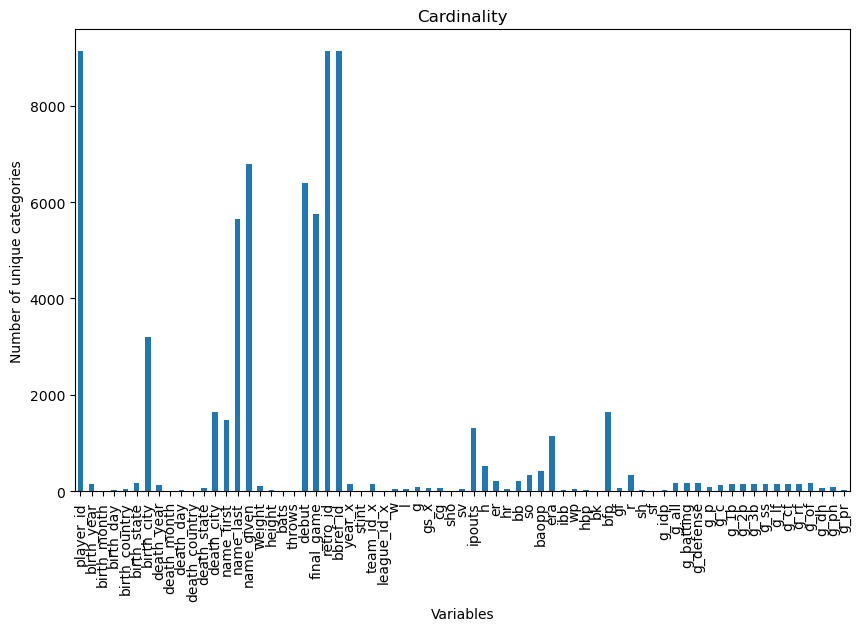

In [6]:
data.nunique().plot.bar(figsize=(10,6))

plt.ylabel('Number of unique categories')
plt.xlabel('Variables')
plt.title('Cardinality')

Text(0.5, 0, 'Variables')

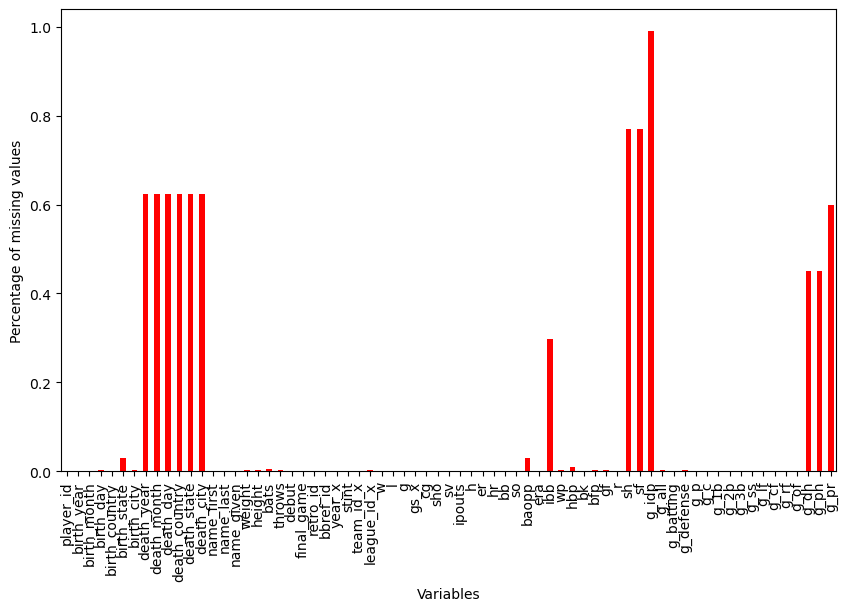

In [7]:
data.isnull().mean().plot.bar(figsize=(10,6), color = 'r')
plt.ylabel('Percentage of missing values')
plt.xlabel('Variables')

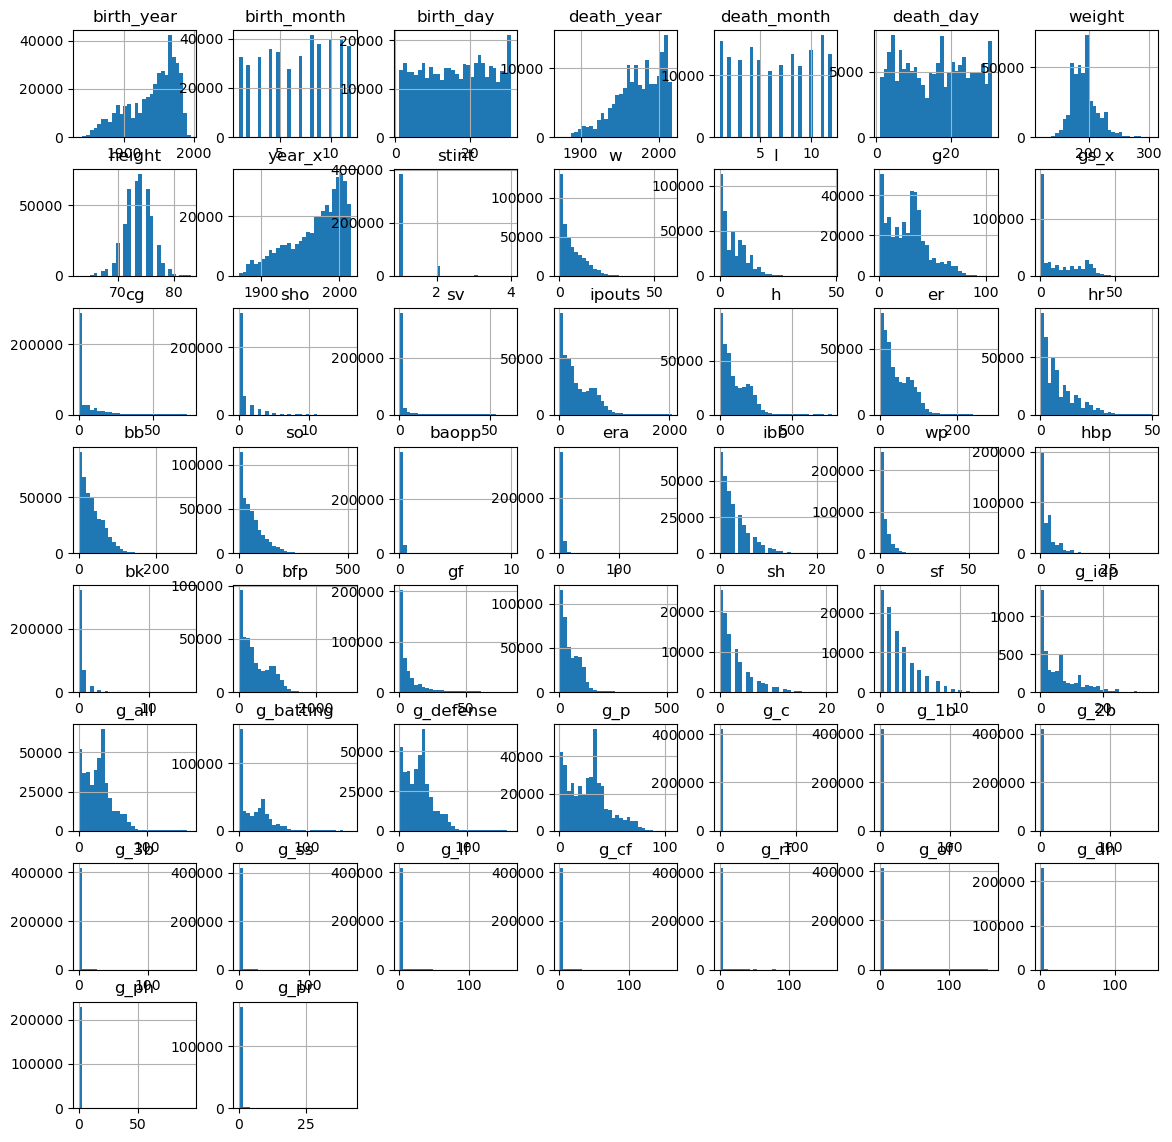

In [8]:
num_cols = [c for c in data.columns if data[c].dtypes !='O']
data[num_cols].hist(bins=30, figsize=(14,14))
plt.show()

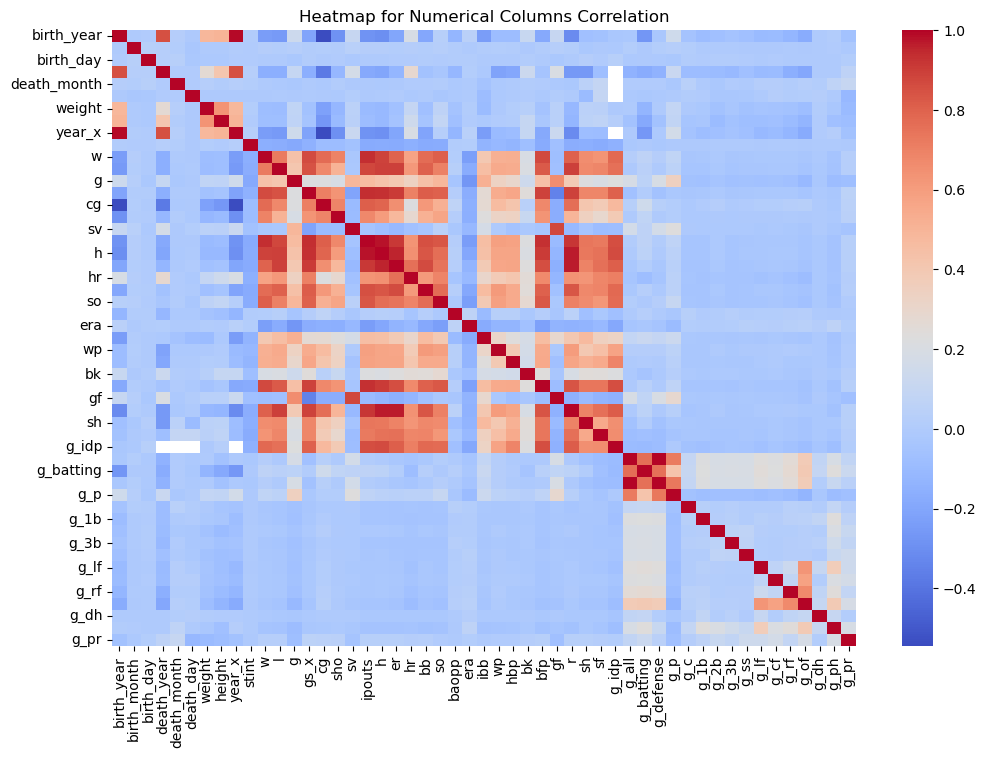

In [9]:

# Calculate correlation matrix
corr_matrix = data[num_cols].corr()

# Create heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title('Heatmap for Numerical Columns Correlation')
plt.show()

In [10]:
correlations = data[num_cols].corr()['era']

def correlation_strength(r):
    abs_r = abs(r)
    if abs_r == 0:
        return "No Correlation"
    elif 0 < abs_r < 0.1:
        return "Very Weak"
    elif 0.1 <= abs_r < 0.3:
        return "Weak"
    elif 0.3 <= abs_r < 0.5:
        return "Moderate"
    elif 0.5 <= abs_r < 0.7:
        return "Strong"
    elif 0.7 <= abs_r < 0.9:
        return "Very Strong"
    elif 0.9 <= abs_r <= 1:
        return "Extremely Strong"

# Print correlations with titles indicating strength
grouped_correlations = {}
correlations = correlations.sort_values()

for variable, correlation in correlations.items():
    if variable != 'era':
        strength = correlation_strength(correlation)
        direction = "Positive" if correlation > 0 else "Negative"
        key = f"{strength} {direction} Correlation"
        
        if key not in grouped_correlations:
            grouped_correlations[key] = []
        
        grouped_correlations[key].append(f"{variable}: {correlation:.3f}")

# Print grouped correlations
for strength, variables in grouped_correlations.items():
    print(f"{strength}:")
    for variable in variables:
        print(f"  {variable}")
    print()

Weak Negative Correlation:
  g: -0.269
  ipouts: -0.238
  w: -0.235
  so: -0.233
  bfp: -0.224
  h: -0.200
  g_idp: -0.193
  bb: -0.192
  ibb: -0.182
  l: -0.173
  gs_x: -0.169
  sho: -0.163
  cg: -0.153
  r: -0.146
  sh: -0.140
  gf: -0.139
  er: -0.139
  hbp: -0.131
  wp: -0.129
  sv: -0.112
  hr: -0.108
  sf: -0.106

Very Weak Negative Correlation:
  g_p: -0.093
  bk: -0.064
  g_defense: -0.047
  g_all: -0.043
  g_batting: -0.030
  death_month: -0.006
  death_day: -0.003
  birth_month: -0.002

Very Weak Positive Correlation:
  height: 0.001
  weight: 0.007
  birth_day: 0.009
  g_2b: 0.009
  g_1b: 0.009
  g_3b: 0.012
  death_year: 0.014
  stint: 0.014
  g_pr: 0.015
  g_c: 0.016
  g_cf: 0.017
  g_dh: 0.019
  g_lf: 0.026
  g_rf: 0.029
  g_ss: 0.033
  g_of: 0.038
  year_x: 0.039
  birth_year: 0.042
  baopp: 0.059
  g_ph: 0.063



### Step 2: Data Wrangling on multiple tables 

In [11]:
data = data.iloc[:, 0:57].drop(columns = ['death_year', 'death_month', 'death_day', 'death_country', 'death_state', 'death_city',])

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421210 entries, 0 to 421209
Data columns (total 51 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   player_id      421210 non-null  object 
 1   birth_year     421142 non-null  float64
 2   birth_month    420803 non-null  float64
 3   birth_day      420362 non-null  float64
 4   birth_country  421186 non-null  object 
 5   birth_state    408832 non-null  object 
 6   birth_city     420281 non-null  object 
 7   name_first     421204 non-null  object 
 8   name_last      421210 non-null  object 
 9   name_given     421204 non-null  object 
 10  weight         419831 non-null  float64
 11  height         420112 non-null  float64
 12  bats           418903 non-null  object 
 13  throws         420171 non-null  object 
 14  debut          421208 non-null  object 
 15  final_game     421208 non-null  object 
 16  retro_id       421210 non-null  object 
 17  bbref_id       421210 non-nul

In [13]:
data = data.drop(columns = ['g_defense', 'g_p', 'sh', 'sf', 'g_idp', 'retro_id', 'bbref_id'])

In [14]:
data.isnull().mean().sort_values()

player_id        0.000000
r                0.000000
bk               0.000000
so               0.000000
bb               0.000000
hr               0.000000
er               0.000000
h                0.000000
sv               0.000000
sho              0.000000
cg               0.000000
gs_x             0.000000
g                0.000000
w                0.000000
team_id_x        0.000000
stint            0.000000
l                0.000000
g_batting        0.000000
year_x           0.000000
name_last        0.000000
final_game       0.000005
debut            0.000005
name_given       0.000014
name_first       0.000014
ipouts           0.000019
birth_country    0.000057
birth_year       0.000161
birth_month      0.000966
era              0.001263
birth_day        0.002013
league_id_x      0.002018
gf               0.002046
wp               0.002056
g_all            0.002141
birth_city       0.002206
throws           0.002467
height           0.002607
weight           0.003274
bfp         

In [15]:
data = data.dropna(subset=['final_game', 'debut'])

### Step 3: Data Cleansing and Transformation

In [16]:
#null value imputation

In [17]:
num_cols = [c for c in data.columns if data[c].dtypes !='O']
data[num_cols].isnull().mean().sort_values()

h              0.000000
r              0.000000
bk             0.000000
so             0.000000
bb             0.000000
hr             0.000000
er             0.000000
sv             0.000000
sho            0.000000
cg             0.000000
g_batting      0.000000
g              0.000000
l              0.000000
w              0.000000
gs_x           0.000000
stint          0.000000
year_x         0.000000
ipouts         0.000019
birth_year     0.000159
birth_month    0.000964
era            0.001263
birth_day      0.002011
gf             0.002046
wp             0.002056
g_all          0.002141
height         0.002602
weight         0.003269
bfp            0.003404
hbp            0.009708
baopp          0.029743
ibb            0.297274
dtype: float64

In [18]:
data = data.dropna(subset=['era', 'birth_year', 'birth_month', 'birth_day'])

In [19]:
data[num_cols].isnull().mean().sort_values()

birth_year     0.000000
r              0.000000
bk             0.000000
era            0.000000
so             0.000000
bb             0.000000
hr             0.000000
er             0.000000
ipouts         0.000000
sv             0.000000
sho            0.000000
h              0.000000
gs_x           0.000000
birth_month    0.000000
birth_day      0.000000
cg             0.000000
year_x         0.000000
g_batting      0.000000
w              0.000000
l              0.000000
g              0.000000
stint          0.000000
gf             0.001713
wp             0.001722
height         0.001984
g_all          0.002139
weight         0.002837
bfp            0.002887
hbp            0.008646
baopp          0.028419
ibb            0.295621
dtype: float64

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('era', axis=1), data['era'], test_size=0.15, random_state=0)

X_train.shape, X_test.shape

((356856, 43), (62975, 43))

In [21]:
animputer = mdi.ArbitraryNumberImputer(
    arbitrary_number=0, variables=['ibb', 'wp', 'gf', 'g_all', 'bfp', 'hbp'])

medimputer = mdi.MeanMedianImputer(imputation_method='median',
                                   variables=['height', 'weight', 'baopp'])
animputer.fit(X_train)
medimputer.fit(X_train)


MeanMedianImputer(variables=['height', 'weight', 'baopp'])

In [22]:
X_train = animputer.transform(X_train)
X_test = animputer.transform(X_test)
X_train = medimputer.transform(X_train)
X_test = medimputer.transform(X_test)

In [23]:
num_cols = [c for c in X_train.columns if X_train[c].dtypes !='O']
X_train[num_cols].isnull().mean().sort_values()

birth_year     0.0
r              0.0
gf             0.0
bfp            0.0
bk             0.0
hbp            0.0
wp             0.0
ibb            0.0
baopp          0.0
so             0.0
bb             0.0
hr             0.0
er             0.0
h              0.0
ipouts         0.0
sv             0.0
sho            0.0
cg             0.0
gs_x           0.0
g              0.0
l              0.0
w              0.0
stint          0.0
year_x         0.0
height         0.0
weight         0.0
birth_day      0.0
birth_month    0.0
g_all          0.0
g_batting      0.0
dtype: float64

In [24]:
X_test[num_cols].isnull().mean().sort_values()

birth_year     0.0
r              0.0
gf             0.0
bfp            0.0
bk             0.0
hbp            0.0
wp             0.0
ibb            0.0
baopp          0.0
so             0.0
bb             0.0
hr             0.0
er             0.0
h              0.0
ipouts         0.0
sv             0.0
sho            0.0
cg             0.0
gs_x           0.0
g              0.0
l              0.0
w              0.0
stint          0.0
year_x         0.0
height         0.0
weight         0.0
birth_day      0.0
birth_month    0.0
g_all          0.0
g_batting      0.0
dtype: float64

In [25]:
def diagnostic_plots(df, variable):
        
    plt.figure(figsize=(15,6))
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30, kde=True)
    plt.title('Histogram')

    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.title('Probability Plot')

    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.suptitle(variable, fontsize=20)
    plt.show()

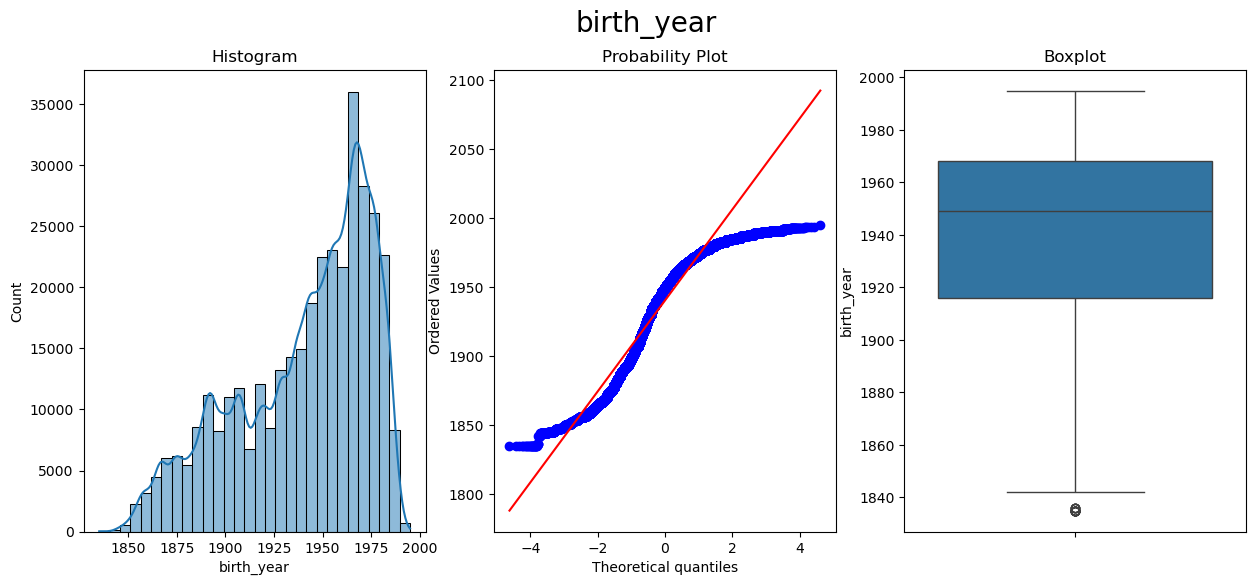

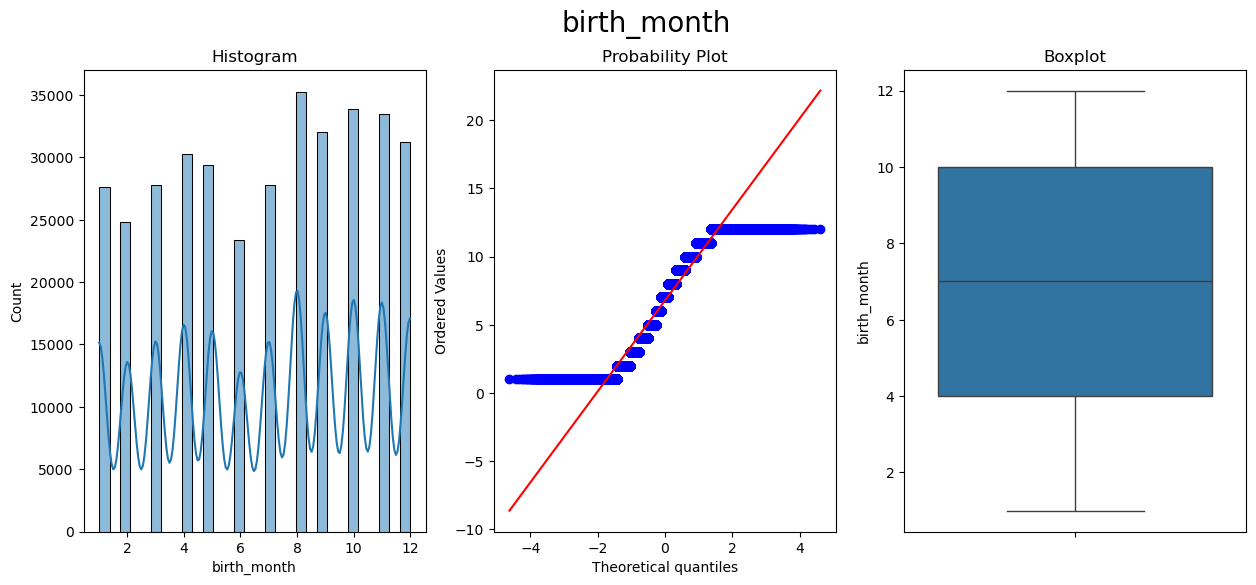

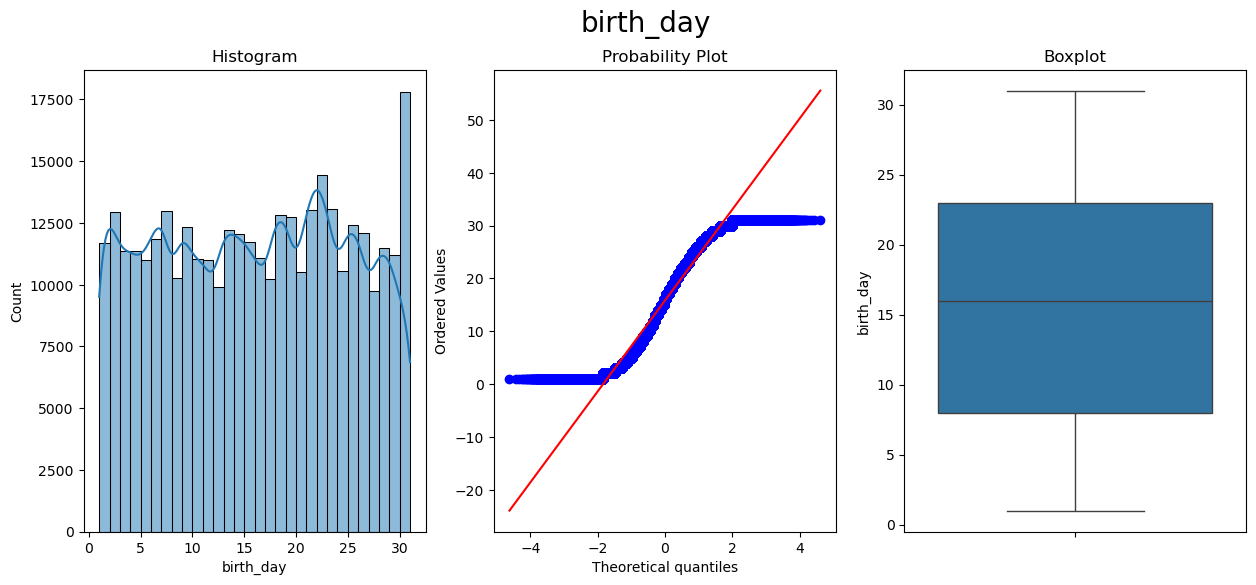

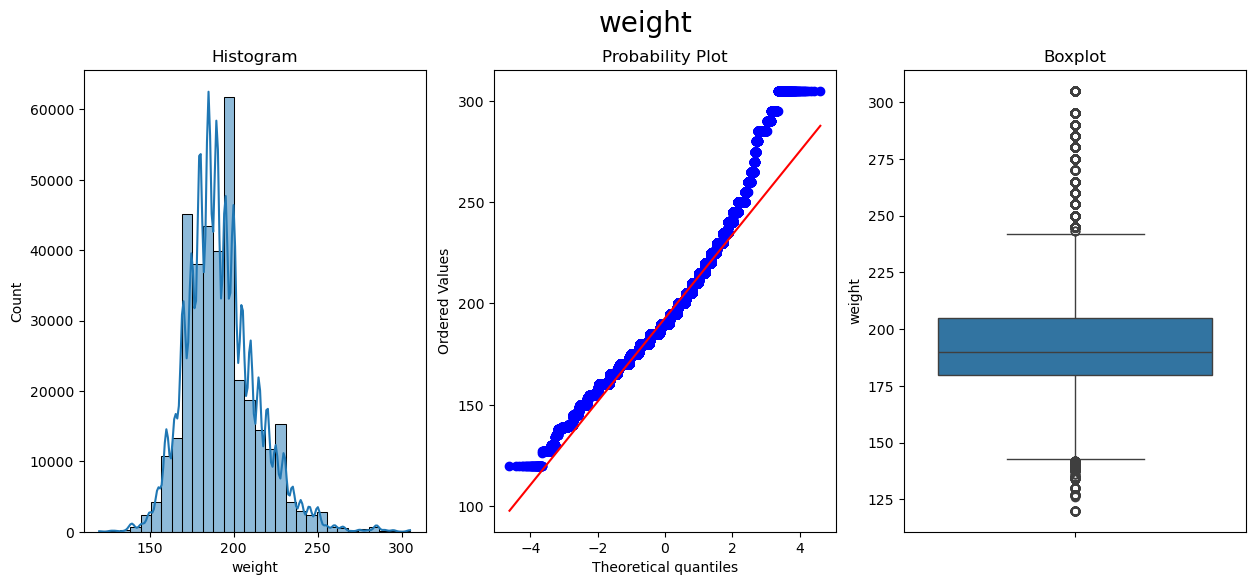

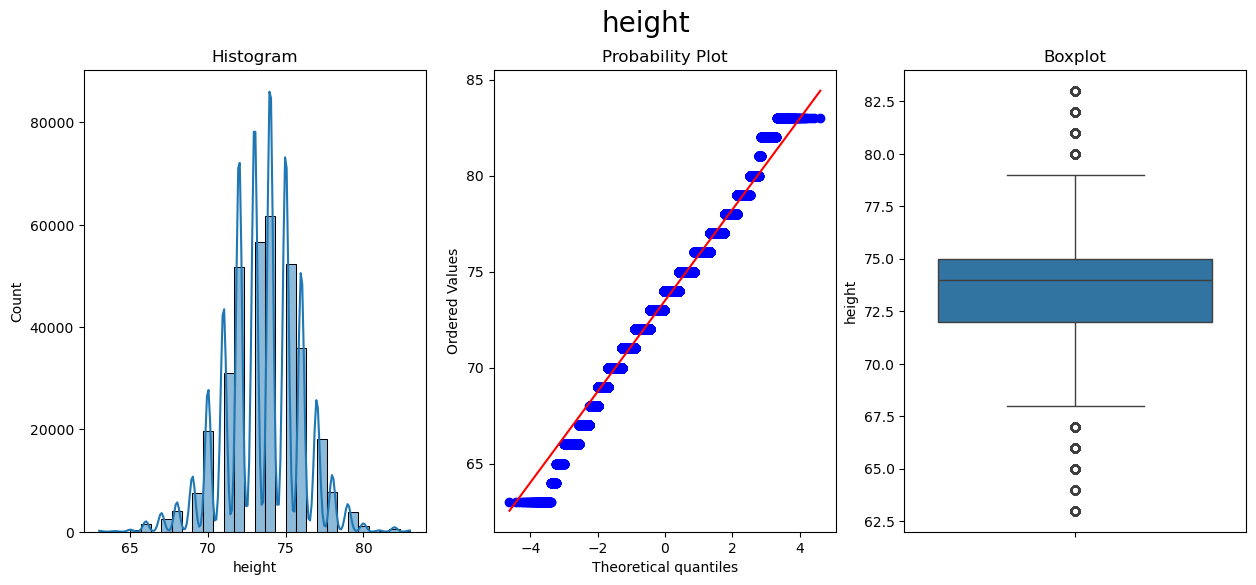

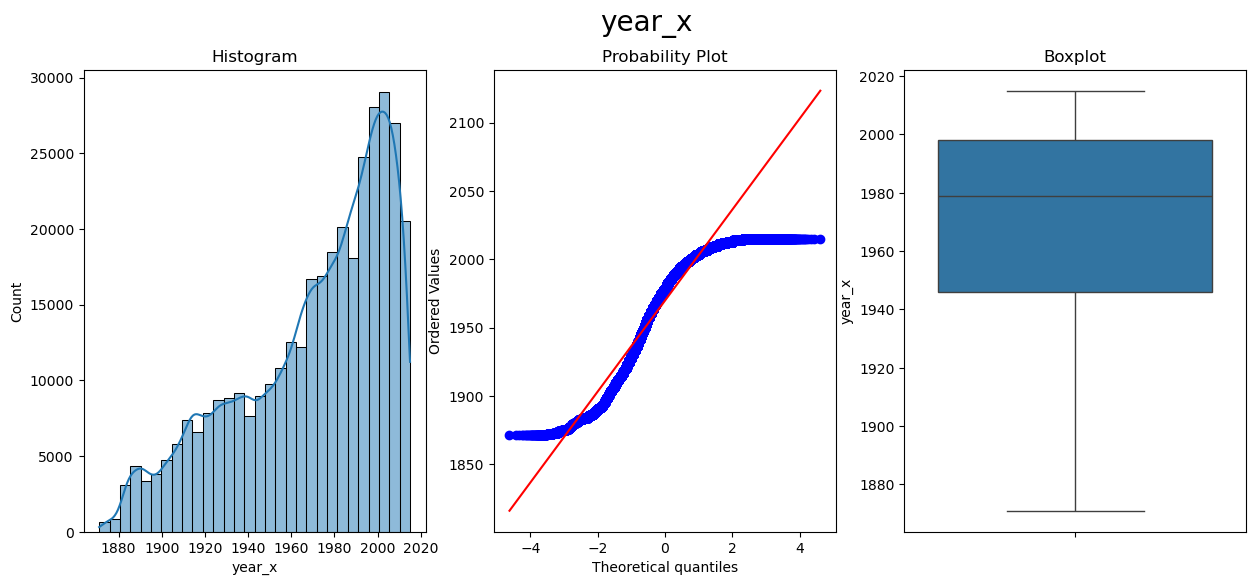

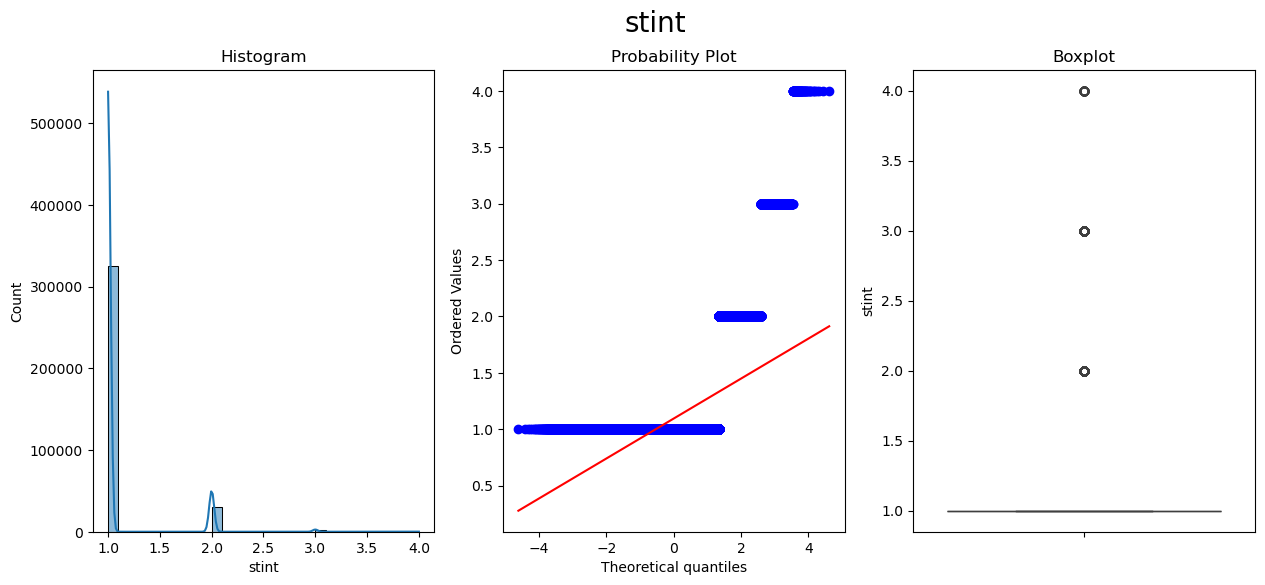

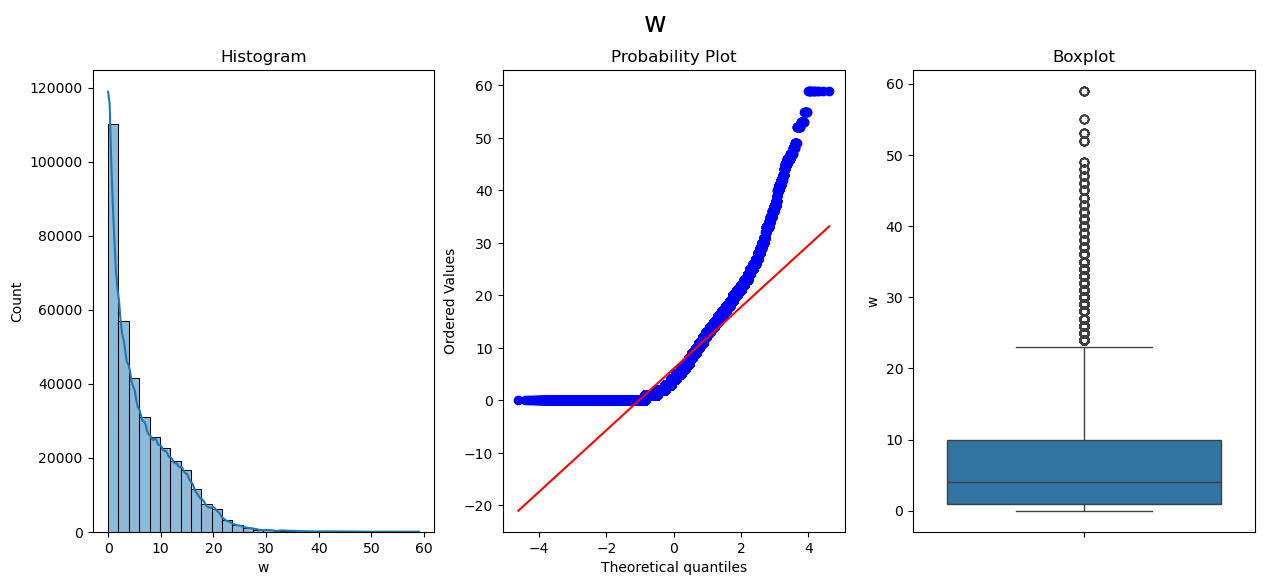

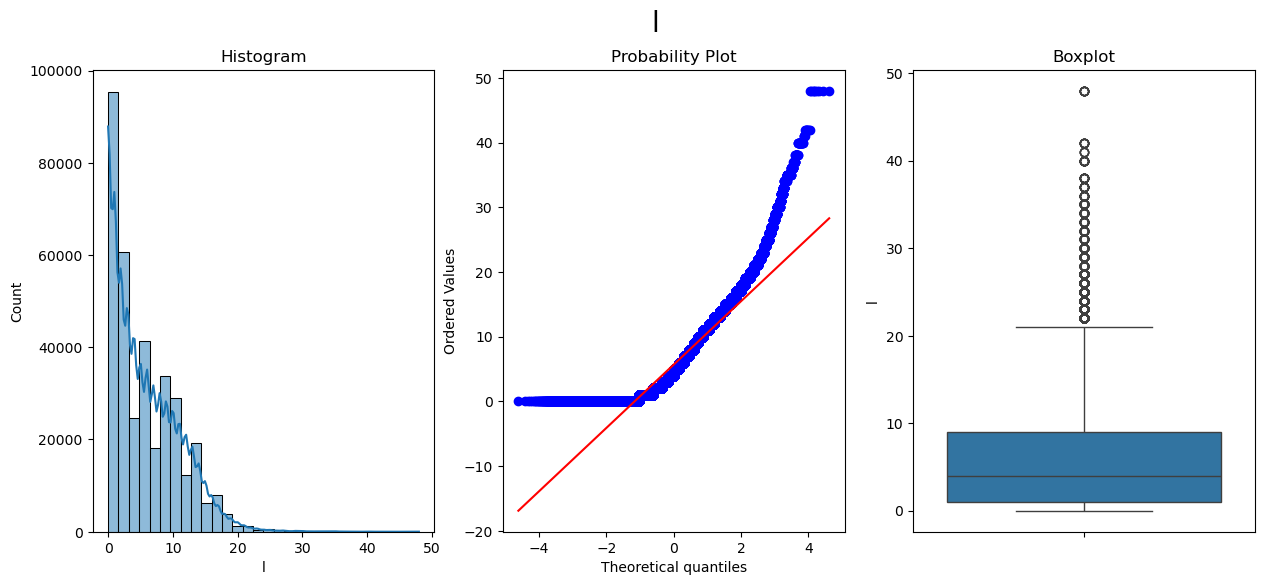

In [26]:
for var in range(0, 9):
    diagnostic_plots(X_train, num_cols[var])

In [27]:
windsorizer = Winsorizer(capping_method='gaussian', # choose iqr for skewed or gaussian for normal
                          tail='both', # cap left, right or both tails 
                          fold=3,
                          variables=list(X_train[num_cols].columns))

windsorizer.fit(X_train[num_cols])
X_train[num_cols] = windsorizer.transform(X_train[num_cols])
X_test[num_cols] = windsorizer.transform(X_test[num_cols])

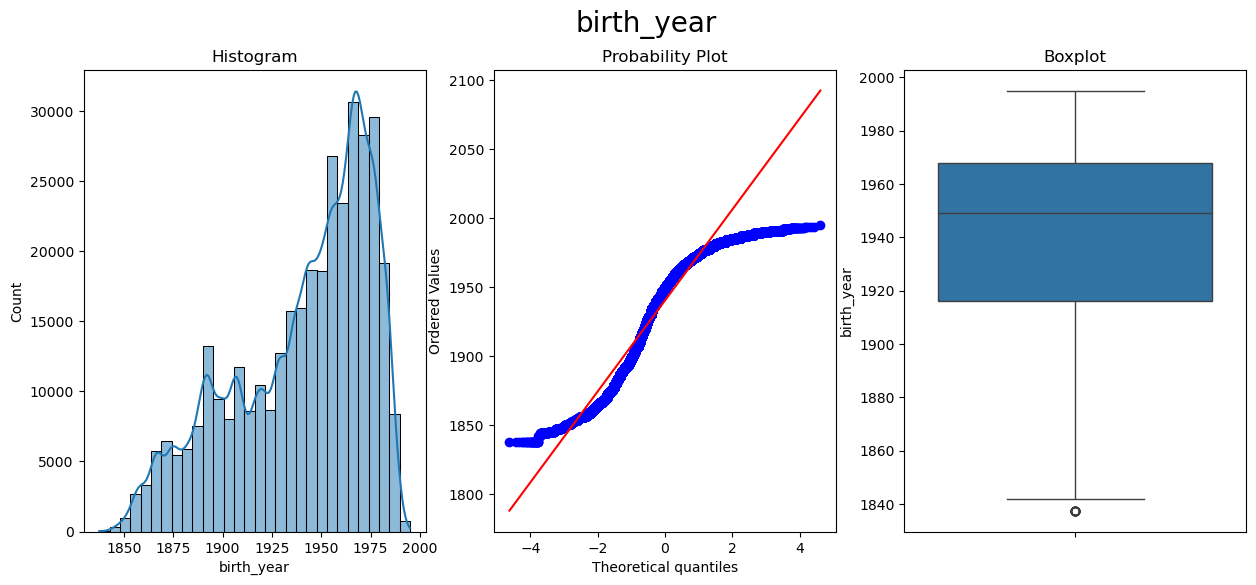

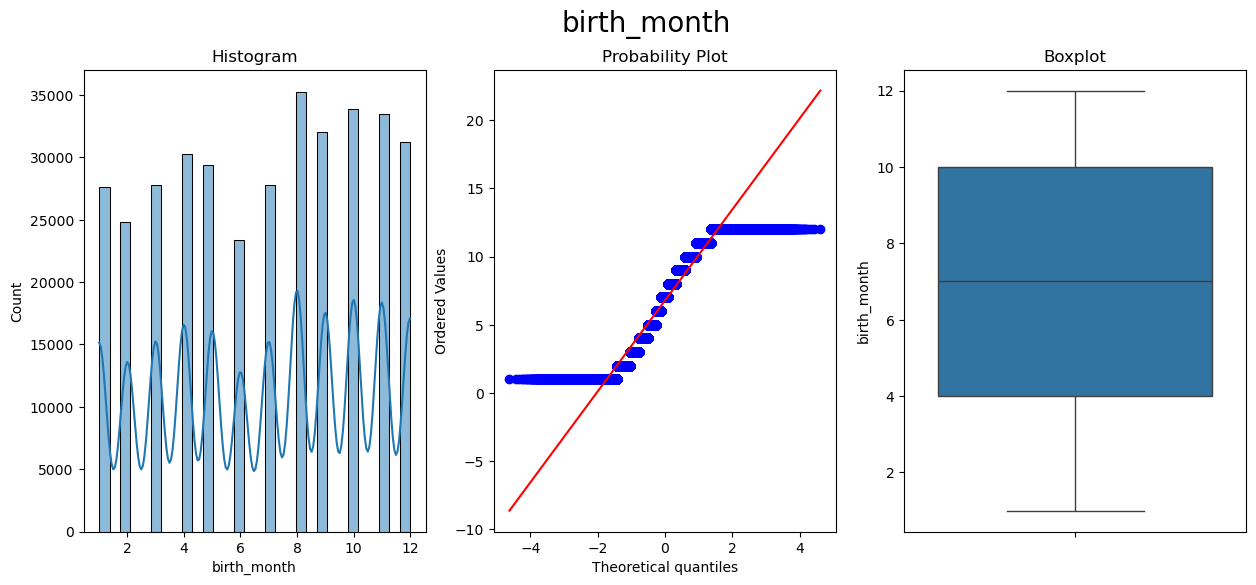

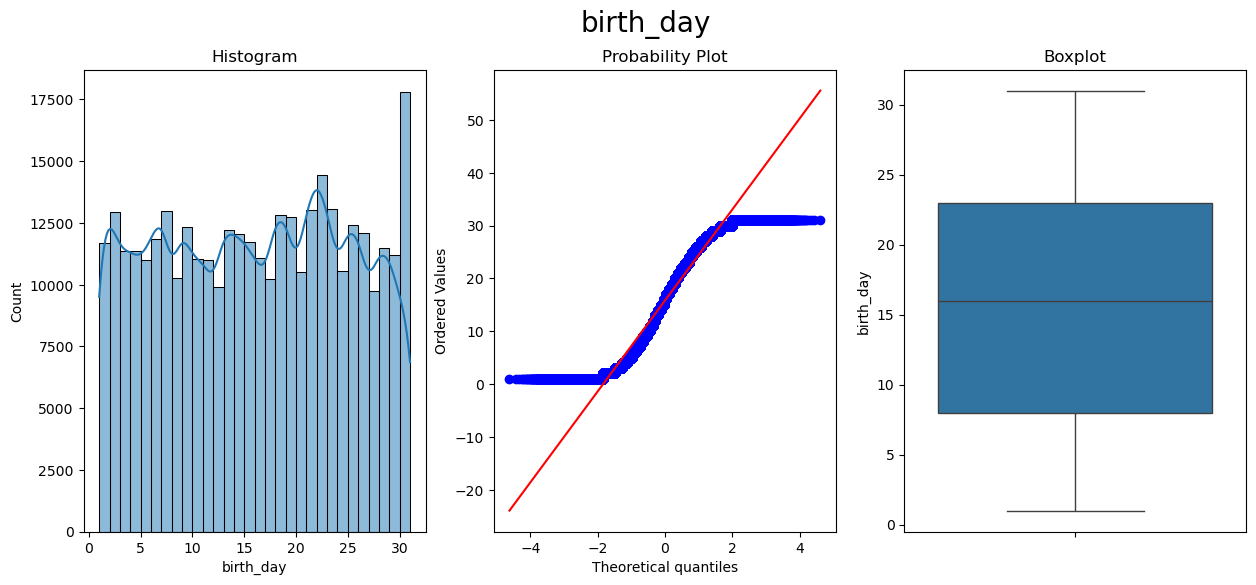

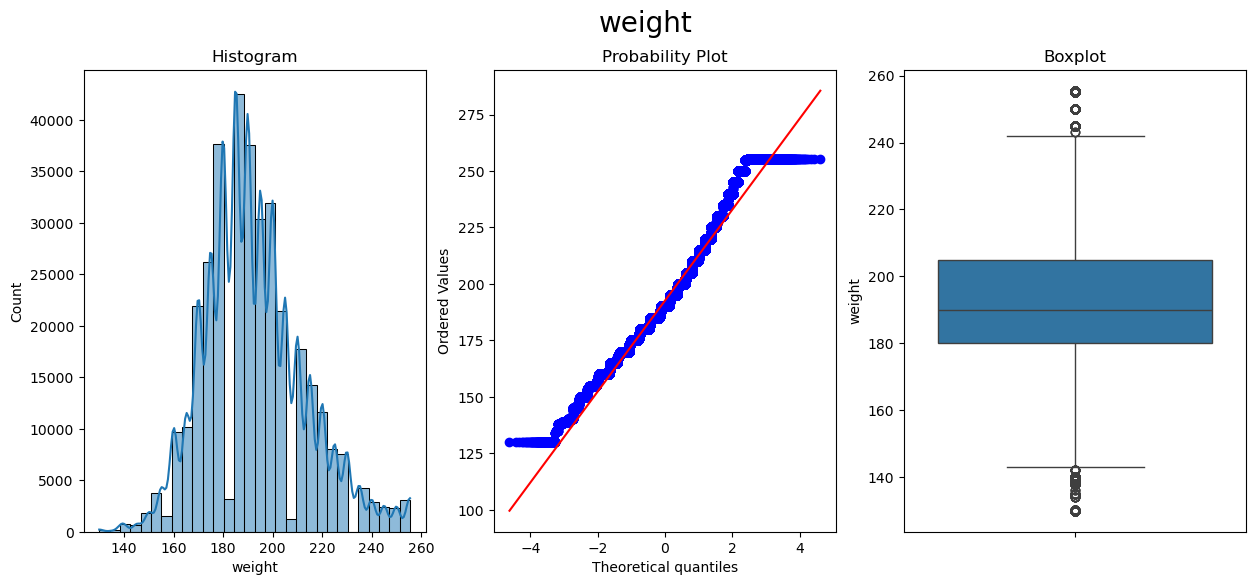

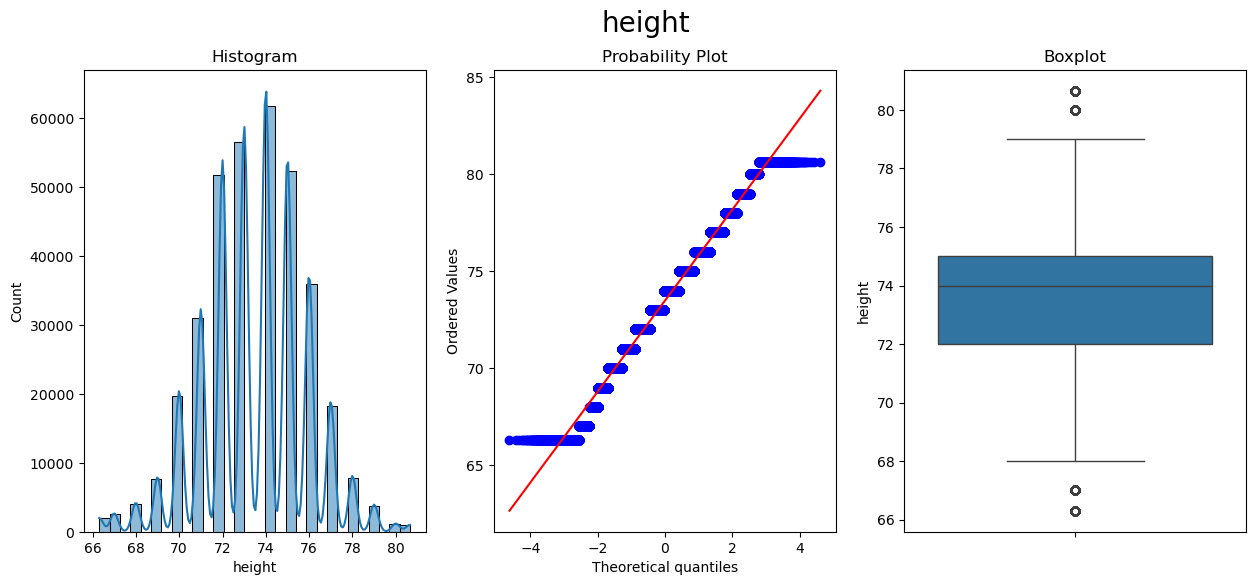

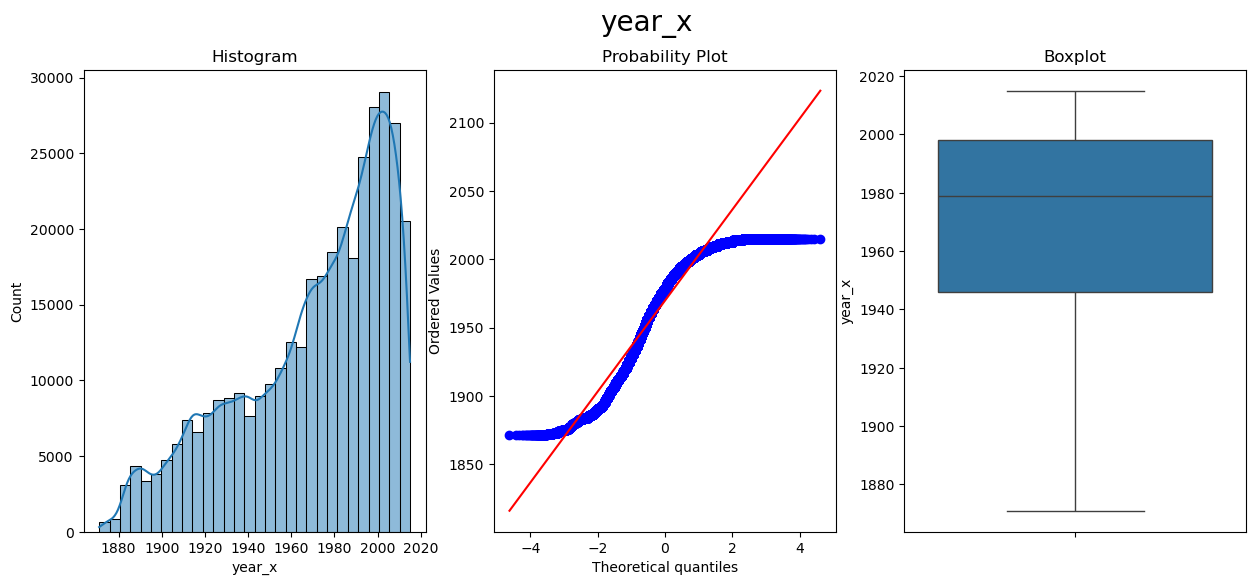

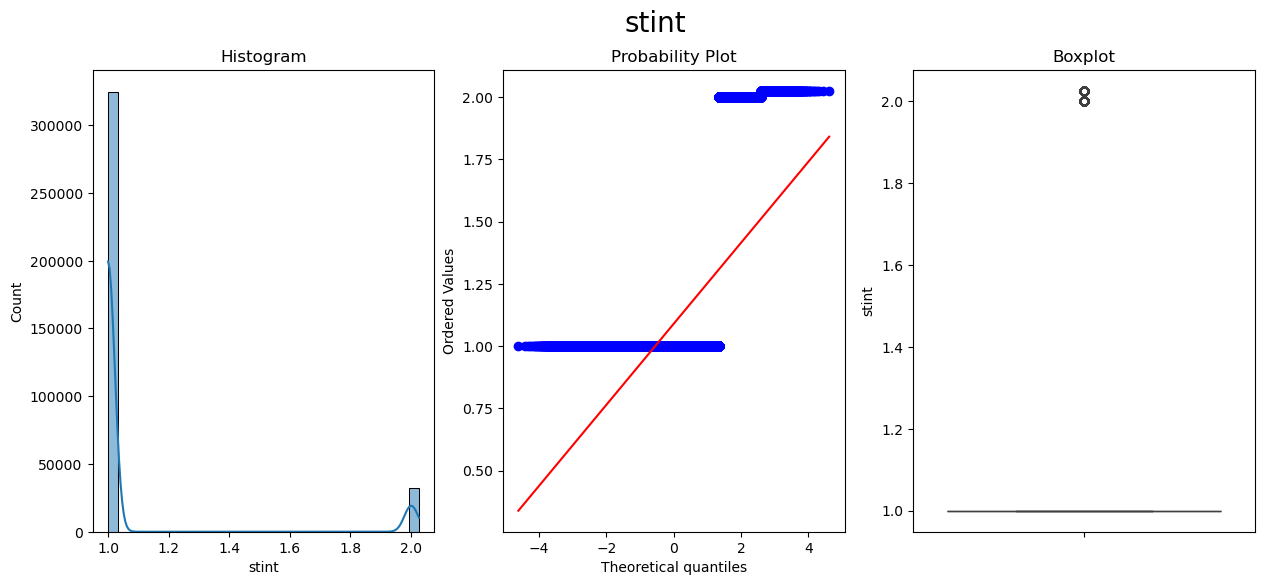

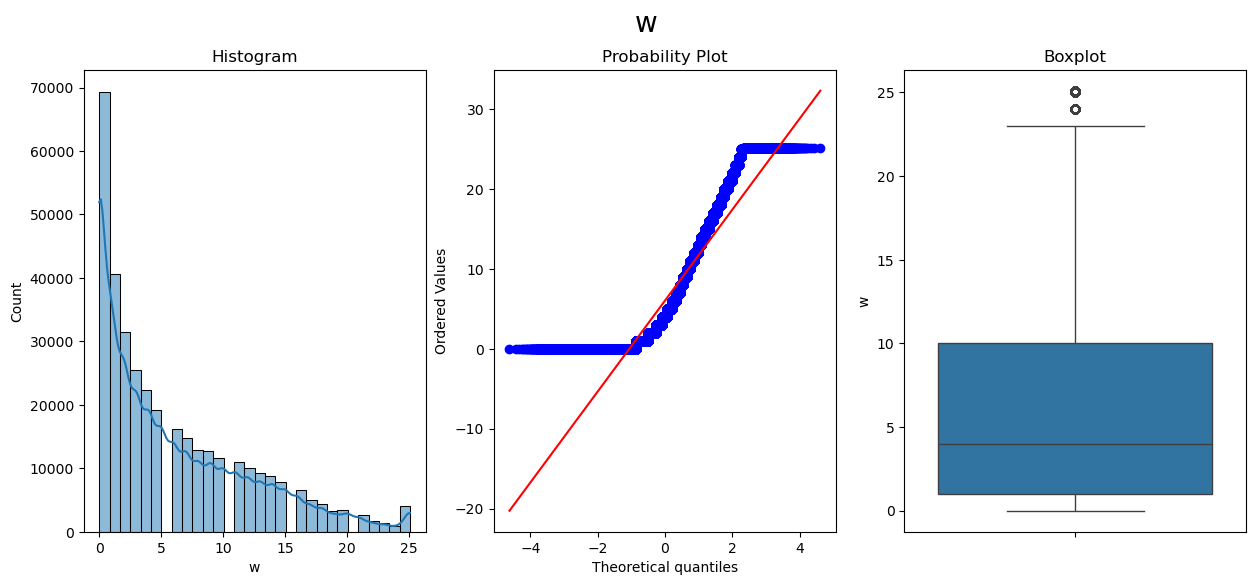

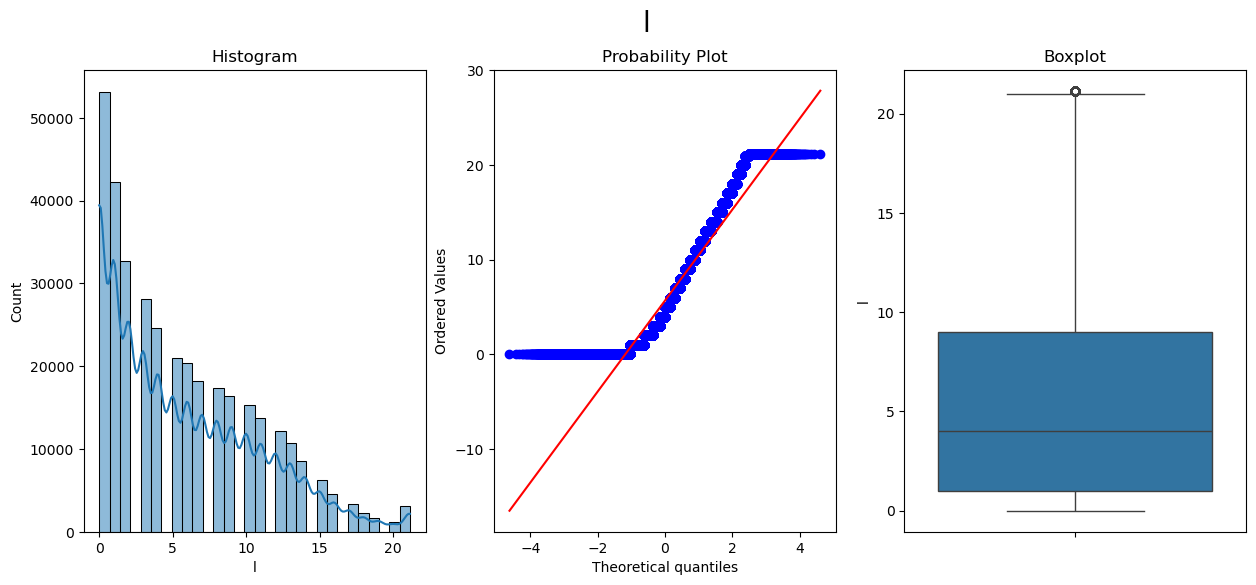

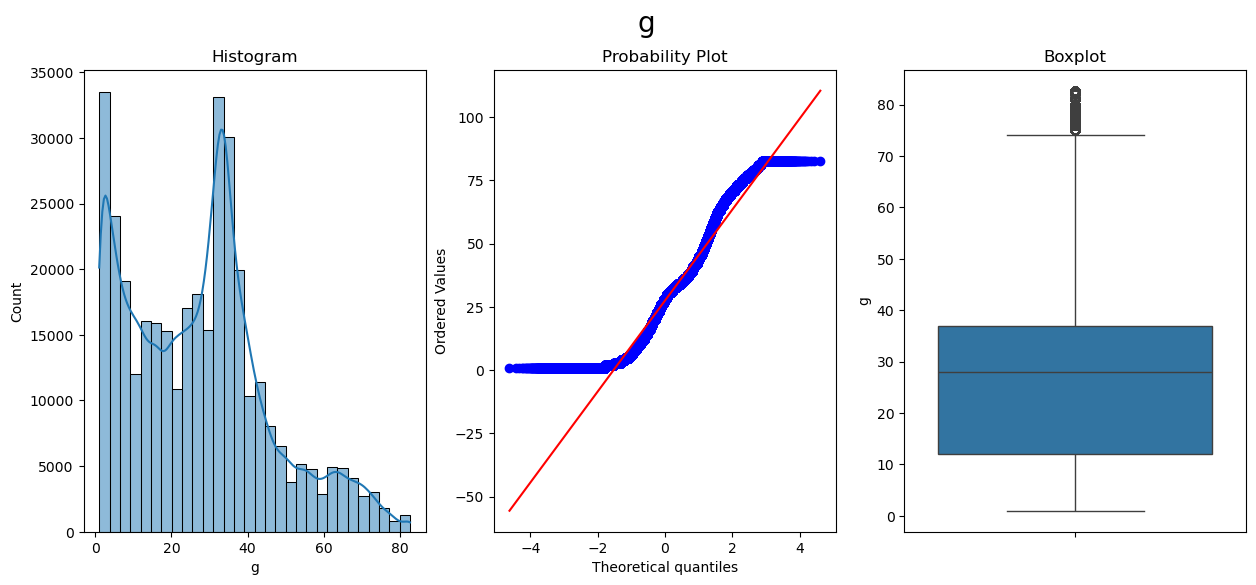

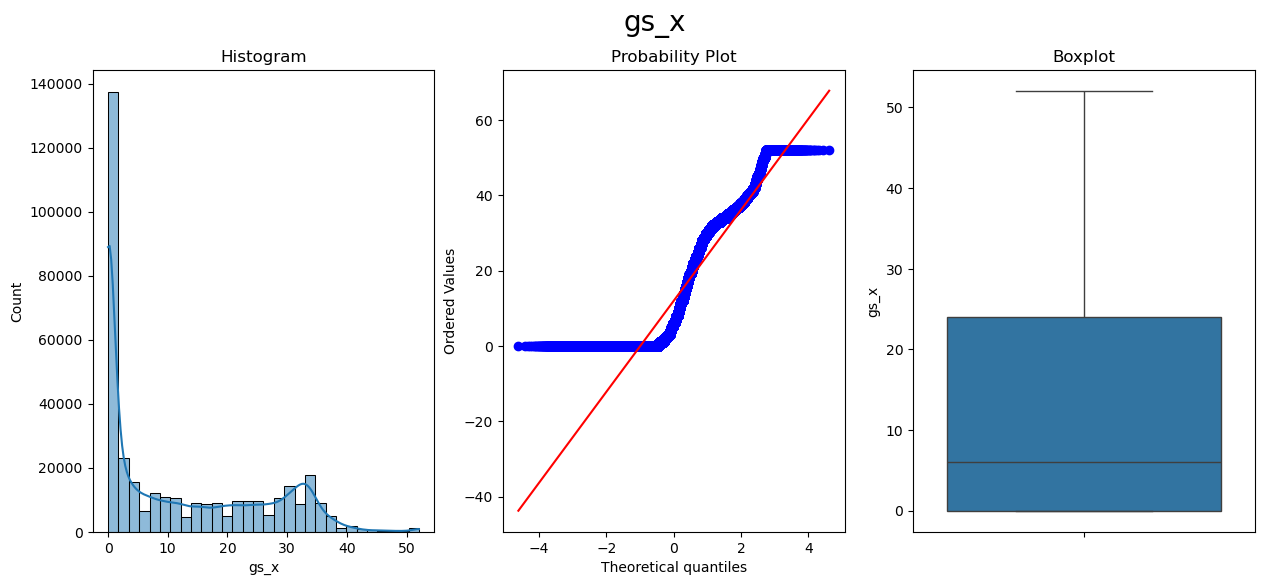

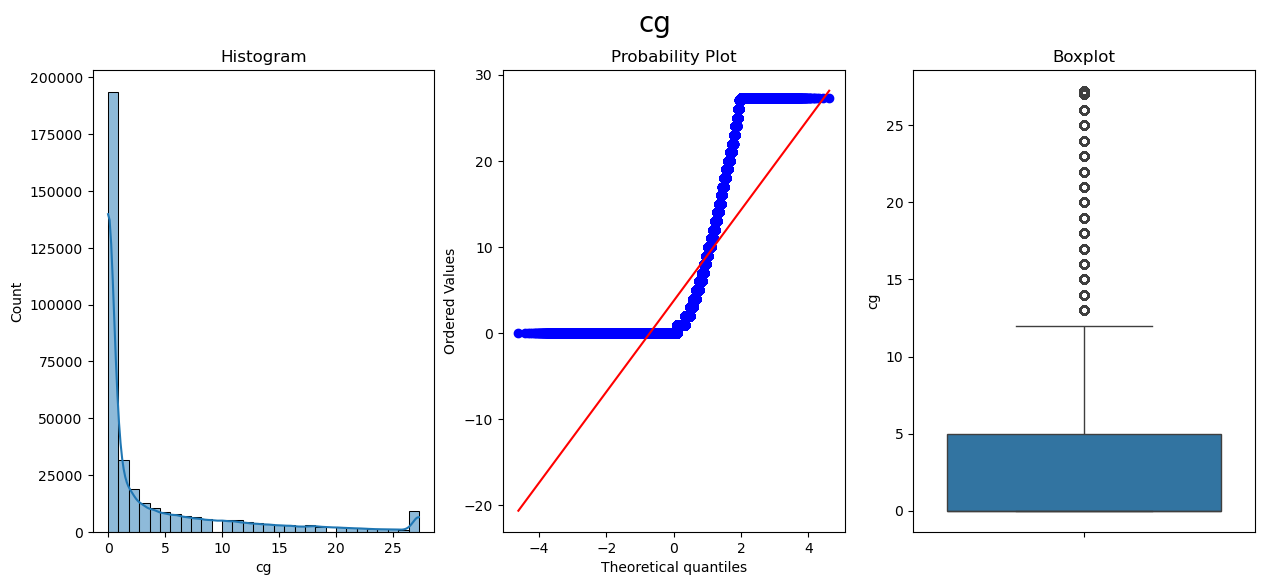

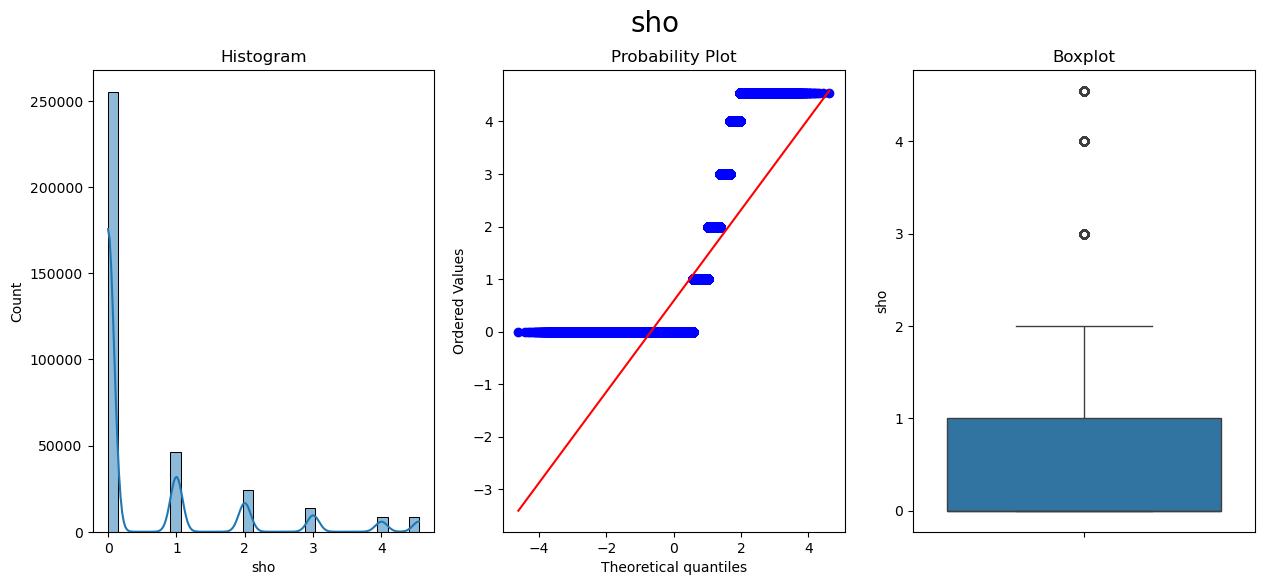

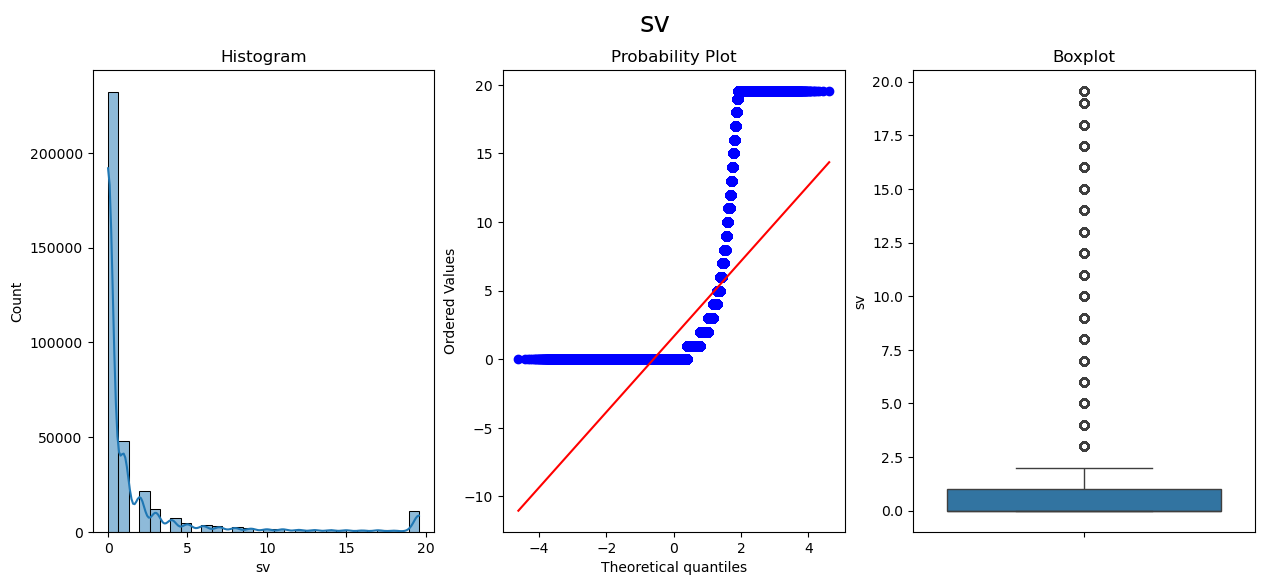

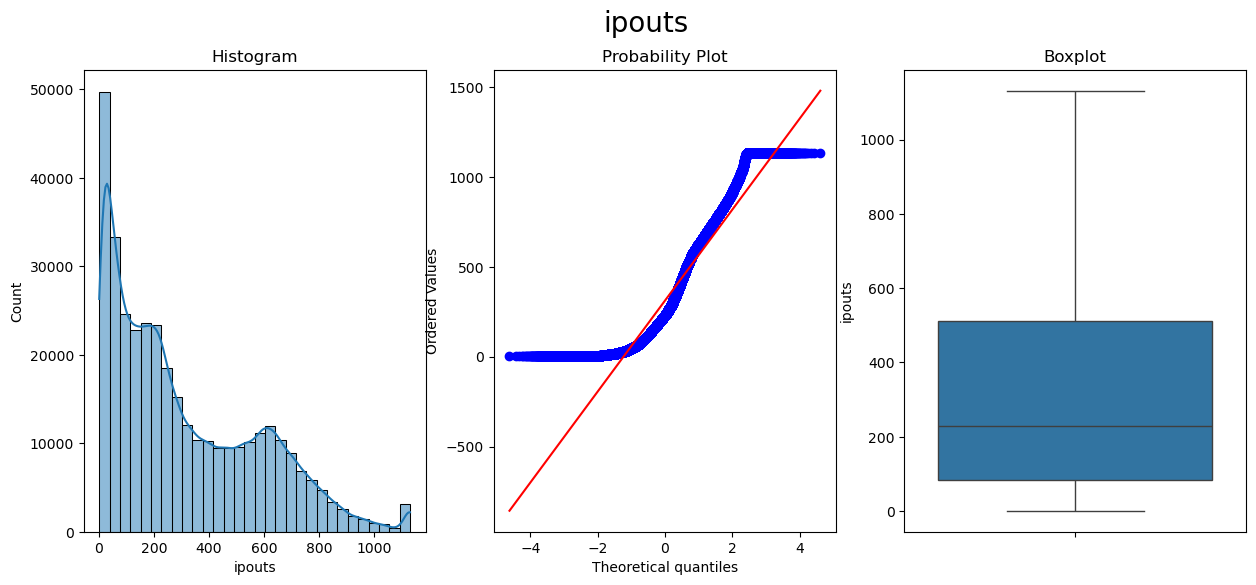

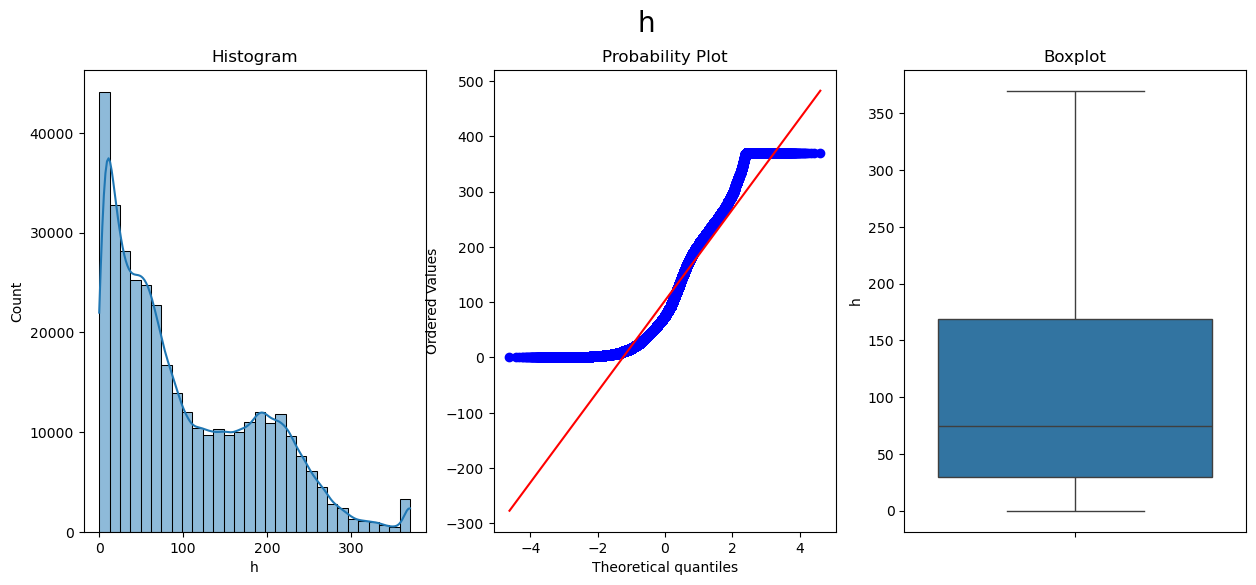

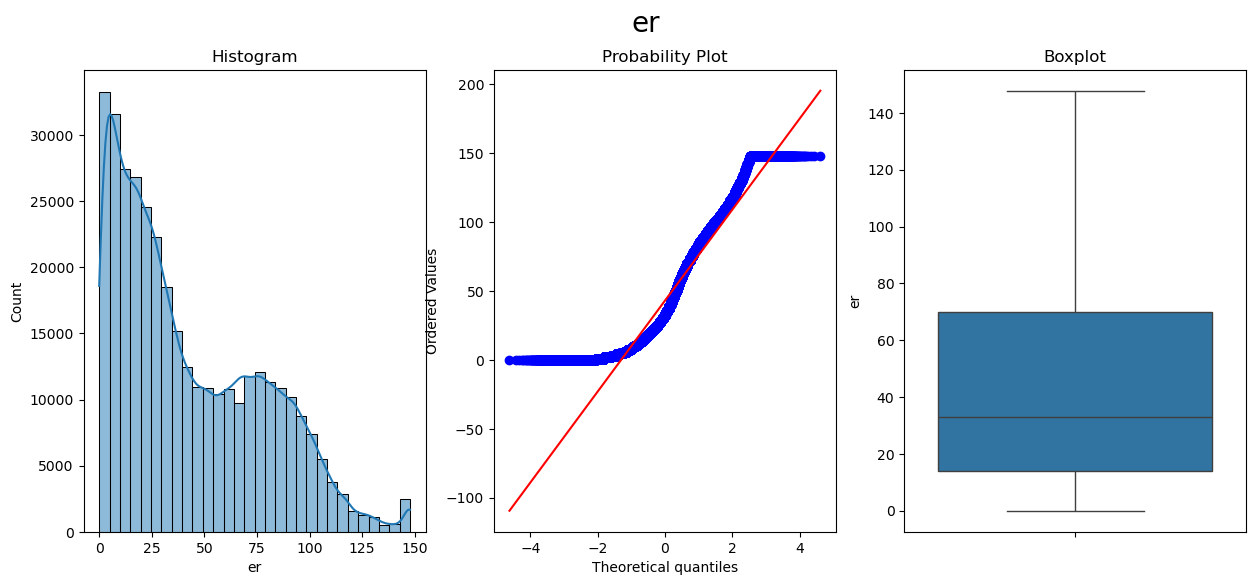

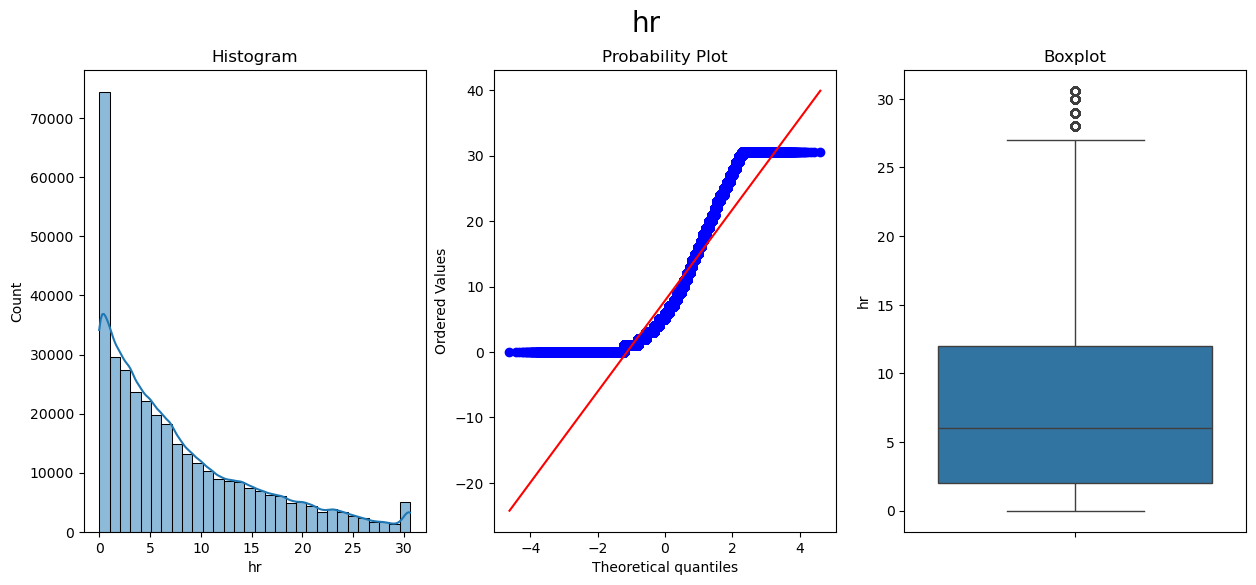

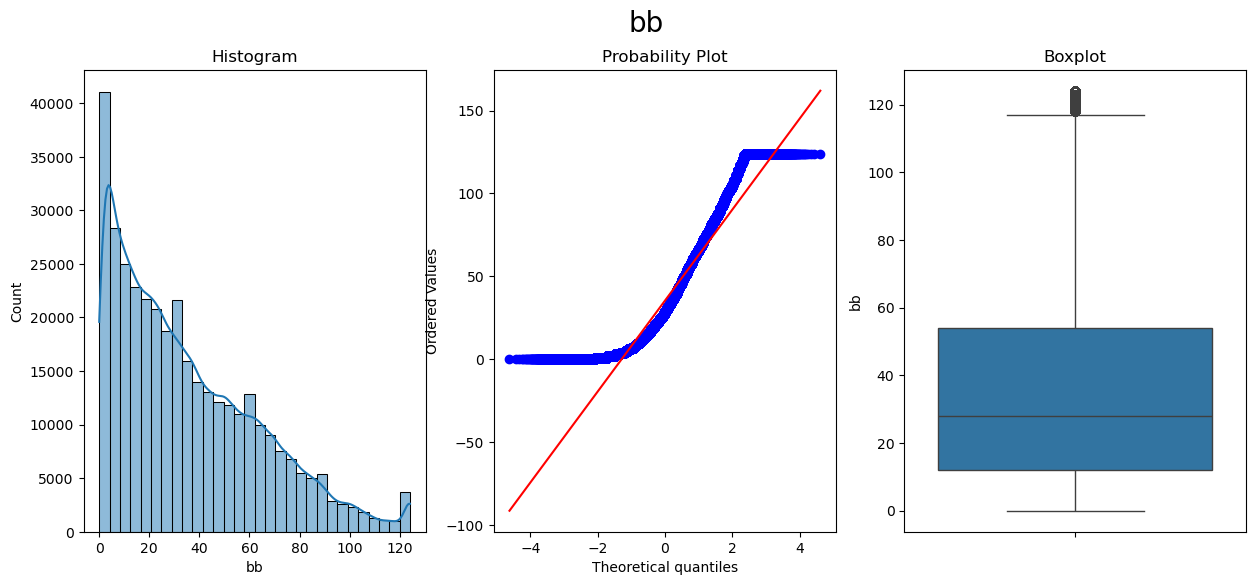

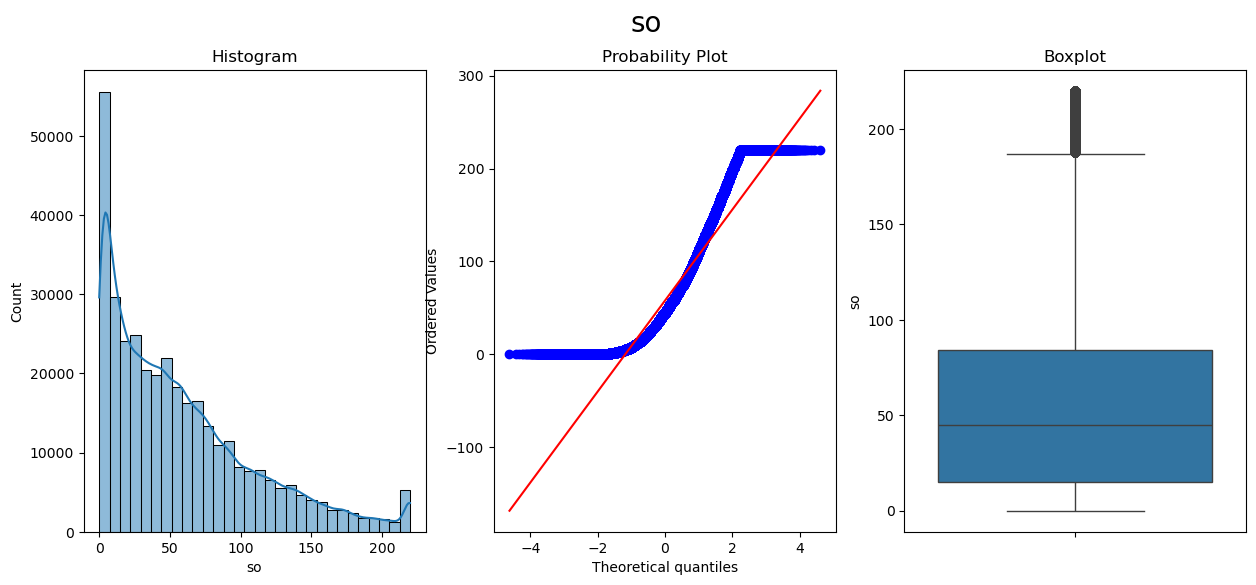

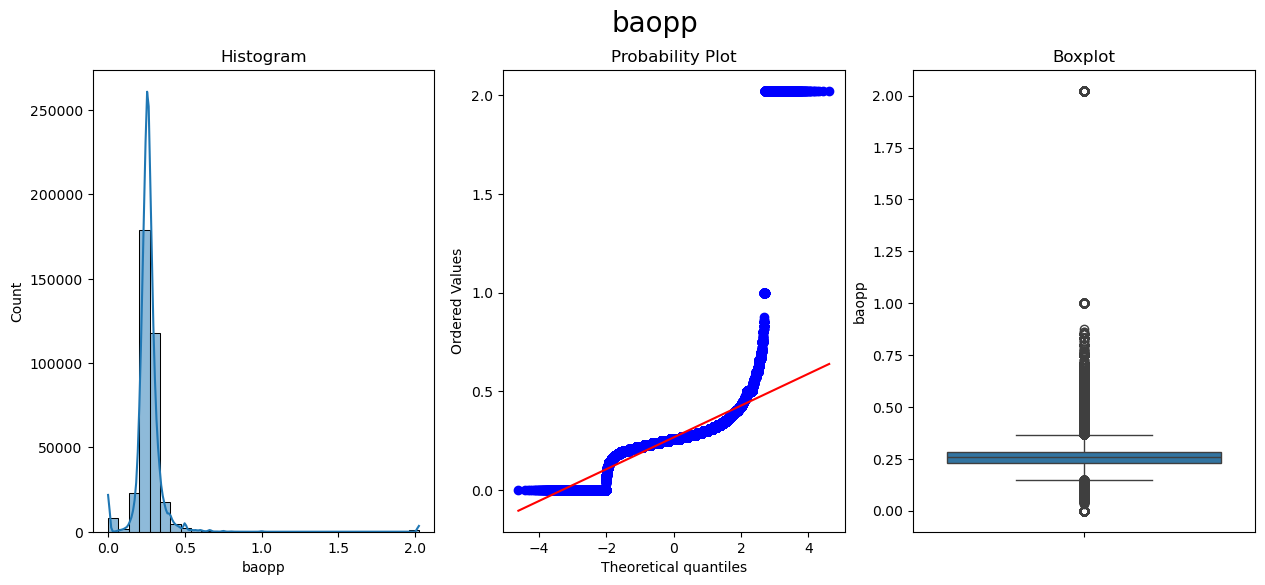

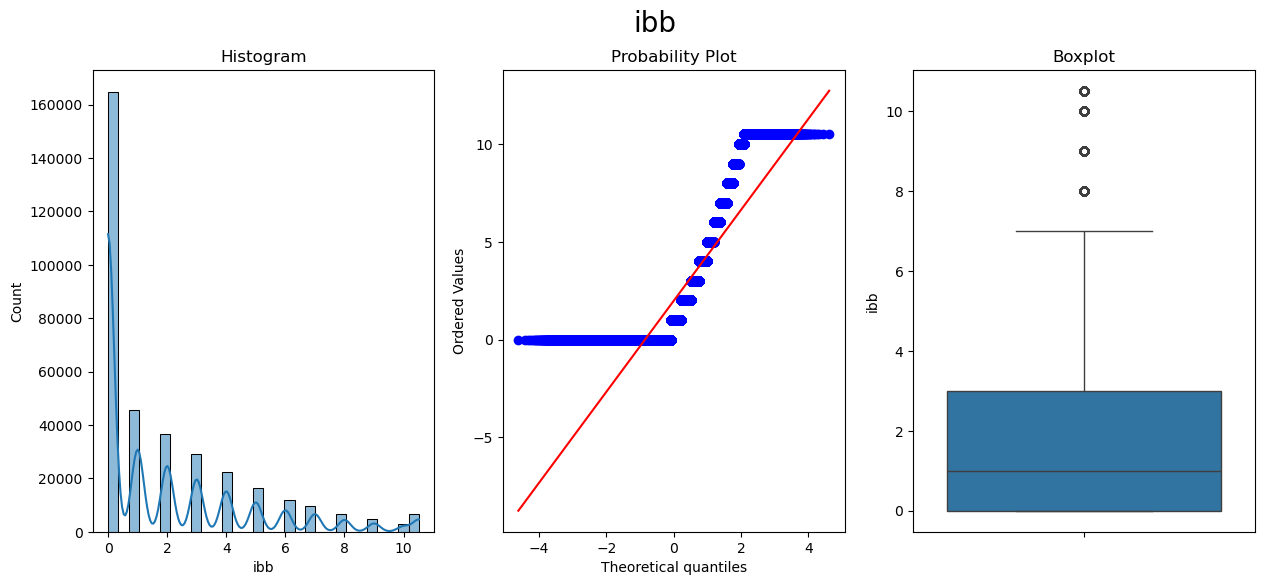

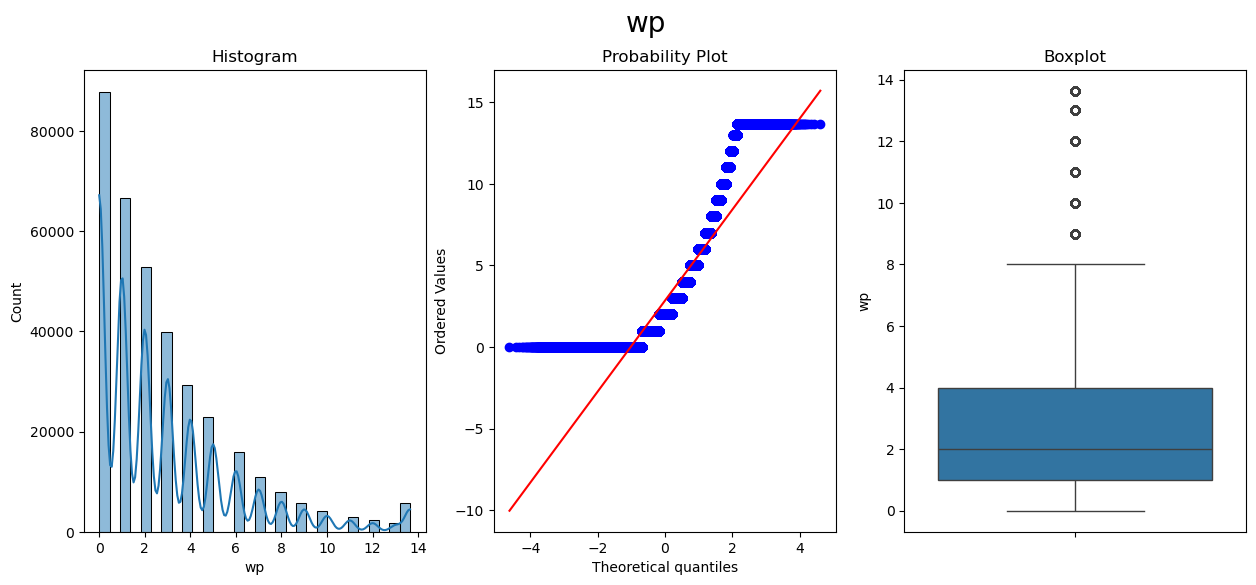

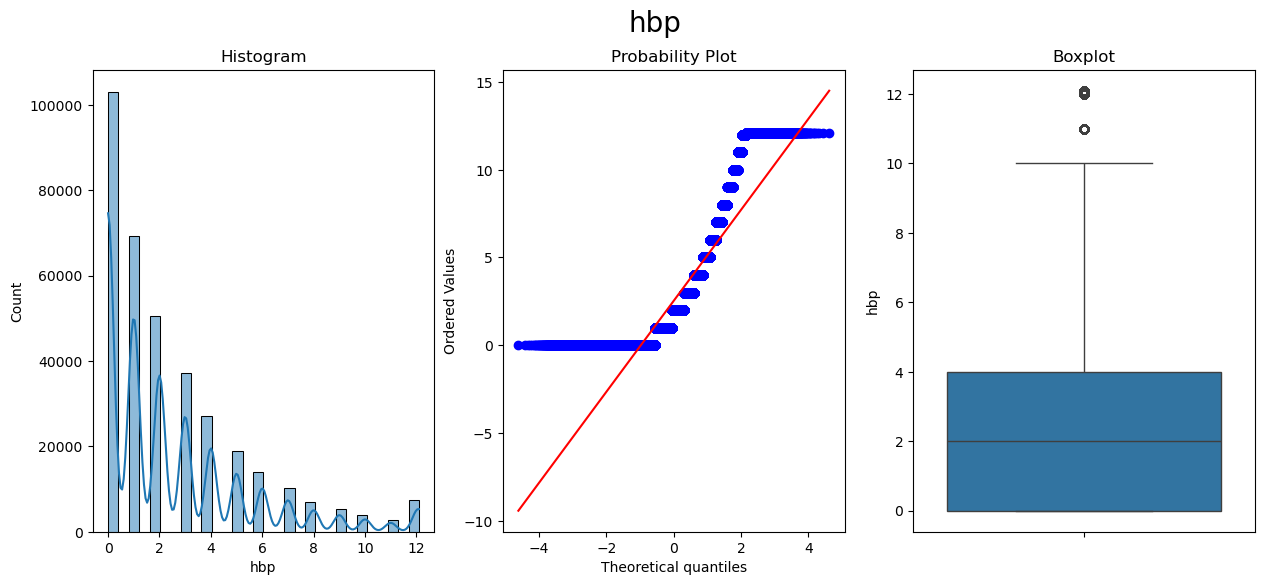

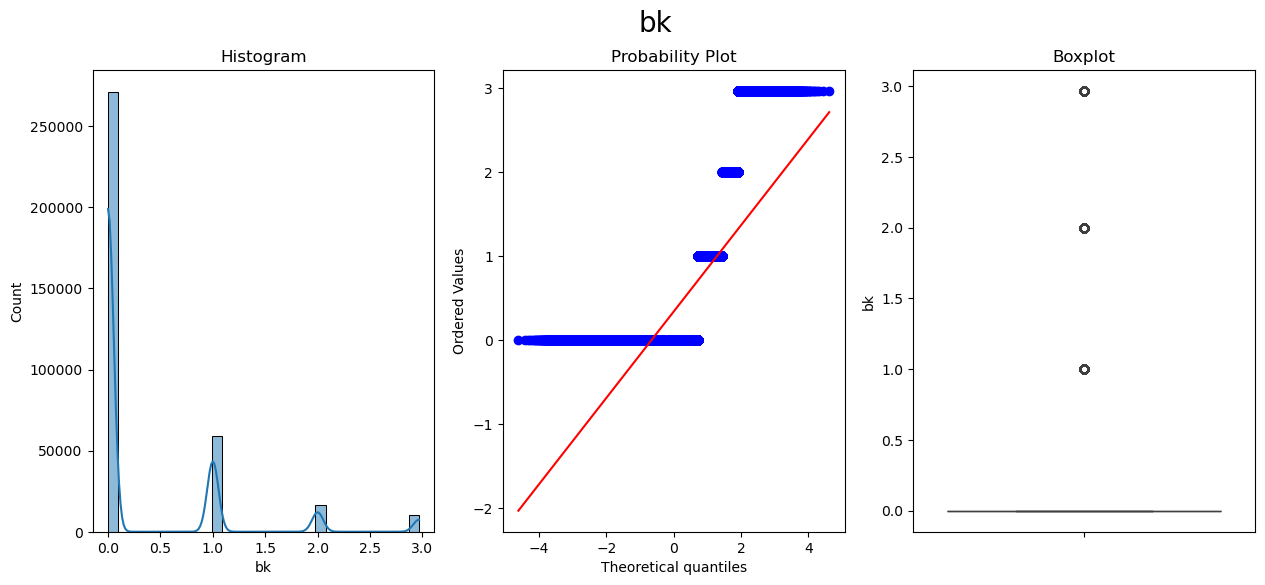

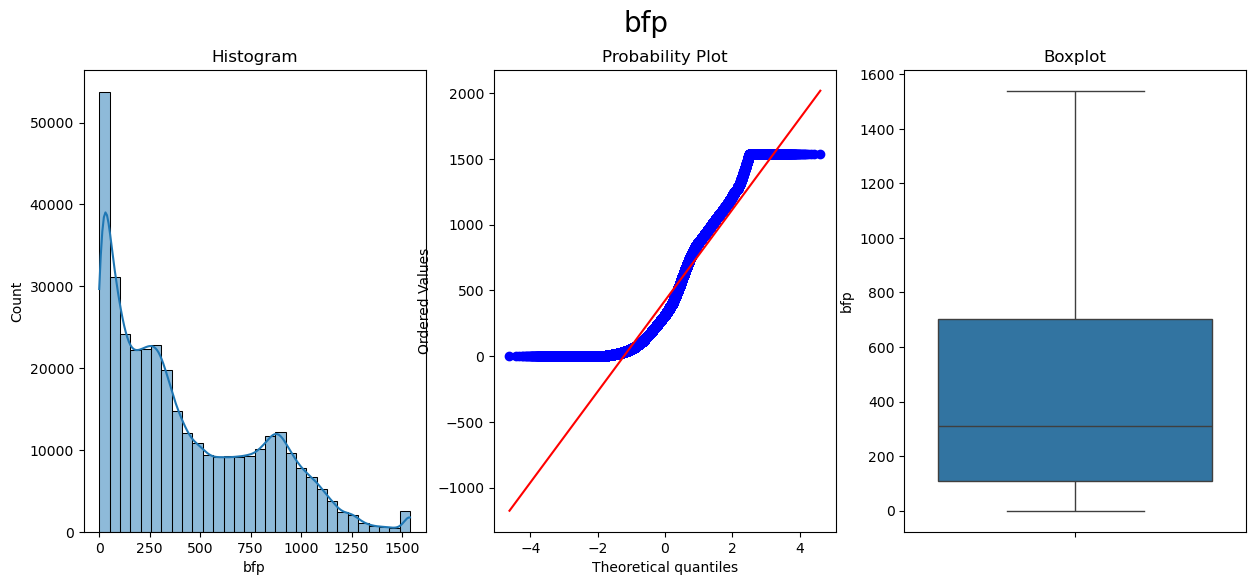

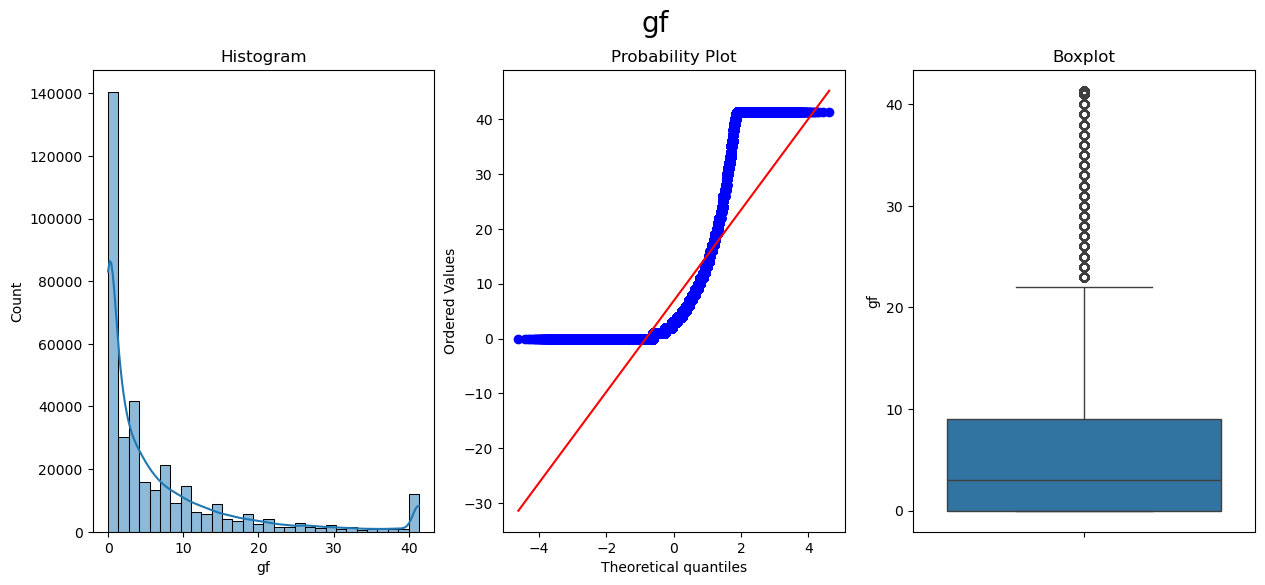

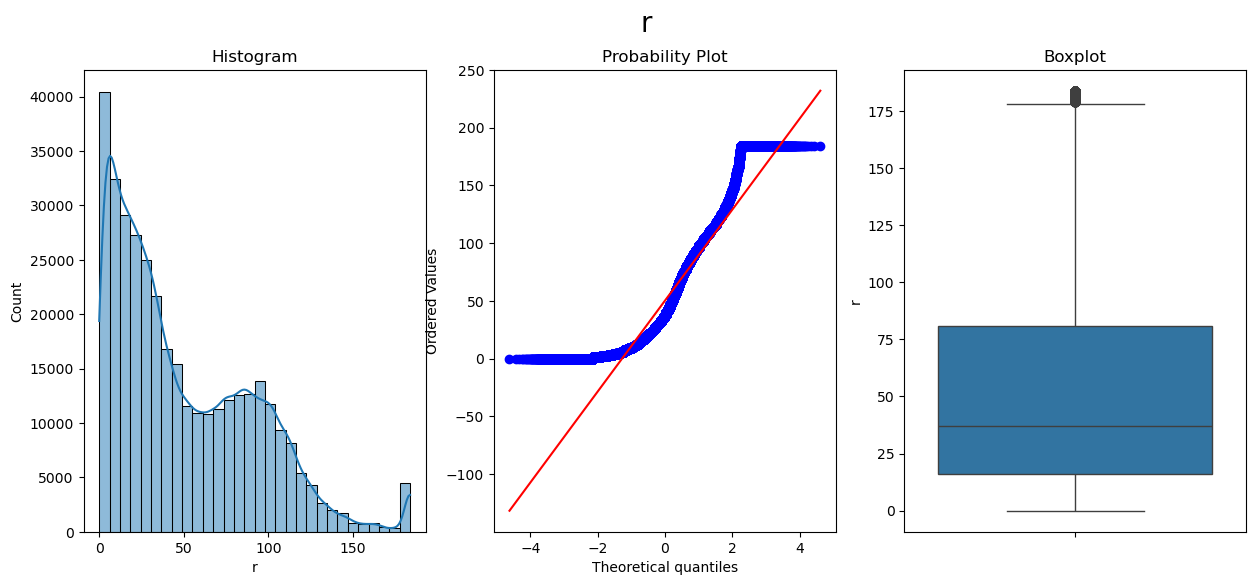

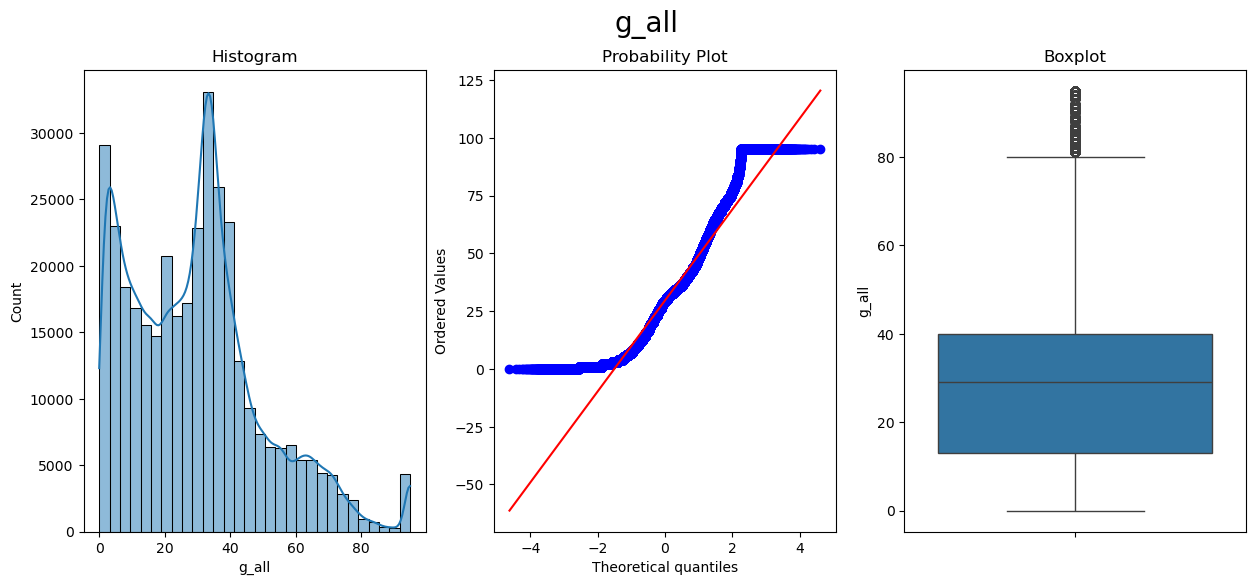

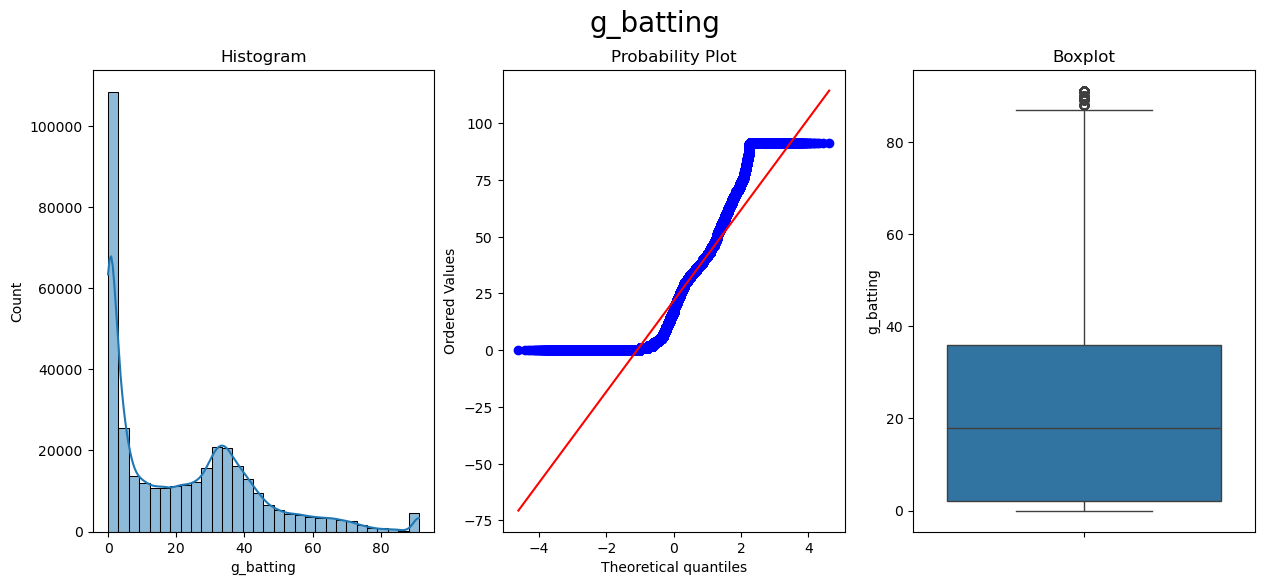

In [28]:
for var in X_train[num_cols]:
    diagnostic_plots(X_train, var)

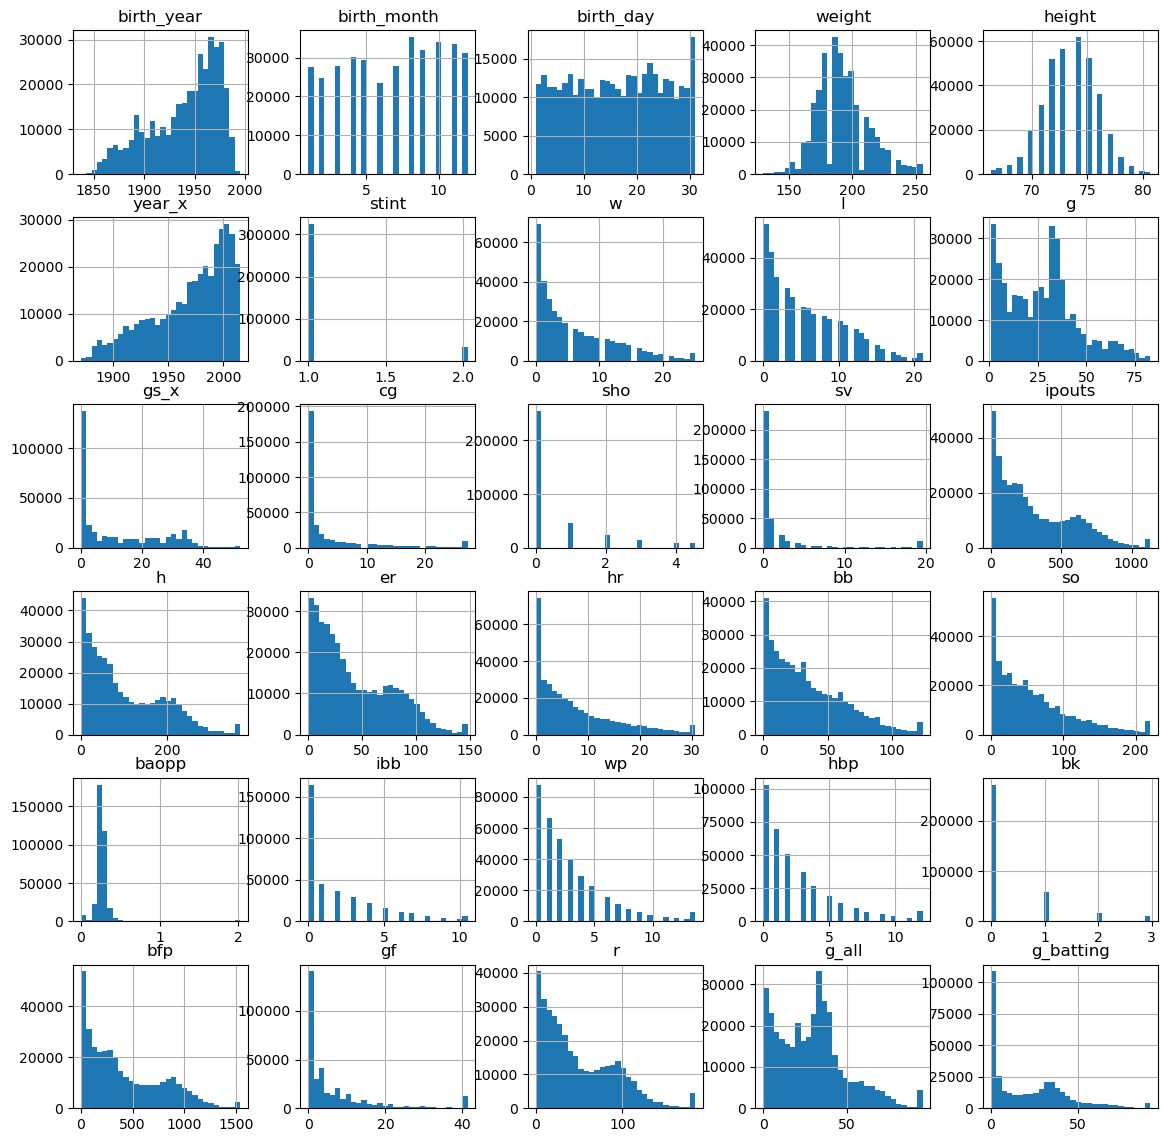

In [29]:
X_train[num_cols].hist(bins=30, figsize=(14,14))
plt.show()

In [30]:
from feature_engine.transformation import YeoJohnsonTransformer
skewed = ['w','l','g','h','er','hr','bb','so','baopp','ibb','wp','hbp','bk','bfp','gf','r','g_all','g_batting']
yjt = YeoJohnsonTransformer(variables = skewed)

yjt.fit(X_train)

X_train = yjt.transform(X_train)
X_test = yjt.transform(X_test)

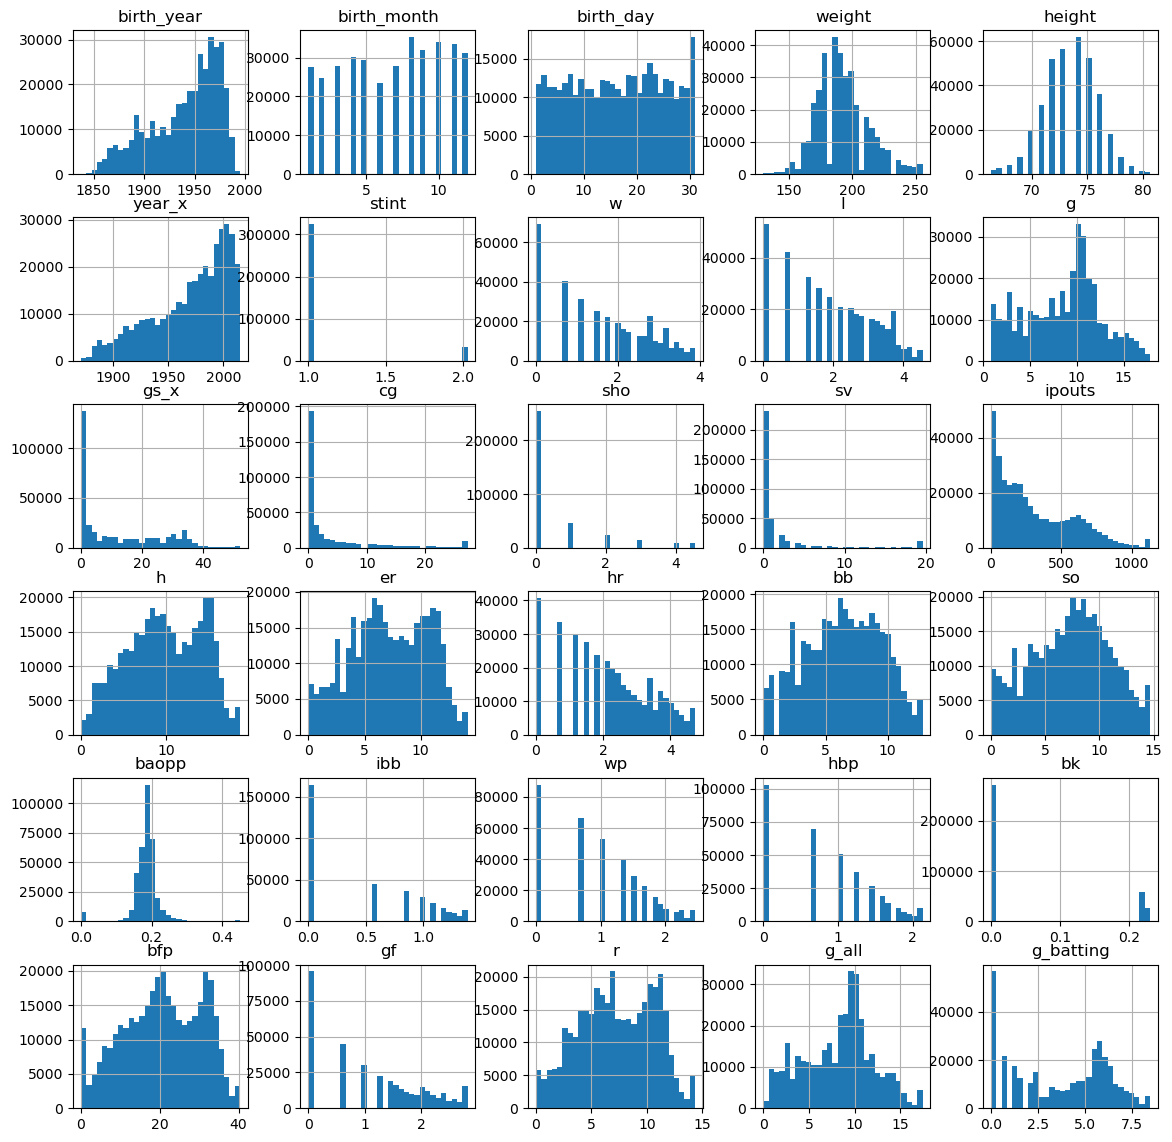

In [31]:
X_train[num_cols].hist(bins=30, figsize=(14,14))
plt.show()

In [32]:
cat_cols = [c for c in X_train.columns if X_train[c].dtypes == 'O']
X_train[cat_cols].isnull().mean().sort_values()

player_id        0.000000
birth_country    0.000000
name_first       0.000000
name_last        0.000000
name_given       0.000000
debut            0.000000
final_game       0.000000
team_id_x        0.000000
league_id_x      0.001751
birth_city       0.002079
throws           0.002085
bats             0.004758
birth_state      0.029373
dtype: float64

In [33]:
null_columns = ['league_id_x', 'throws', 'birth_city', 'bats', 'birth_state']
X_train[null_columns] = X_train[null_columns].fillna('Unknown')
X_test[null_columns] = X_test[null_columns].fillna('Unknown')

In [34]:
X_train[cat_cols].isnull().mean().sort_values()

player_id        0.0
birth_country    0.0
birth_state      0.0
birth_city       0.0
name_first       0.0
name_last        0.0
name_given       0.0
bats             0.0
throws           0.0
debut            0.0
final_game       0.0
team_id_x        0.0
league_id_x      0.0
dtype: float64

In [35]:
ordinal_enc = OrdinalEncoder(
    encoding_method='ordered',
    variables=cat_cols)

ordinal_enc.fit(X_train, y_train)

OrdinalEncoder(variables=['player_id', 'birth_country', 'birth_state',
                          'birth_city', 'name_first', 'name_last', 'name_given',
                          'bats', 'throws', 'debut', 'final_game', 'team_id_x',
                          'league_id_x'])

In [36]:
X_train = ordinal_enc.transform(X_train)
X_test = ordinal_enc.transform(X_test)


C:\Users\tejsk\anaconda3\Lib\site-packages\feature_engine\encoding\base_encoder.py:260: UserWarning: During the encoding, NaN values were introduced in the feature(s) player_id, birth_state, birth_city, name_first, name_last, name_given, debut, final_game.
  warnings.warn(


In [37]:
X_test[cat_cols].isnull().mean().sort_values()

birth_country    0.000000
bats             0.000000
throws           0.000000
team_id_x        0.000000
league_id_x      0.000000
birth_state      0.000064
name_first       0.000508
birth_city       0.001509
final_game       0.002477
name_last        0.002763
debut            0.003065
name_given       0.003382
player_id        0.005542
dtype: float64

In [38]:
X_test = X_test.replace({np.nan : 0}) 

In [39]:
from feature_engine.discretisation import EqualFrequencyDiscretiser

disc = EqualFrequencyDiscretiser(q=10, variables = ['bb', 'so'], return_object=True)

disc.fit(X_train)

EqualFrequencyDiscretiser(return_object=True, variables=['bb', 'so'])

In [40]:
X_trainc = X_train
X_testc = X_test

In [41]:
X_train = disc.transform(X_train)
X_test = disc.transform(X_test)

In [42]:
from sklearn.preprocessing import StandardScaler, RobustScaler
scaler = StandardScaler()

scaler.fit(X_train)

StandardScaler()

In [43]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [44]:
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

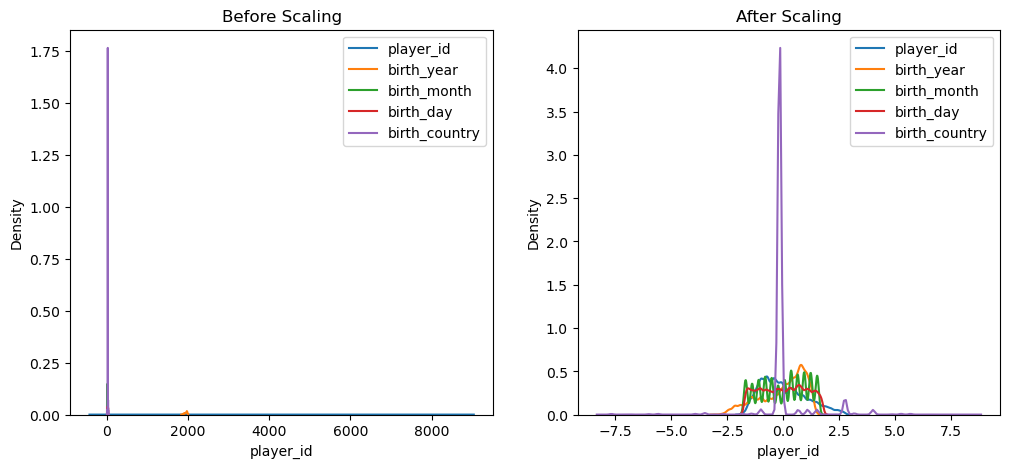

In [45]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
for column in X_trainc.iloc[:, :5]:
    sns.kdeplot(X_trainc[column], ax=ax1, label = column)
ax1.legend()

# after scaling
ax2.set_title('After Scaling')
for column in X_train.iloc[:, :5]:
    sns.kdeplot(X_train[column], ax=ax2, label = column)
ax2.legend()
plt.show()

### Step 4: Machine Learning Modelling

In [46]:
X_train_final = X_train
X_test_final = X_test

y_train_final = y_train
y_test_final = y_test

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [48]:
# Build Linear Regression Model
model_linear_regression = LinearRegression()
model_linear_regression.fit(X_train_final, y_train_final)

# Evaluate the Linear Regression Model using Mean Square Error (MSE)
# The lower MSE, the better the model performance
print('train_mse:', mean_squared_error(y_train_final, model_linear_regression.predict(X_train_final)), 
      '\n test_mse:', mean_squared_error(y_test_final, model_linear_regression.predict(X_test_final)))

# Evaluate the Linear Regression Model using R-Square
# The closer the r-square value to 1, the better the model performance
print('train_r-sq:', r2_score(y_train_final, model_linear_regression.predict(X_train_final)), 
      '\n test_r-sq:', r2_score(y_test_final, model_linear_regression.predict(X_test_final)))

train_mse: 11.37868694373197 
 test_mse: 11.350148905900944
train_r-sq: 0.3834307898329592 
 test_r-sq: 0.3852499307541848


In [49]:
mean_target_value = y_train.mean()
y_train_preds_naive = [round(mean_target_value,2) for row in X_train.iloc[:,0]]
y_train_preds_naive[0:5]


[4.61, 4.61, 4.61, 4.61, 4.61]

In [50]:
y_test_preds_naive = [round(mean_target_value,2) for row in X_test.iloc[:,0]]
y_test_preds_naive[0:5]

[4.61, 4.61, 4.61, 4.61, 4.61]

In [51]:
# Mean Squared Error (the lower the better, 0 is best possible score)

# train MSE score
y_true = y_train
y_pred = y_train_preds_naive

train_mse_naive = mean_squared_error(y_true, y_pred)
print(f"The Naive Baseline Model's MSE on train data is {train_mse_naive:.2f}.")

# test MSE score
y_true = y_test
y_pred = y_test_preds_naive

test_mse_naive = mean_squared_error(y_true, y_pred)
print(f"The Naive Baseline Model's MSE on test data is {test_mse_naive:.2f}.")

print()

# Root Mean Squared Error (if MSE < 1, rooting it makes it numerically larger, vice-versa if MSE > 1)

# train RMSE score
y_true = y_train
y_pred = y_train_preds_naive

train_rmse_naive = mean_squared_error(y_true, y_pred, squared=False)
print(f"The Naive Baseline Model's RMSE on train data is {train_rmse_naive:.2f}.")

# test RMSE score
y_true = y_test
y_pred = y_test_preds_naive

test_rmse_naive = mean_squared_error(y_true, y_pred, squared=False)
print(f"The Naive Baseline Model's RMSE on test data is {test_rmse_naive:.2f}.")

print()

# R2 Value (Coefficient of Determination, which measures how well the X cols account for y's variance, 1.0 is best score)

# train R2 score
y_true = y_train
y_pred = y_train_preds_naive

train_r2_naive = r2_score(y_true, y_pred)
print(f"The Naive Baseline Model's R2 on train data is {train_r2_naive:.2f}.")

# test R2 score
y_true = y_test
y_pred = y_test_preds_naive

test_r2_naive = r2_score(y_true, y_pred)
print(f"The Naive Baseline Model's R2 on test data is {test_r2_naive:.2f}.")


The Naive Baseline Model's MSE on train data is 18.45.
The Naive Baseline Model's MSE on test data is 18.46.

The Naive Baseline Model's RMSE on train data is 4.30.
The Naive Baseline Model's RMSE on test data is 4.30.

The Naive Baseline Model's R2 on train data is -0.00.
The Naive Baseline Model's R2 on test data is -0.00.


C:\Users\tejsk\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\tejsk\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# Report

# Table of Contents
1. [Introduction](#1)
2. [Problem Formulation](#2)
3. [Data Wrangling on multiple tables](#3)
4. [Data Cleansing and Transformation](#4)
5. [Machine Learning Model](#5)
6. [Summary and Further Improvements](#6)
7. [Reflection](#7)

## 1. Introduction<a name="1"></a>

Baseball, with its rich history and deep-rooted statistical culture, offers a unique landscape for data analysis. Over the years, statistics have become an integral part of the sport, influencing decisions on the field, in the front office, and even among fans. As the volume of baseball data has grown, so too has the complexity of the analysis needed to extract meaningful insights. Traditional statistical methods, while valuable, often struggle to capture the intricate relationships between the myriad factors that influence player performance and game outcomes.

In order to solve this, we use a new technology - Machine Learning. Machine Learning is suited for analysing baseball statistics as they can process vast datasets, uncover hidden patterns, and make predictions with a level of accuracy that surpasses conventional approaches. By leveraging these advanced techniques, it is possible to predict a wide range of baseball statistics, from individual player metrics to team performance indicators, with greater precision.

The report focuses on the application of machine learning in order to solve regression problems relating to an historical baseball dataset in order to benefit the teams of the Major League Baseball association. This report will be focused on devising an regression problem for the machine learning algorithm to solve. In the end of the report, I will provide a summary and potential improvements to the model.

## 2. Problem Formulation<a name="2"></a>

Currently, one of the major problems in baseball is that teams are taking a wild guess when they sign new players in free agency or attempt to draft new players to their team to increase their chances of succeeding in the season. As it stands, current methods of scouting based on feel is not suitable for teams who are trying to succeed. 

Therefore, I would like to propose a solution. Using a Machine Learning Model that is trained on historical MLB data to predict a player’s ERA (Earned Run Average). ERA is useful in determining an pitcher’s overall skill and value to a team, as it is a statistic indicating how many earned runs they allow per nine innings pitched. A lower ERA generally means the pitcher is more effective at preventing the opposing team from scoring.

This greatly simplifies signing new players to the team, as well as increases the efficacy of scouting for new talent.

Therefore, my regression problem would be, "Create a Machine Learning Model that is able to predict a player's ERA given various statistics."

## 3. Data Wrangling on multiple tables<a name="3"></a>

In [52]:
player1 = pd.read_csv('./Datasets/CSV/player.csv')
appearances1 = pd.read_csv('./Datasets/CSV/appearances.csv')
pitching1 = pd.read_csv('./Datasets/CSV/pitching.csv')

In the code block above, I import the data that is needed for the creation of the model. I have chosen 3 tables to use for this purpose. The player table, which contains statistics of each player, the pitching table, which contains said players pitching statistics, and finally the appearances table, which contains the appearances of each player in each game under each position in baseball.

In [53]:
data1 = pd.merge(player1, pitching1 ,on='player_id',how='inner')
data1 = pd.merge(data1, appearances1 ,on='player_id',how='inner')
data1.head(10)

player_id  birth_year  birth_month  birth_day birth_country birth_state  \
0  aardsda01      1981.0         12.0       27.0           USA          CO   
1  aardsda01      1981.0         12.0       27.0           USA          CO   
2  aardsda01      1981.0         12.0       27.0           USA          CO   
3  aardsda01      1981.0         12.0       27.0           USA          CO   
4  aardsda01      1981.0         12.0       27.0           USA          CO   
5  aardsda01      1981.0         12.0       27.0           USA          CO   
6  aardsda01      1981.0         12.0       27.0           USA          CO   
7  aardsda01      1981.0         12.0       27.0           USA          CO   
8  aardsda01      1981.0         12.0       27.0           USA          CO   
9  aardsda01      1981.0         12.0       27.0           USA          CO   

  birth_city  death_year  death_month  death_day  ... g_2b g_3b g_ss g_lf  \
0     Denver         NaN          NaN        NaN  ...    0    0    0    0   
1     Denver         NaN          NaN        NaN  ...    0    0    0    0   
2     Denver         NaN          NaN        NaN  ...    0    0    0    0   
3     Denver         NaN          NaN        NaN  ...    0    0    0    0   
4     Denver         NaN          NaN        NaN  ...    0    0    0    0   
5     Denver         NaN          NaN        NaN  ...    0    0    0    0   
6     Denver         NaN          NaN        NaN  ...    0    0    0    0   
7     Denver         NaN          NaN        NaN  ...    0    0    0    0   
8     Denver         NaN          NaN        NaN  ...    0    0    0    0   
9     Denver         NaN          NaN        NaN  ...    0    0    0    0   

  g_cf g_rf  g_of  g_dh g_ph g_pr  
0    0    0     0   0.0  0.0  0.0  
1    0    0     0   0.0  0.0  0.0  
2    0    0     0   0.0  0.0  0.0  
3    0    0     0   0.0  0.0  0.0  
4    0    0     0   0.0  0.0  0.0  
5    0    0     0   0.0  0.0  0.0  
6    0    0     0   0.0  0.0  0.0  
7    0    0     0   0.0  0.0  0.0  
8    0    0     0   0.0  0.0  0.0  
9    0    0     0   0.0  0.0  0.0  

[10 rows x 73 columns]

In the code block above, I merge all 3 tables into one for further data analysis.

In [54]:
data1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421210 entries, 0 to 421209
Data columns (total 73 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   player_id      421210 non-null  object 
 1   birth_year     421142 non-null  float64
 2   birth_month    420803 non-null  float64
 3   birth_day      420362 non-null  float64
 4   birth_country  421186 non-null  object 
 5   birth_state    408832 non-null  object 
 6   birth_city     420281 non-null  object 
 7   death_year     158706 non-null  float64
 8   death_month    158706 non-null  float64
 9   death_day      158706 non-null  float64
 10  death_country  158558 non-null  object 
 11  death_state    158172 non-null  object 
 12  death_city     158526 non-null  object 
 13  name_first     421204 non-null  object 
 14  name_last      421210 non-null  object 
 15  name_given     421204 non-null  object 
 16  weight         419831 non-null  float64
 17  height         420112 non-nul

In [55]:
data1 = data1.drop(columns=['year_y', 'team_id_y', 'league_id_y', 'gs_y'])

In this code block, I drop all duplicate columns.

### 3.1. Exploratory Data Analysis

Text(0.5, 1.0, 'Cardinality')

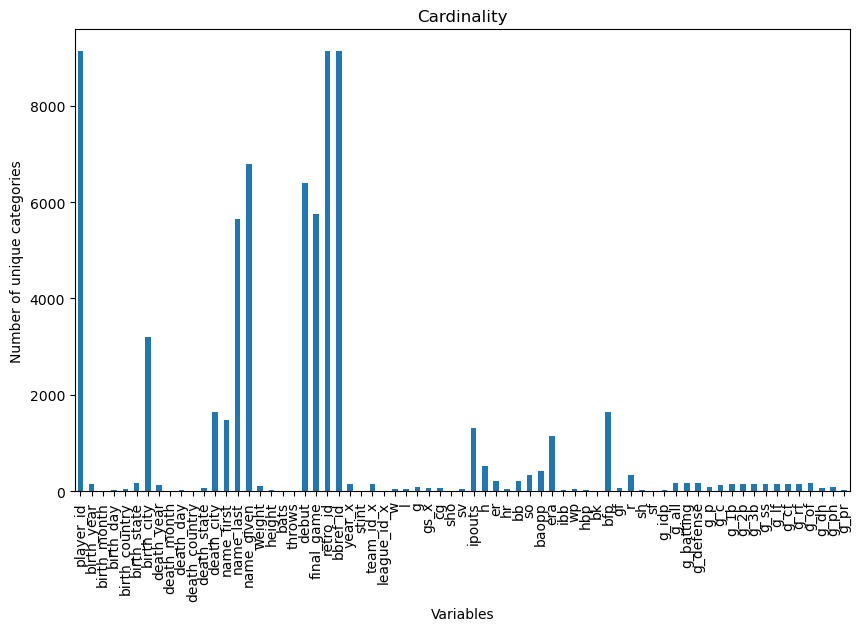

In [56]:
data1.nunique().plot.bar(figsize=(10,6))

plt.ylabel('Number of unique categories')
plt.xlabel('Variables')
plt.title('Cardinality')

The chart above me is a chart depicting the cardinality of each variable in the dataset. The cardinality of the variables is defined as the the number of value that any given value in the column can take. Exploring the cardinality of variables is very important as it can point out a number of things, such as possible anomalies in the dataset, or tell me what types of encoding methods we should use. As we can see in the above chart of the cardinality of variables, variables such as name_last and player_id have high cardinality, while variables such as birth_month, bats and sho have low cardinality. 

Text(0.5, 0, 'Variables')

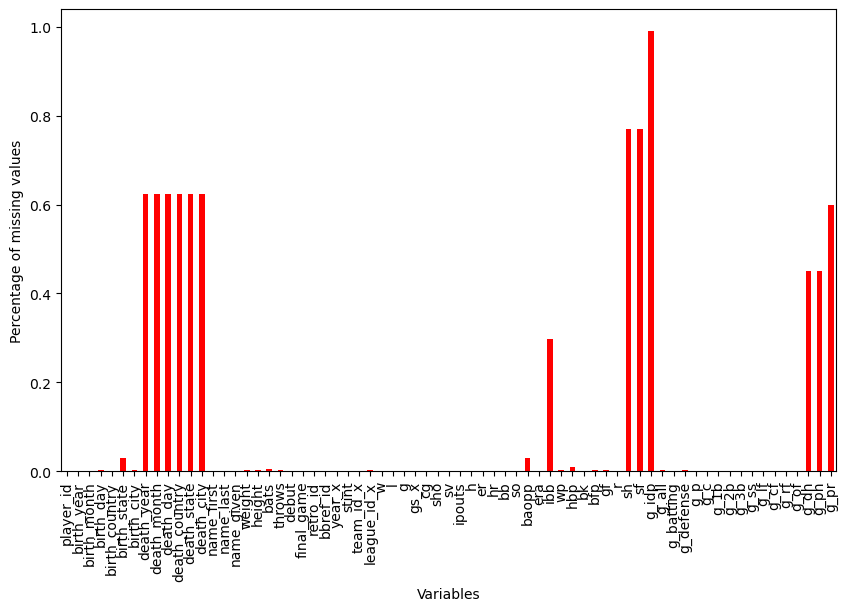

In [57]:
data1.isnull().mean().plot.bar(figsize=(10,6), color = 'r')
plt.ylabel('Percentage of missing values')
plt.xlabel('Variables')

Next, let us talk about finding missing values. We have to locate missing values in the dataset as missing values will prevent the linear regression model from working completely. The code above shows the percentage of missing values in the dataset. For easy analysis, I have created a bar chart that shows the number of missing values in each column of the dataset. This bar chart shows me the columns with missing values which I will have to deal with later.

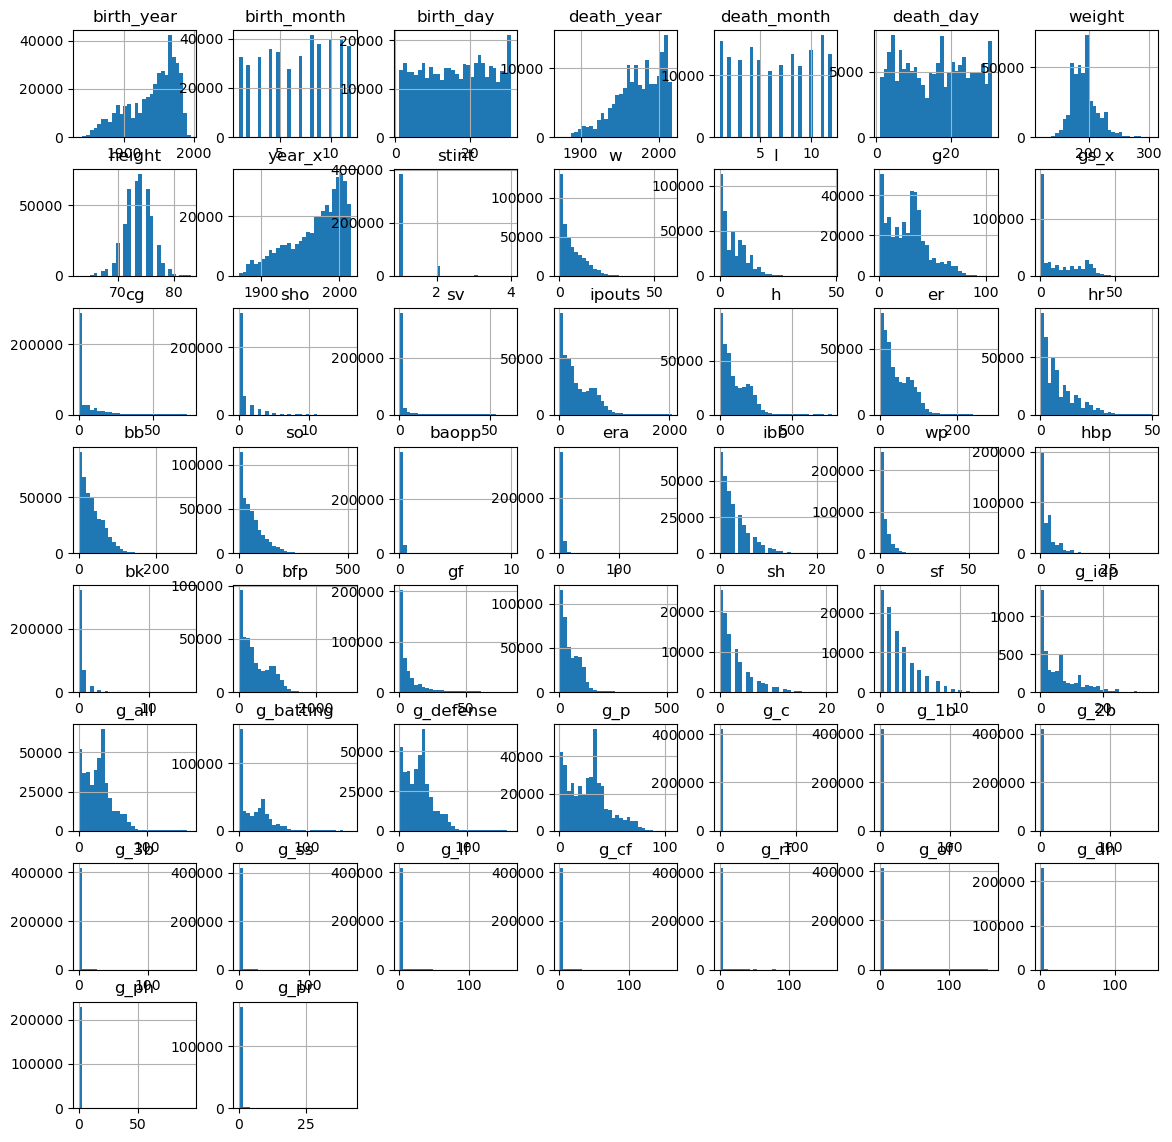

In [58]:
num_cols = [c for c in data1.columns if data1[c].dtypes !='O']
data1[num_cols].hist(bins=30, figsize=(14,14))
plt.show()

Now, let us talk about the distribution of numeric columns. We have to analyse the distribution of numeric variables to better understand how to transform these numeric variables later on. As seen in the visual, many of the numeric variables have a right skew. We will eventually need to deal with these variables.

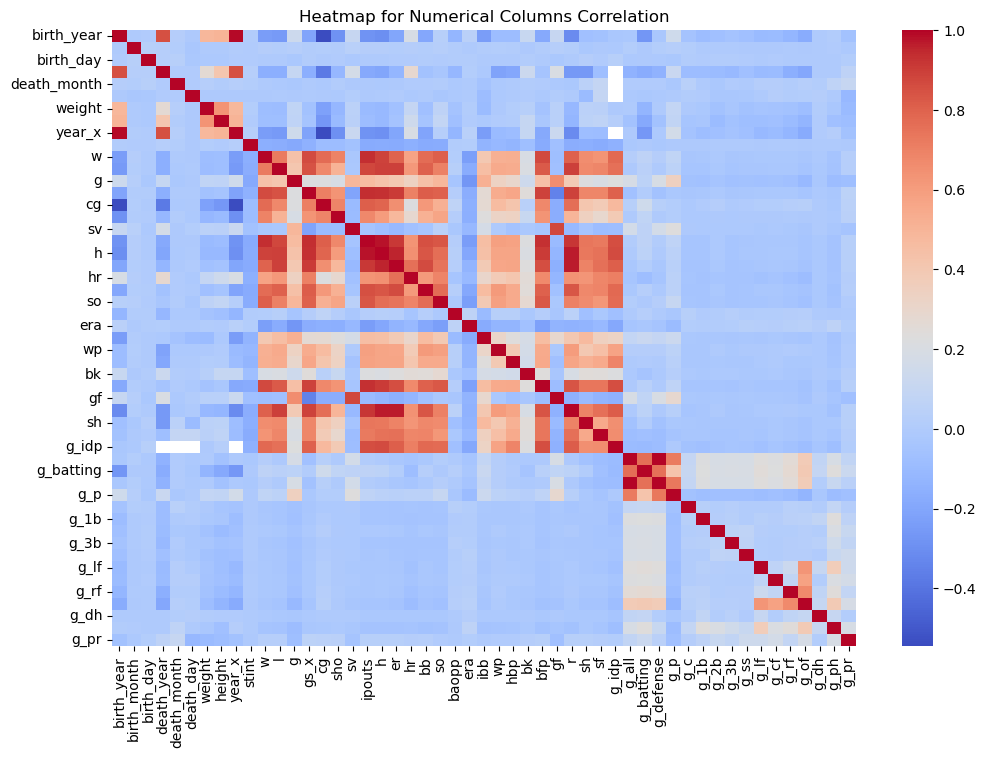

In [59]:
# Calculate correlation matrix
corr_matrix = data1[num_cols].corr()

# Create heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title('Heatmap for Numerical Columns Correlation')
plt.show()

This is the heatmap for numerical columns correlation, in its current form, it is too hard to comprehend. Therefore, I have created some code to only show the correlation between ERA and each numerical variable, and rank them accordingly.

In [60]:
correlations = data1[num_cols].corr()['era']

def correlation_strength(r):
    abs_r = abs(r)
    if abs_r == 0:
        return "No Correlation"
    elif 0 < abs_r < 0.1:
        return "Very Weak"
    elif 0.1 <= abs_r < 0.3:
        return "Weak"
    elif 0.3 <= abs_r < 0.5:
        return "Moderate"
    elif 0.5 <= abs_r < 0.7:
        return "Strong"
    elif 0.7 <= abs_r < 0.9:
        return "Very Strong"
    elif 0.9 <= abs_r <= 1:
        return "Extremely Strong"

# Print correlations with titles indicating strength
grouped_correlations = {}
correlations = correlations.sort_values()

for variable, correlation in correlations.items():
    if variable != 'era':
        strength = correlation_strength(correlation)
        direction = "Positive" if correlation > 0 else "Negative"
        key = f"{strength} {direction} Correlation"
        
        if key not in grouped_correlations:
            grouped_correlations[key] = []
        
        grouped_correlations[key].append(f"{variable}: {correlation:.3f}")

# Print grouped correlations
for strength, variables in grouped_correlations.items():
    print(f"{strength}:")
    for variable in variables:
        print(f"  {variable}")
    print()

Weak Negative Correlation:
  g: -0.269
  ipouts: -0.238
  w: -0.235
  so: -0.233
  bfp: -0.224
  h: -0.200
  g_idp: -0.193
  bb: -0.192
  ibb: -0.182
  l: -0.173
  gs_x: -0.169
  sho: -0.163
  cg: -0.153
  r: -0.146
  sh: -0.140
  gf: -0.139
  er: -0.139
  hbp: -0.131
  wp: -0.129
  sv: -0.112
  hr: -0.108
  sf: -0.106

Very Weak Negative Correlation:
  g_p: -0.093
  bk: -0.064
  g_defense: -0.047
  g_all: -0.043
  g_batting: -0.030
  death_month: -0.006
  death_day: -0.003
  birth_month: -0.002

Very Weak Positive Correlation:
  height: 0.001
  weight: 0.007
  birth_day: 0.009
  g_2b: 0.009
  g_1b: 0.009
  g_3b: 0.012
  death_year: 0.014
  stint: 0.014
  g_pr: 0.015
  g_c: 0.016
  g_cf: 0.017
  g_dh: 0.019
  g_lf: 0.026
  g_rf: 0.029
  g_ss: 0.033
  g_of: 0.038
  year_x: 0.039
  birth_year: 0.042
  baopp: 0.059
  g_ph: 0.063



This code shows the different correlations between each numerical variable and ERA and groups them according to the strength of their correlation. As a rule of thumb, when ERA gets lower, the pitchers skill is usually better. Therefore, the variable with strong negative correlations impact ERA positively. Going off this rule, 'g' and 'ipouts' have the greatest negative correlation with ERA, at -0.269 and -0.238 respectively.

## 4. Data Cleansing and Transformation <a name="4"></a>

### 4.1 Missing Value and Outliers 

In some of the variables, there are missing values. These missing values need to be replaced more often than not, as any amount of null values that still remain in the dataset will cause the model to stop working. In this section, I outline how I imputed the missing values using various different techniques.

In [61]:
data1 = data1.iloc[:, 0:57].drop(columns = ['death_year', 'death_month', 'death_day', 'death_country', 'death_state', 
                                            'death_city', 'g_defense', 'g_p', 'sh', 'sf', 'g_idp', 'retro_id', 'bbref_id'])

Firstly, we drop columns unimportant to the problem. Any appearance statistics unrelated to games played and games as pitcher is irrelevant, and as many MLB professionals are still alive, we will drop all death related statistics.

In [62]:
data1.isnull().mean().sort_values()

player_id        0.000000
r                0.000000
bk               0.000000
so               0.000000
bb               0.000000
hr               0.000000
er               0.000000
h                0.000000
sv               0.000000
sho              0.000000
cg               0.000000
gs_x             0.000000
g                0.000000
w                0.000000
team_id_x        0.000000
stint            0.000000
l                0.000000
g_batting        0.000000
year_x           0.000000
name_last        0.000000
final_game       0.000005
debut            0.000005
name_given       0.000014
name_first       0.000014
ipouts           0.000019
birth_country    0.000057
birth_year       0.000161
birth_month      0.000966
era              0.001263
birth_day        0.002013
league_id_x      0.002018
gf               0.002046
wp               0.002056
g_all            0.002141
birth_city       0.002206
throws           0.002467
height           0.002607
weight           0.003274
bfp         

In [63]:
data1 = data1.dropna(subset=['final_game', 'debut'])

Next, we check the data for null values. In this case, the variables 'final_game' and 'debut' have very little null variables, and thus are not worth imputing, therefore, I simply drop the rows containing the null values from the dataset.

In [64]:
num_cols = [c for c in data1.columns if data1[c].dtypes !='O']
data1[num_cols].isnull().mean().sort_values()

h              0.000000
r              0.000000
bk             0.000000
so             0.000000
bb             0.000000
hr             0.000000
er             0.000000
sv             0.000000
sho            0.000000
cg             0.000000
g_batting      0.000000
g              0.000000
l              0.000000
w              0.000000
gs_x           0.000000
stint          0.000000
year_x         0.000000
ipouts         0.000019
birth_year     0.000159
birth_month    0.000964
era            0.001263
birth_day      0.002011
gf             0.002046
wp             0.002056
g_all          0.002141
height         0.002602
weight         0.003269
bfp            0.003404
hbp            0.009708
baopp          0.029743
ibb            0.297274
dtype: float64

In [65]:
data1 = data1.dropna(subset=['era', 'birth_year', 'birth_month', 'birth_day'])

Similiarly to the step above, we will check the numerical variables for null values to drop, and the variables 'era', 'birth_year', 'birth_month', and 'birth_day' have very little null variables, and thus are not worth imputing, therefore, I simply drop the rows containing the null values from the dataset.

In [66]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(
    data1.drop('era', axis=1), data1['era'], test_size=0.15, random_state=0)

X_train1.shape, X_test1.shape

((356856, 43), (62975, 43))

Now, we will conduct the train-test split to split the dataset into training and testing sets.

In [67]:
animputer1 = mdi.ArbitraryNumberImputer(
    arbitrary_number=0, variables=['ibb', 'wp', 'gf', 'g_all', 'bfp', 'hbp'])

medimputer1 = mdi.MeanMedianImputer(imputation_method='median',
                                   variables=['height', 'weight', 'baopp'])
animputer1.fit(X_train1)
medimputer1.fit(X_train1)

MeanMedianImputer(variables=['height', 'weight', 'baopp'])

Now, we set up two types of imputers for the remaining null values in the numeric columns. Since they are numerical variables, we can use a method of missing value imputing called "median value imputation". This from of imputation is carried out by taking the median of the variable, and using it to replace all the null values in the column. We will also be using arbitrary number imputation, a form of imputation that imputes a set number into null values. In this case, I chose the number 0 as most statistics that have null values make sense to be replaced with 0  

In [68]:
X_train1 = animputer.transform(X_train1)
X_test1 = animputer.transform(X_test1)
X_train1 = medimputer.transform(X_train1)
X_test1 = medimputer.transform(X_test1)

In the above code block, I use the imputers that I have trained to transform the X_train1 and X_test1 variables.

In [69]:
num_cols = [c for c in X_train1.columns if X_train1[c].dtypes !='O']
X_train1[num_cols].isnull().mean().sort_values()

birth_year     0.0
r              0.0
gf             0.0
bfp            0.0
bk             0.0
hbp            0.0
wp             0.0
ibb            0.0
baopp          0.0
so             0.0
bb             0.0
hr             0.0
er             0.0
h              0.0
ipouts         0.0
sv             0.0
sho            0.0
cg             0.0
gs_x           0.0
g              0.0
l              0.0
w              0.0
stint          0.0
year_x         0.0
height         0.0
weight         0.0
birth_day      0.0
birth_month    0.0
g_all          0.0
g_batting      0.0
dtype: float64

In [70]:
X_test1[num_cols].isnull().mean().sort_values()

birth_year     0.0
r              0.0
gf             0.0
bfp            0.0
bk             0.0
hbp            0.0
wp             0.0
ibb            0.0
baopp          0.0
so             0.0
bb             0.0
hr             0.0
er             0.0
h              0.0
ipouts         0.0
sv             0.0
sho            0.0
cg             0.0
gs_x           0.0
g              0.0
l              0.0
w              0.0
stint          0.0
year_x         0.0
height         0.0
weight         0.0
birth_day      0.0
birth_month    0.0
g_all          0.0
g_batting      0.0
dtype: float64

As seen above, as there are no more null values, we can assume that the imputation has succeeded.

In [71]:
cat_cols = [c for c in X_train1.columns if X_train1[c].dtypes == 'O']
X_train1[cat_cols].isnull().mean().sort_values()

player_id        0.000000
birth_country    0.000000
name_first       0.000000
name_last        0.000000
name_given       0.000000
debut            0.000000
final_game       0.000000
team_id_x        0.000000
league_id_x      0.001751
birth_city       0.002079
throws           0.002085
bats             0.004758
birth_state      0.029373
dtype: float64

Now, let us move on to the categorical variables in the dataset.

In [72]:
null_columns = ['league_id_x', 'throws', 'birth_city', 'bats', 'birth_state']
X_train1[null_columns] = X_train1[null_columns].fillna('Unknown')
X_test1[null_columns] = X_test1[null_columns].fillna('Unknown')

As seen in the above list, there are only 2 categorical variables in the dataset. Both these variables contain null values. We will have to conduct missing value imputation on these variables. As they are categorical variables, I have chosen to use a method of missing value imputing called "Arbitrary Value Imputation",which allows me to transform the missing values to a set value I want, in this case "Unknown" as the it makes sense for these columns to have null values replaced by "Unknown".

In [73]:
X_train1[cat_cols].isnull().mean().sort_values()

player_id        0.0
birth_country    0.0
birth_state      0.0
birth_city       0.0
name_first       0.0
name_last        0.0
name_given       0.0
bats             0.0
throws           0.0
debut            0.0
final_game       0.0
team_id_x        0.0
league_id_x      0.0
dtype: float64

As seen above, as there are no more null values, we can assume that the imputation has succeeded.

In [74]:
def diagnostic_plots(df, variable):
        
    plt.figure(figsize=(15,6))
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30, kde=True)
    plt.title('Histogram')

    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.title('Probability Plot')

    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.suptitle(variable, fontsize=20)
    plt.show()

Above, we define a function to view the distribution of each variable, which includes a boxplot, probability plot and histogram.

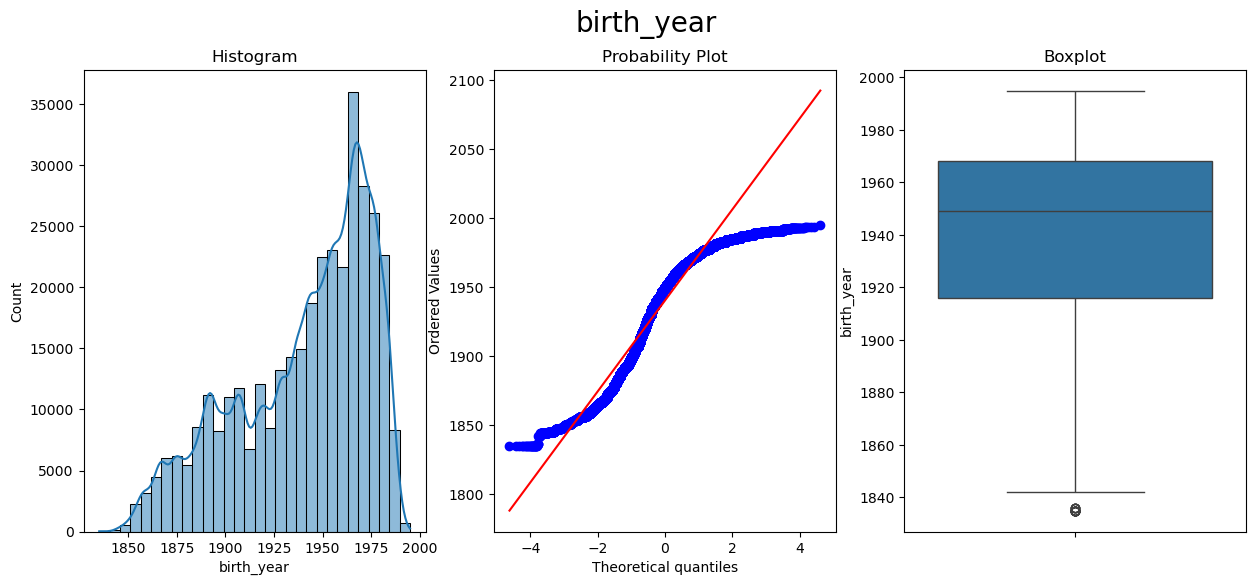

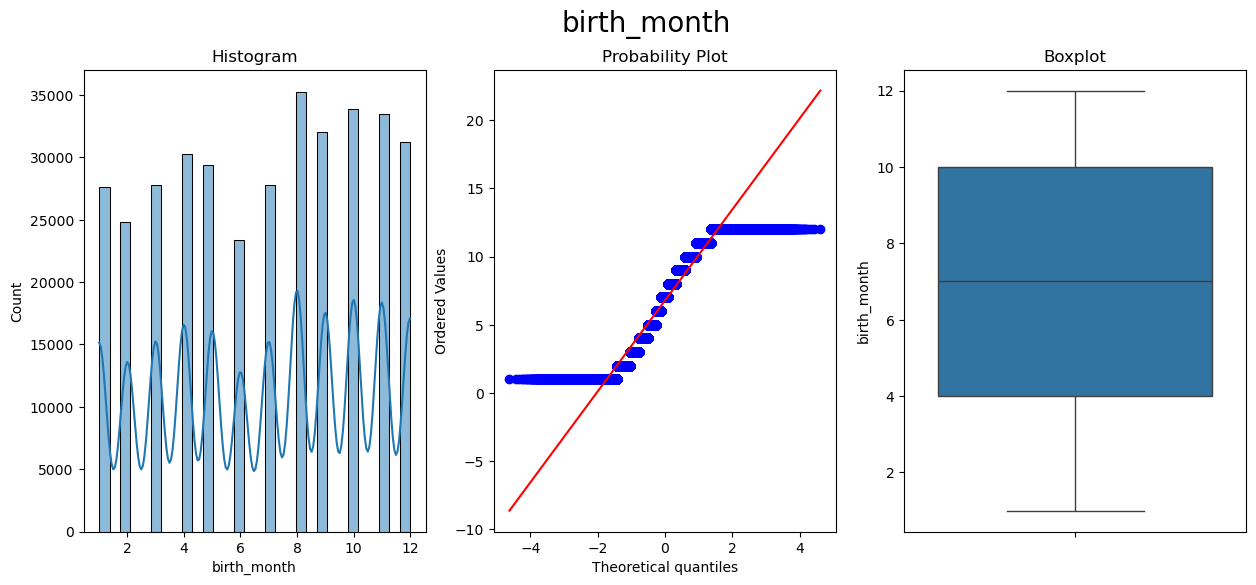

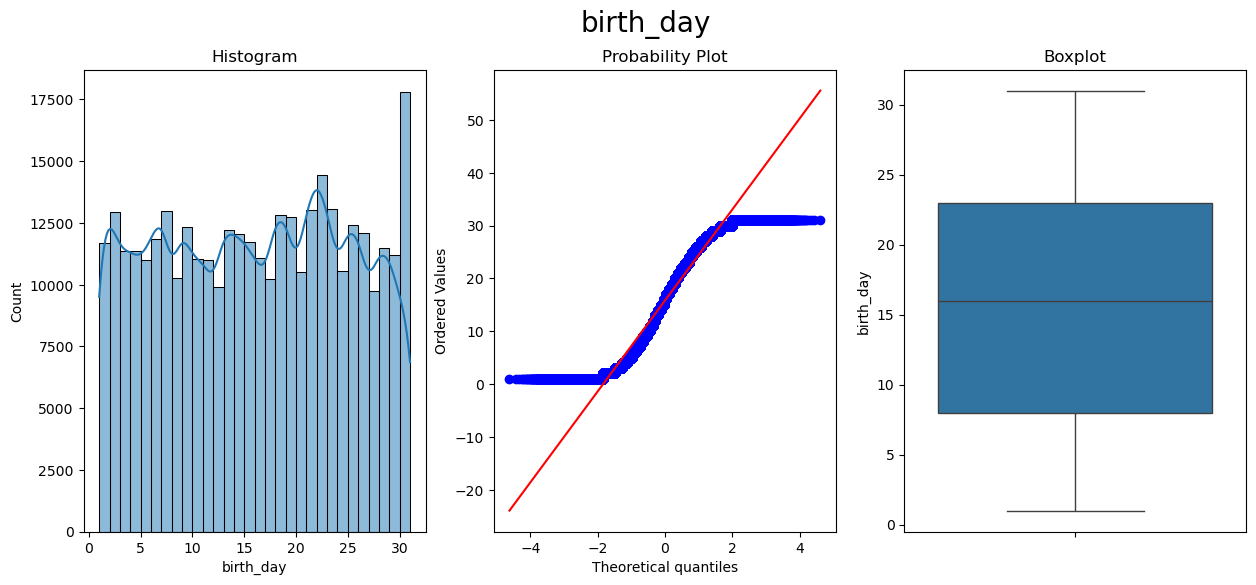

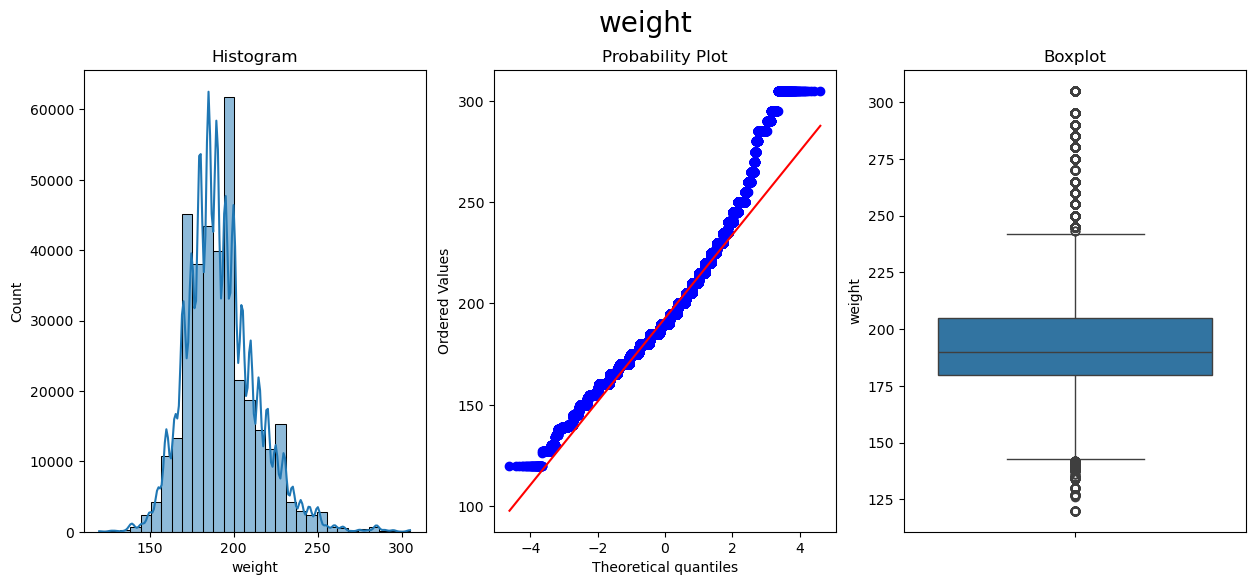

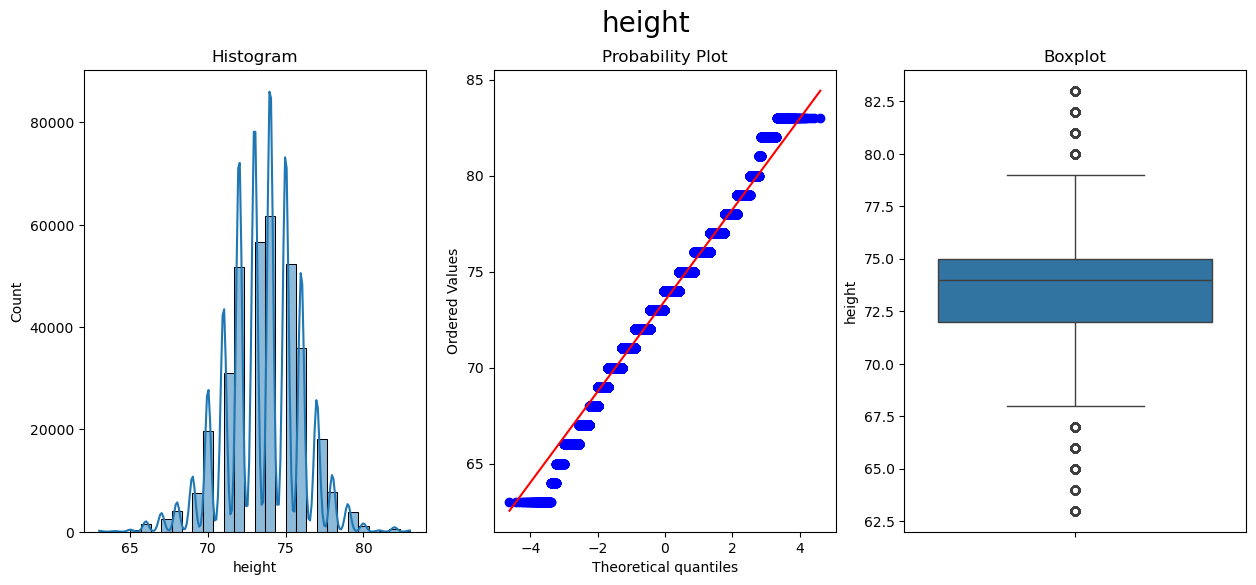

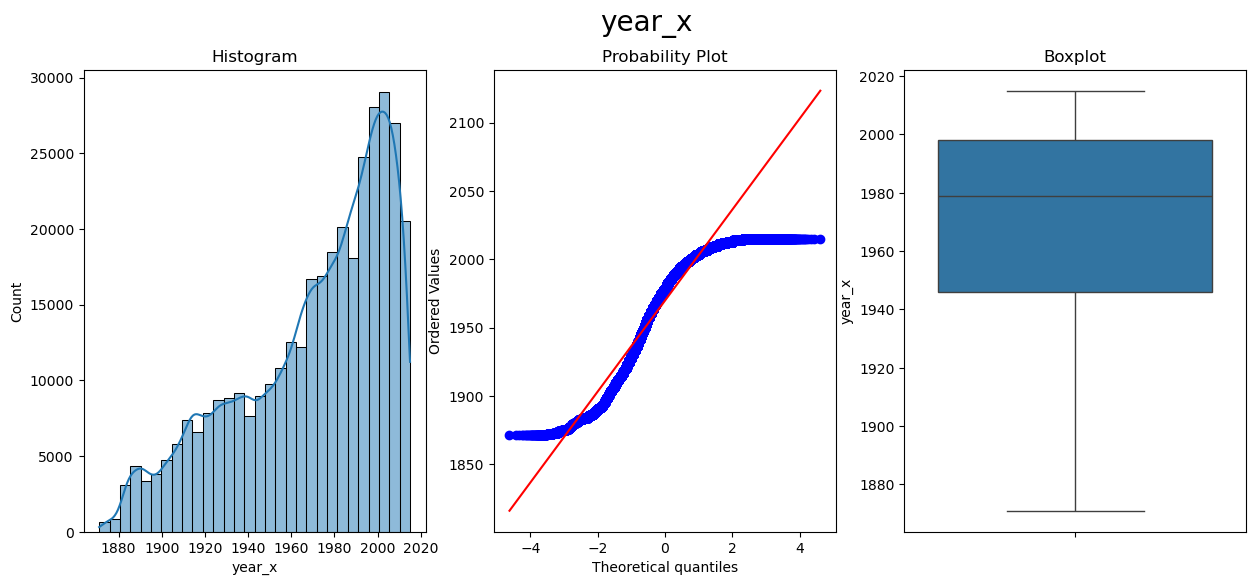

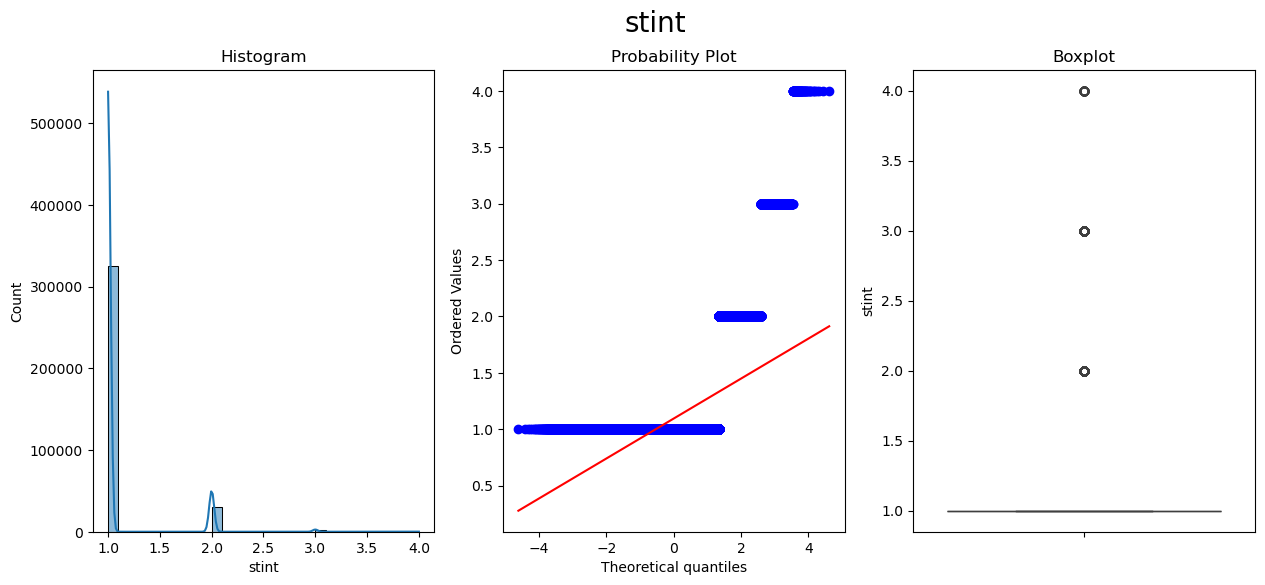

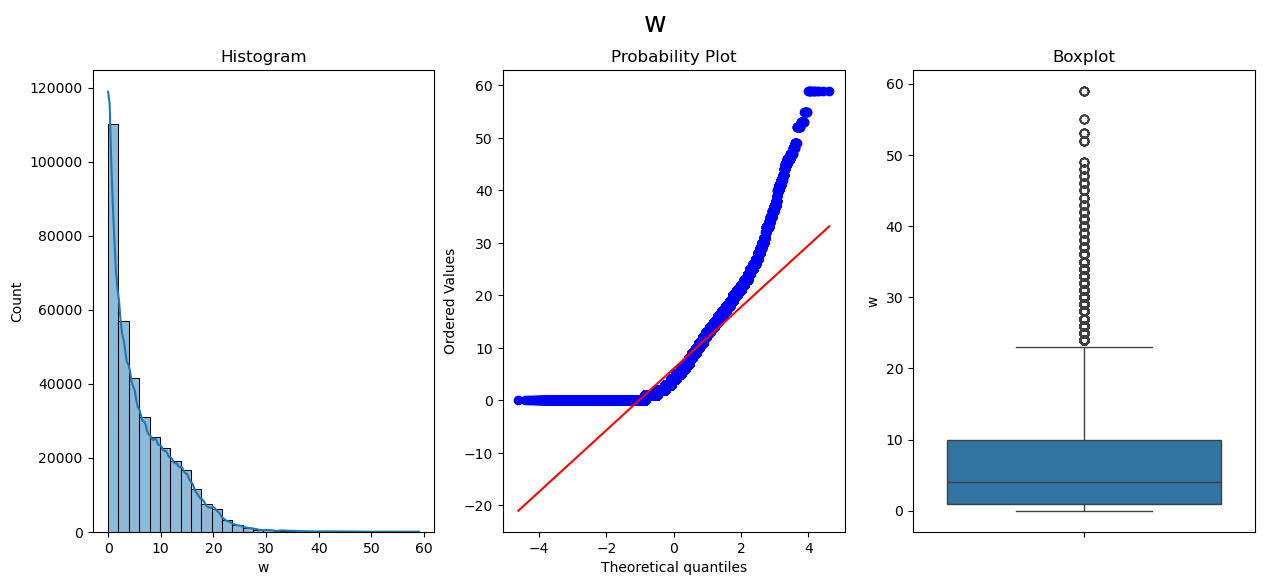

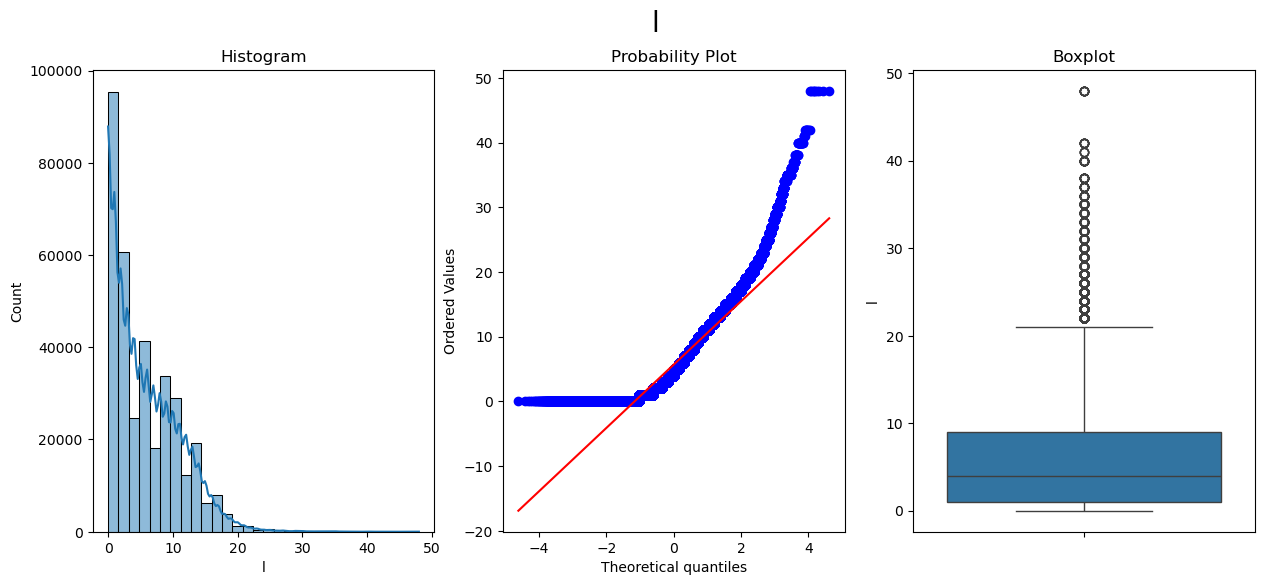

In [75]:
for var in range(0, 9):
    diagnostic_plots(X_train1, num_cols[var])

Most of the numerical variables in the dataset are extremely skewed and contain many outliers as seen in the above set of boxplots. Outliers need to be removed so the data will not be inherently skewed in any direction, which will affect the model's predictions. Therefore, we need to perform outlier trimming on all the numerical columns. To do this we will be performing a form of outlier handling known as capping. Capping works by replacing extreme values by the mean and standard deviation or the inter-quartile range proximity rule. We will be performing the latter today. 

In [76]:
windsorizer1 = Winsorizer(capping_method='gaussian', # choose iqr for skewed or gaussian for normal
                          tail='both', # cap left, right or both tails 
                          fold=3,
                          variables=list(X_train1[num_cols].columns))

windsorizer1.fit(X_train1[num_cols])
X_train1[num_cols] = windsorizer.transform(X_train1[num_cols])
X_test1[num_cols] = windsorizer.transform(X_test1[num_cols])

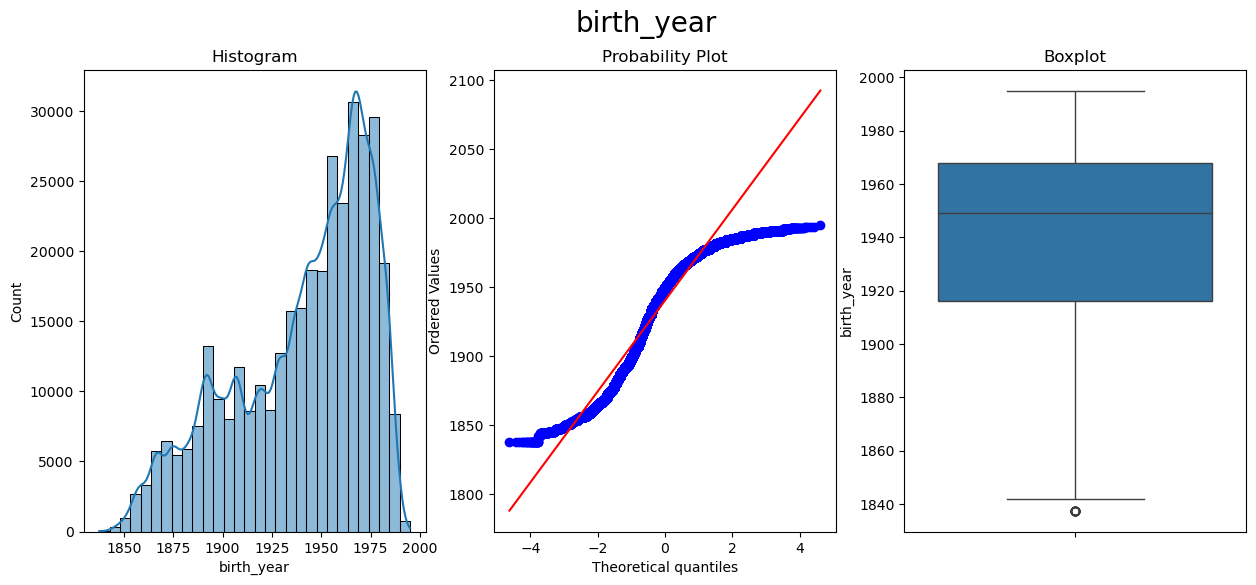

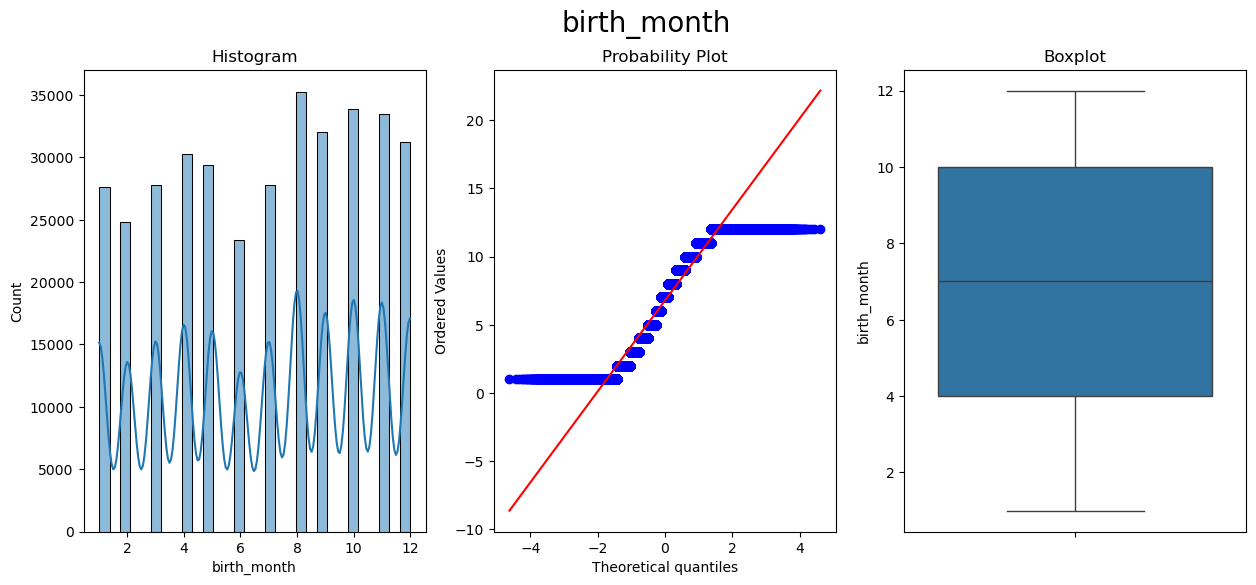

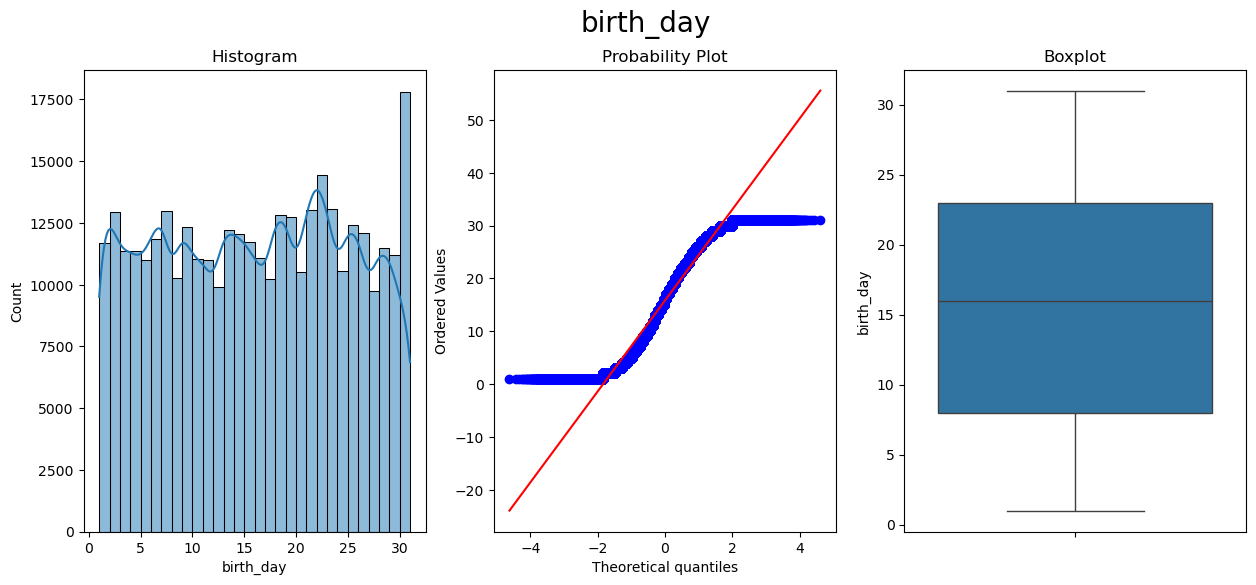

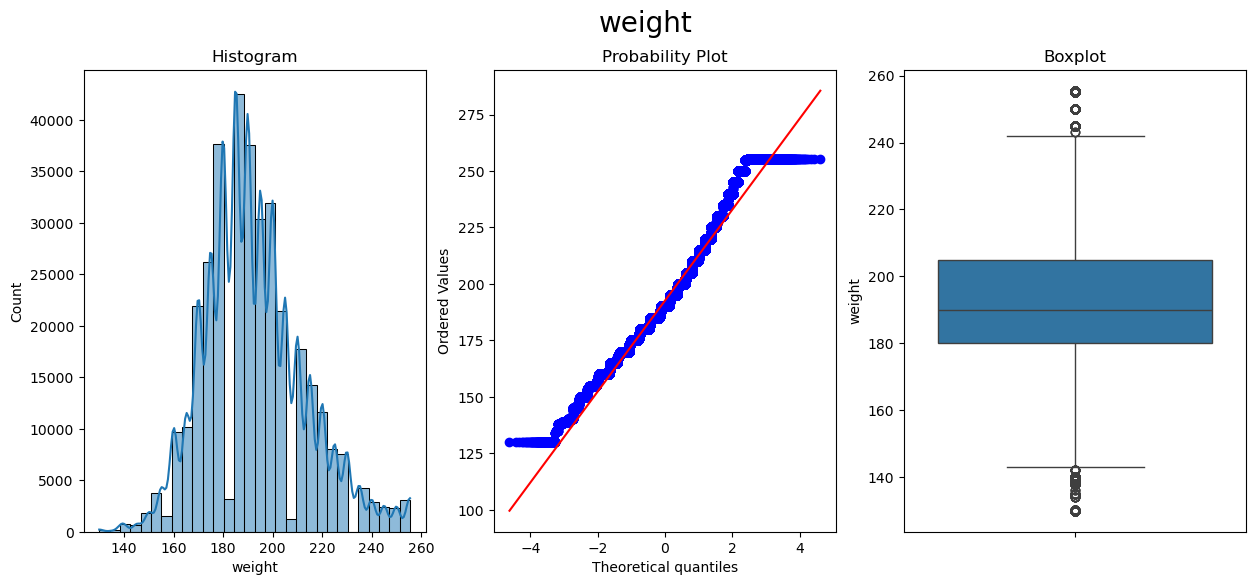

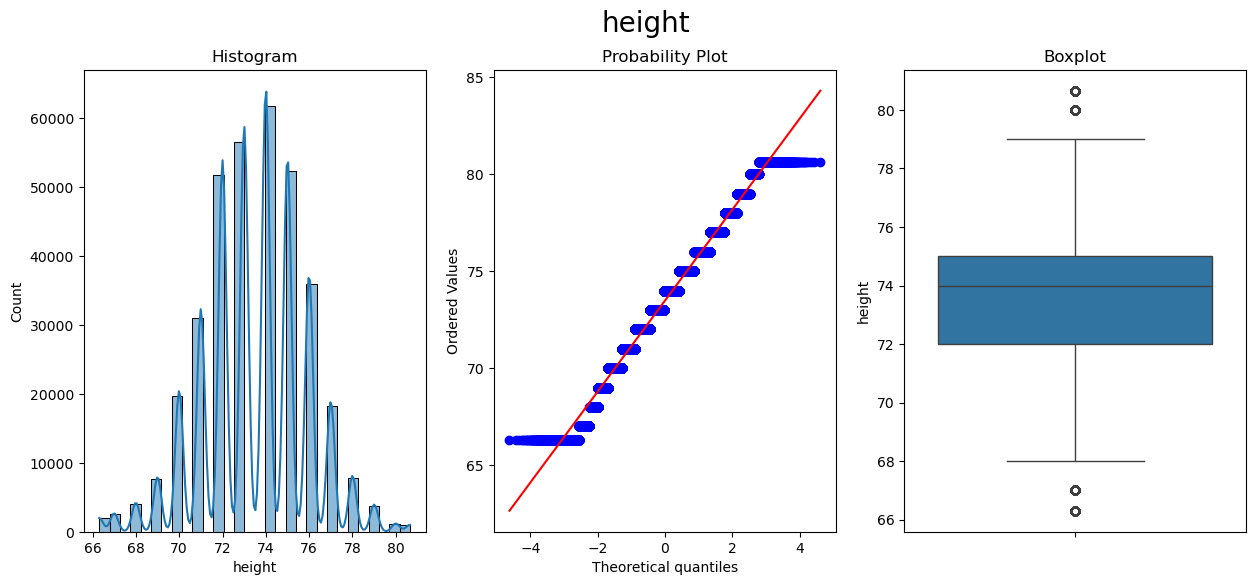

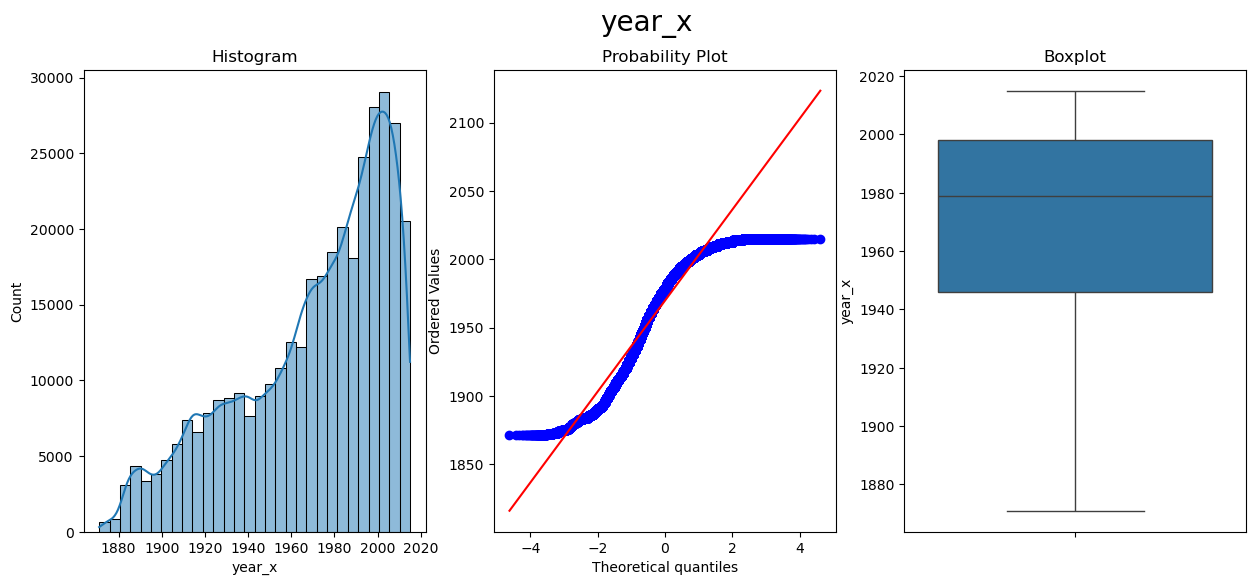

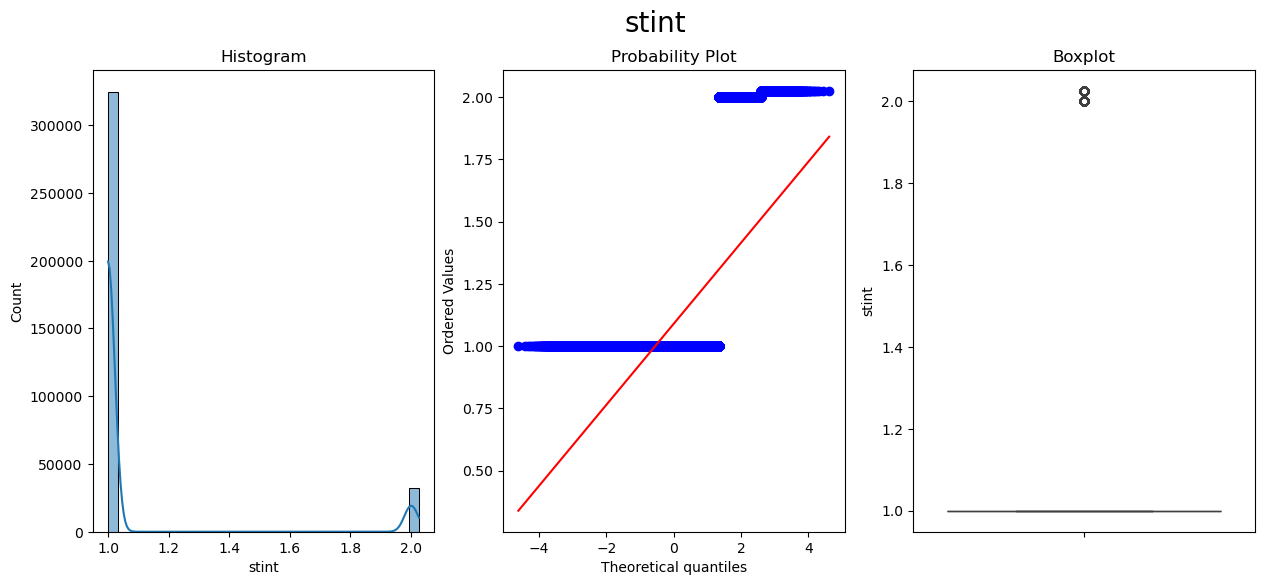

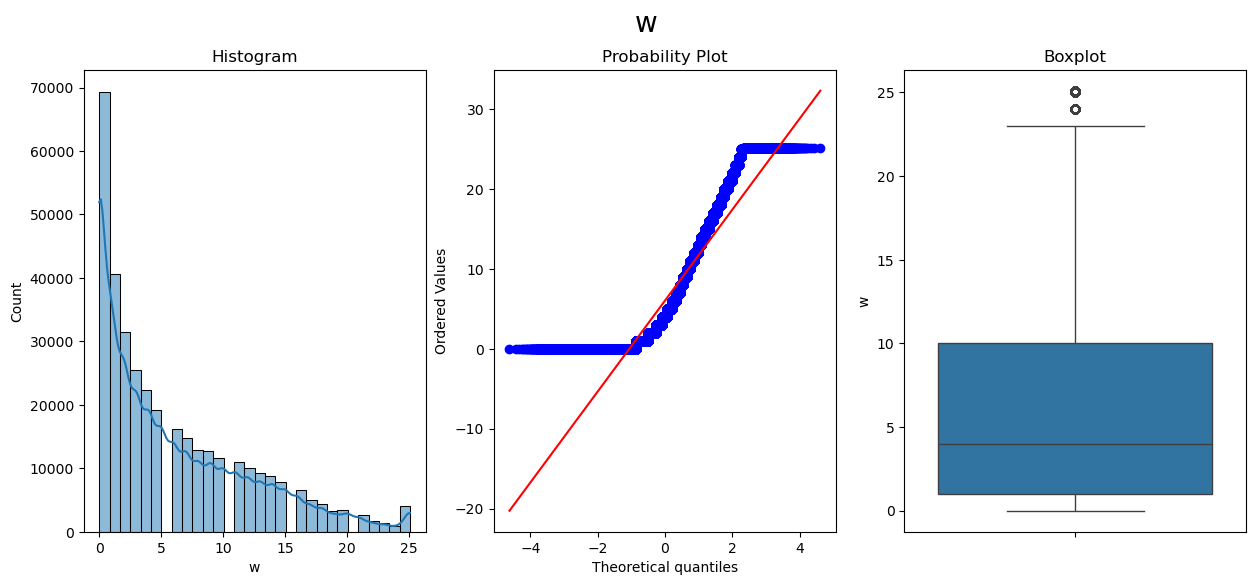

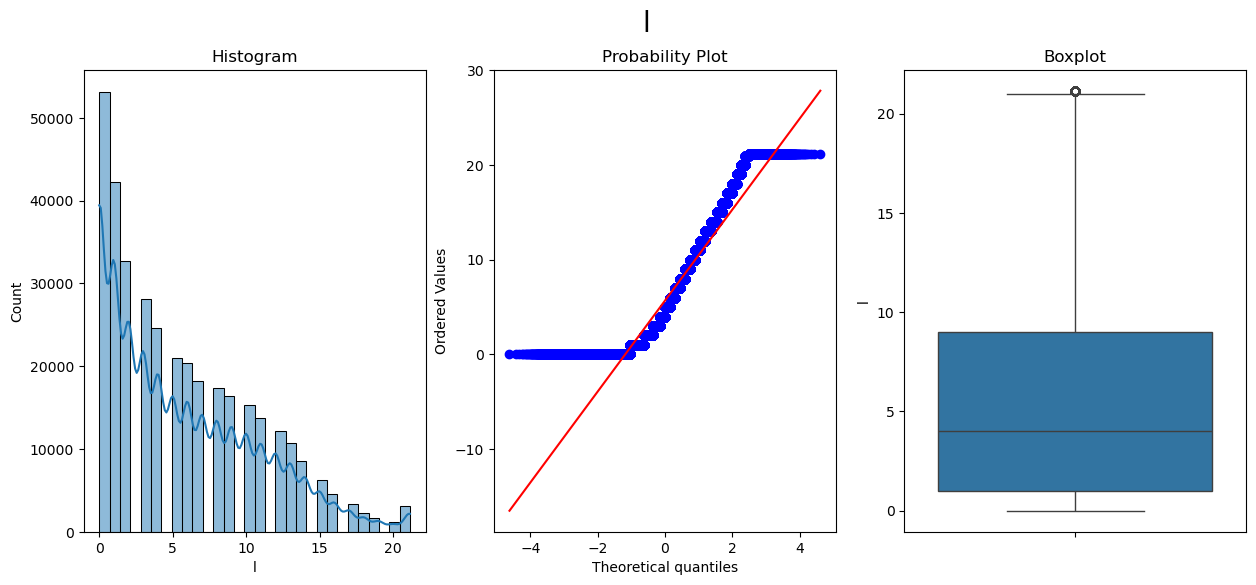

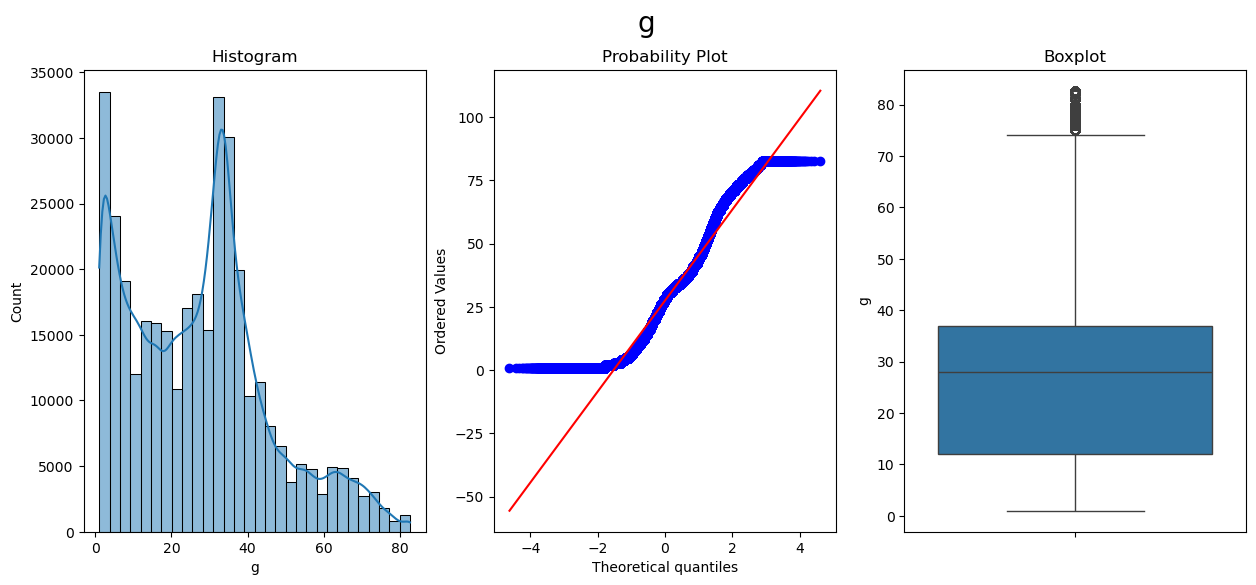

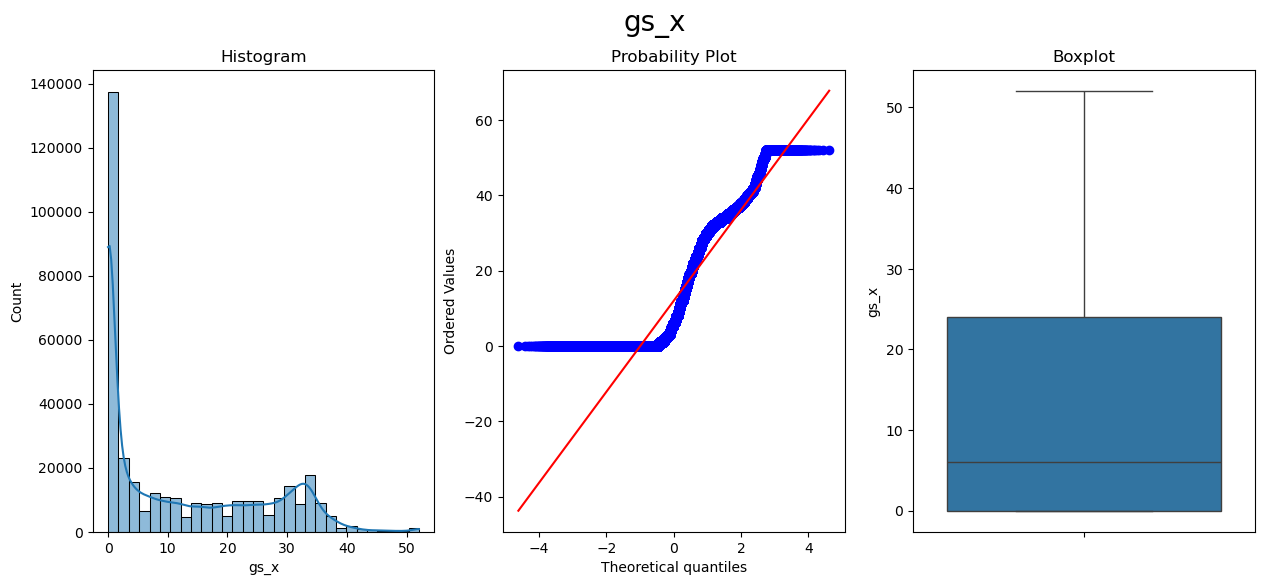

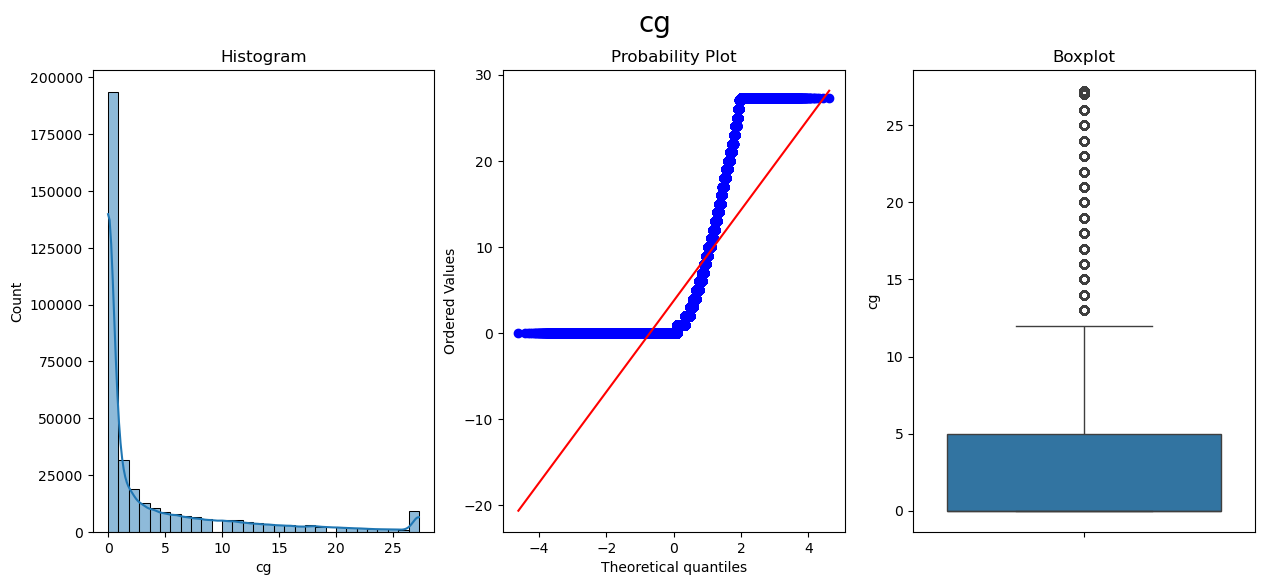

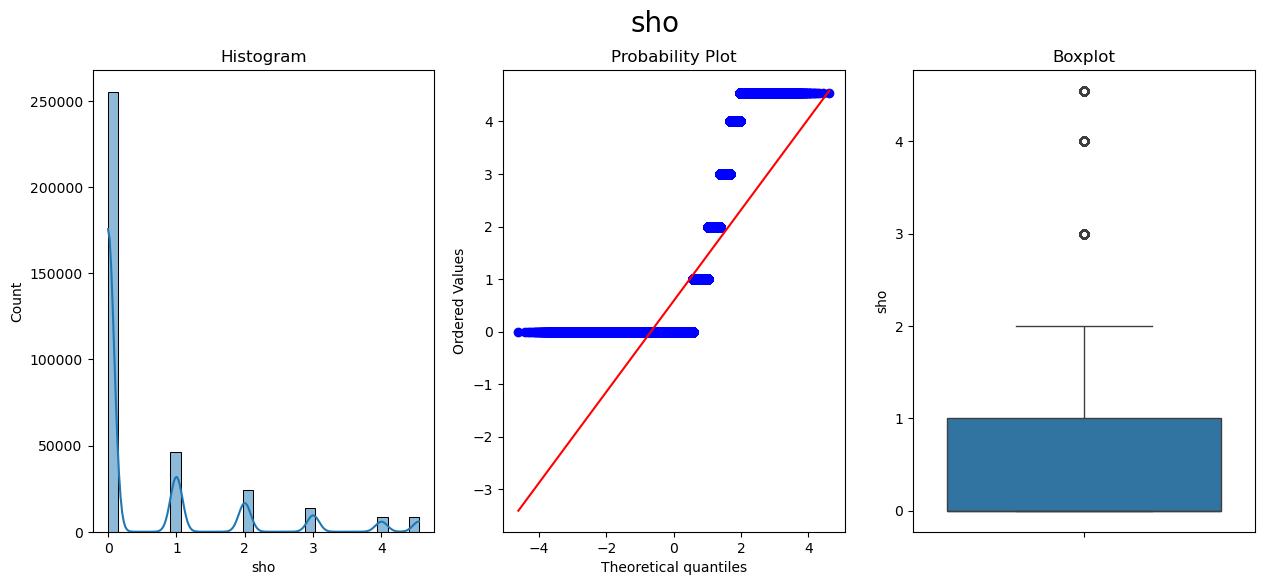

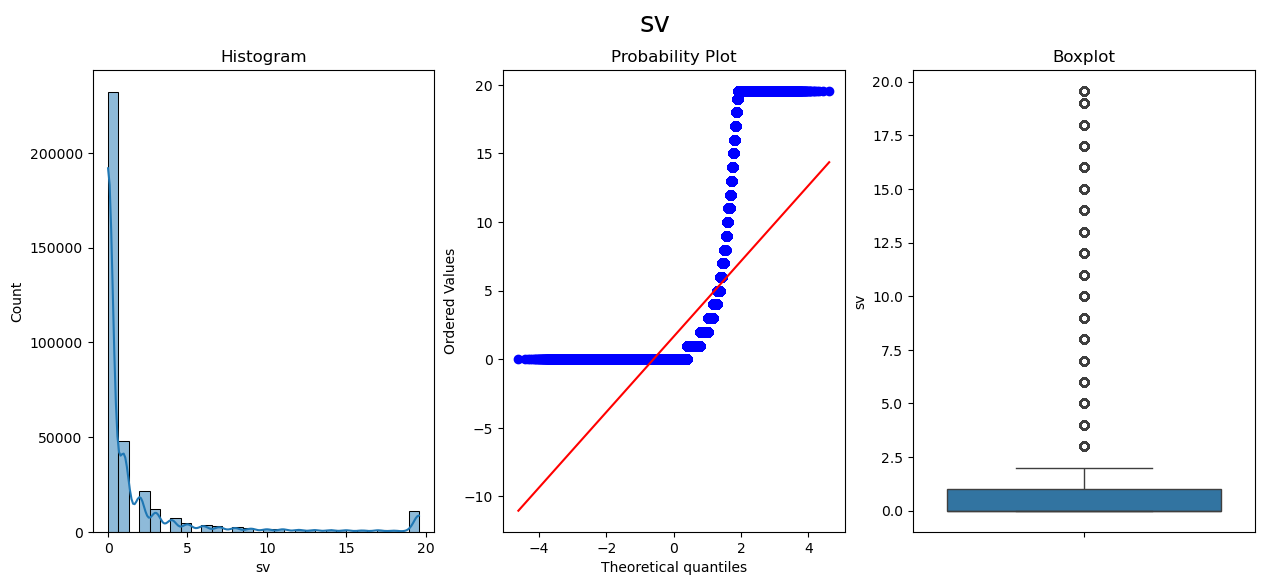

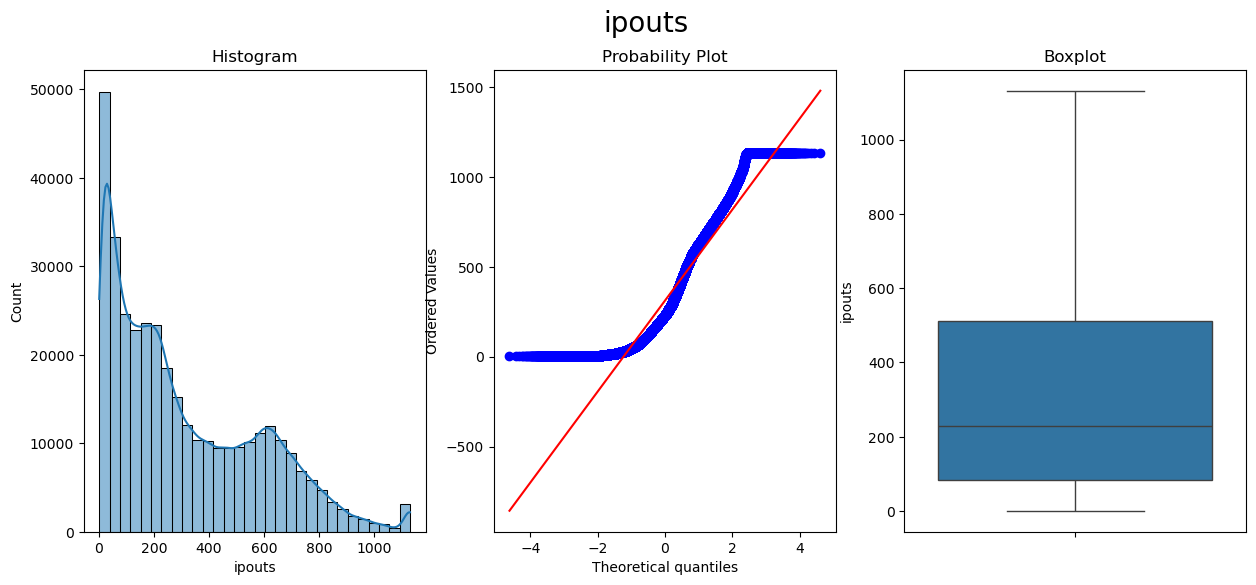

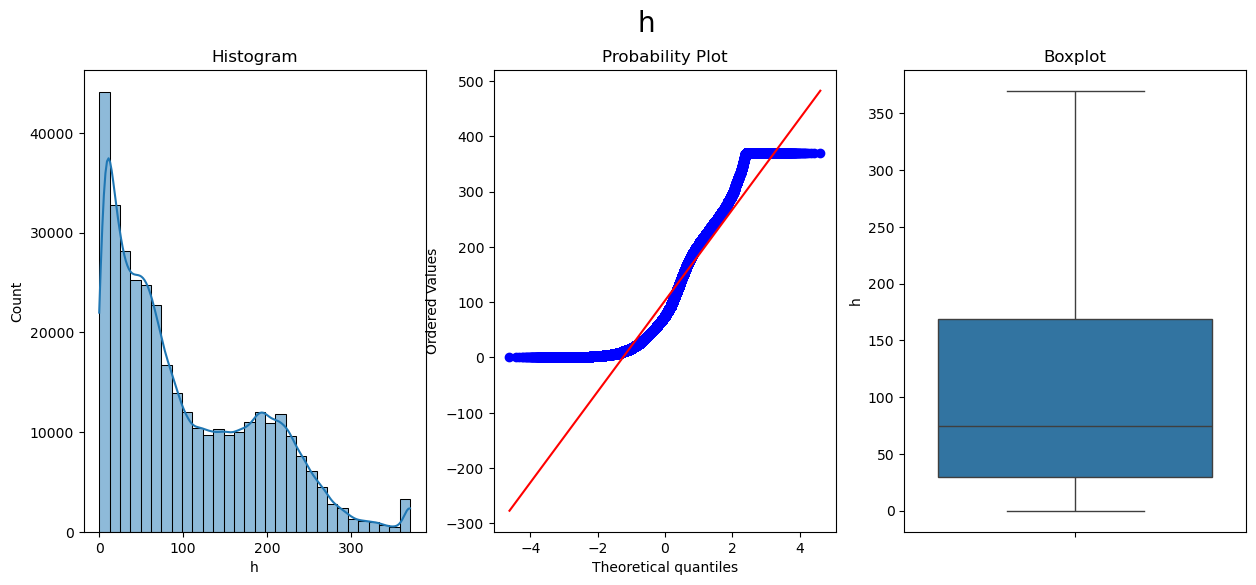

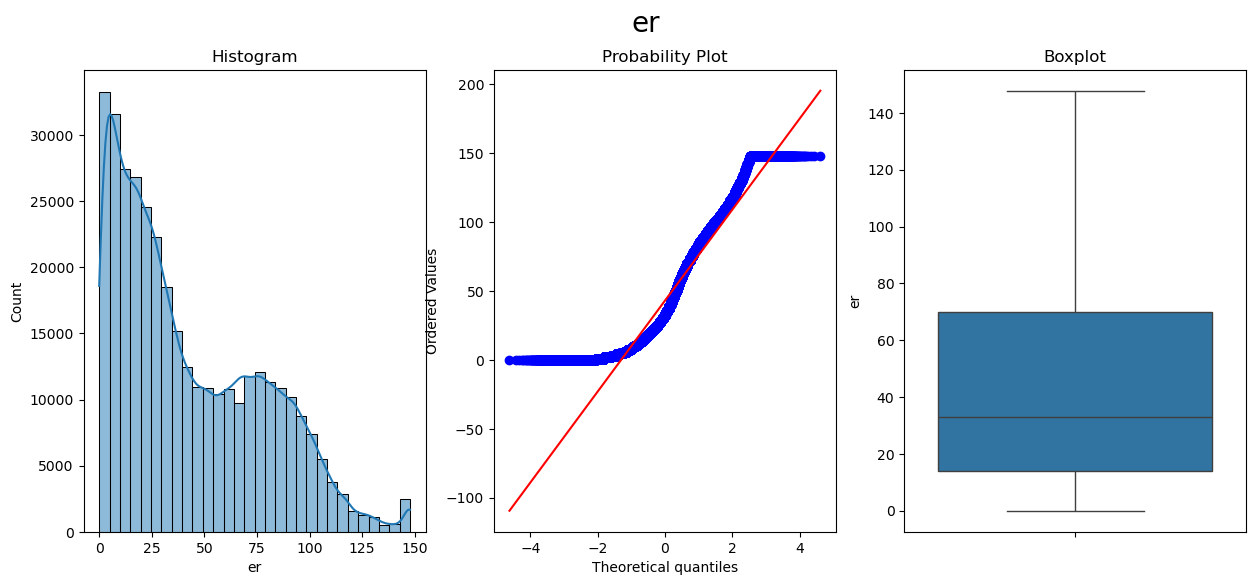

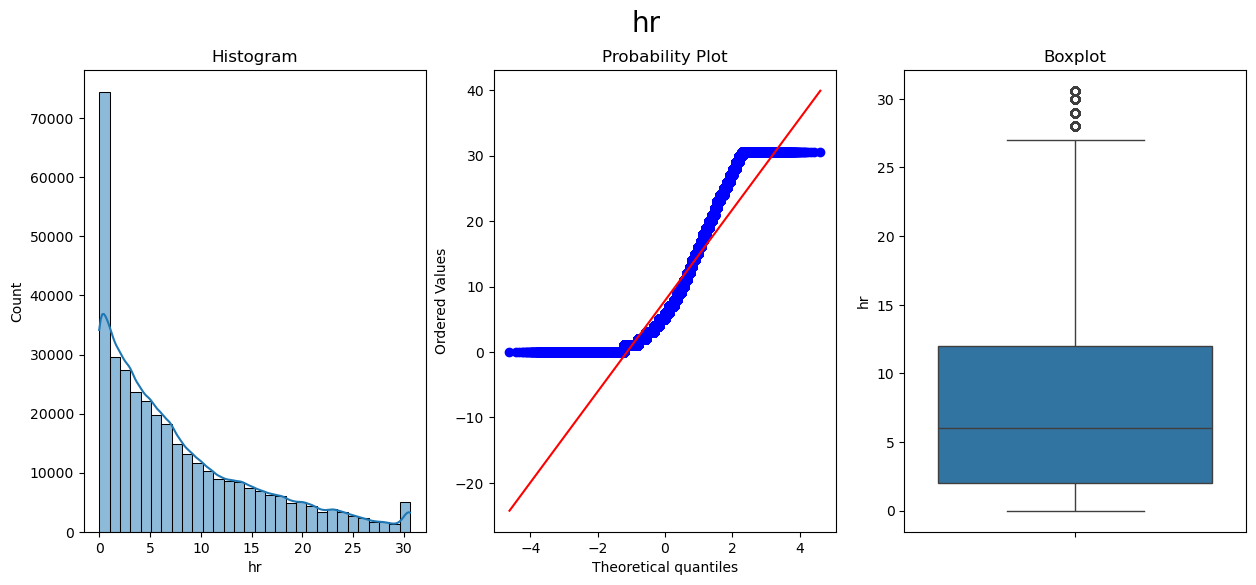

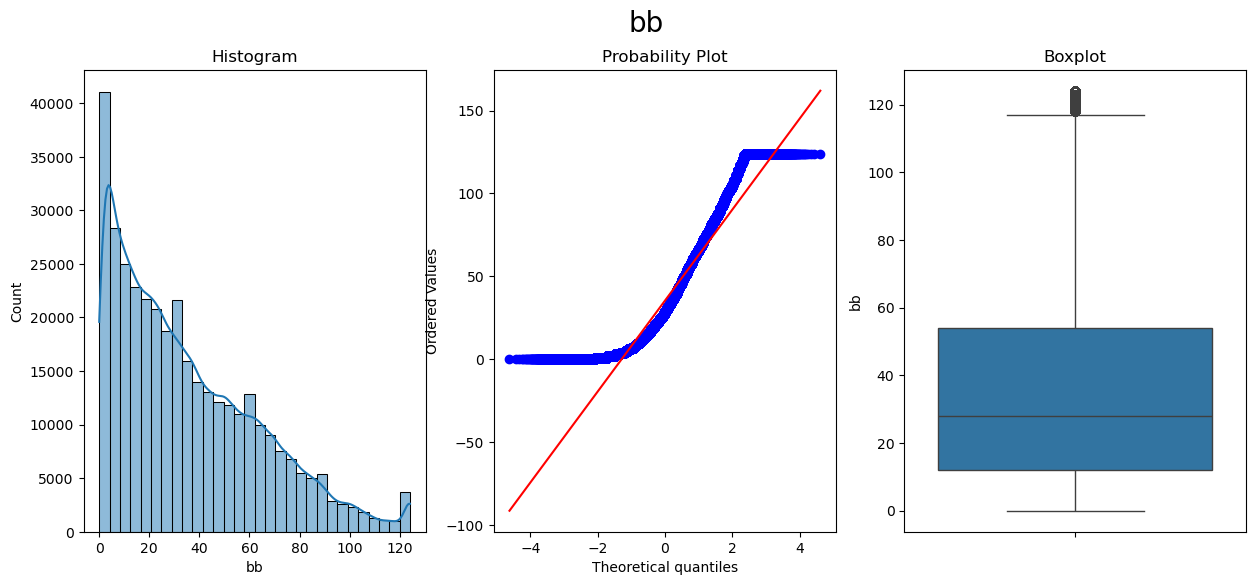

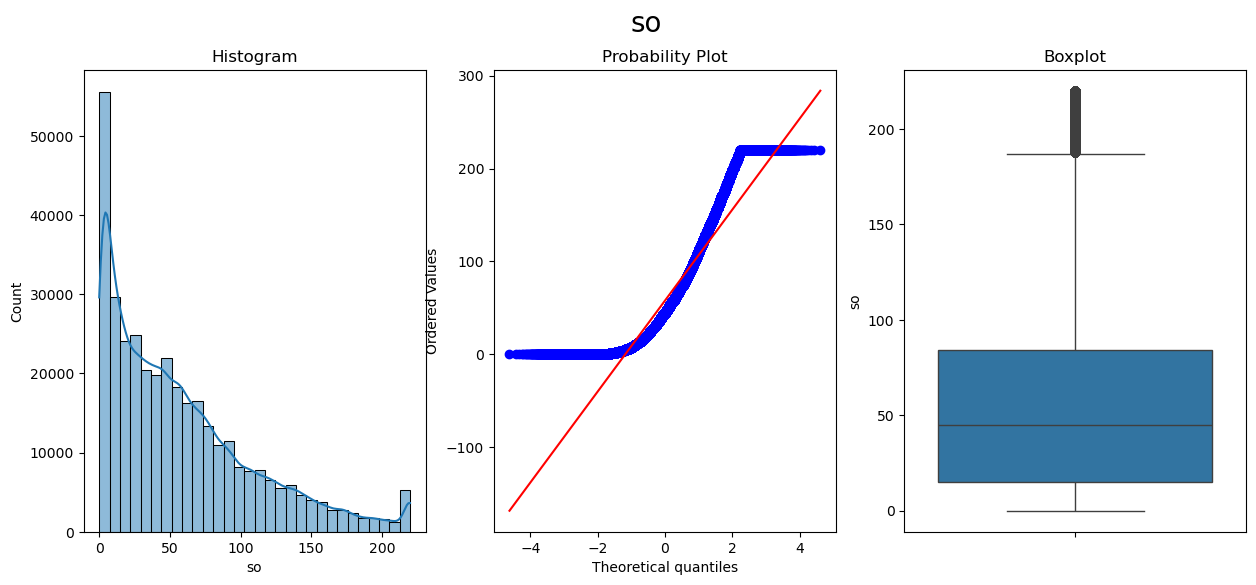

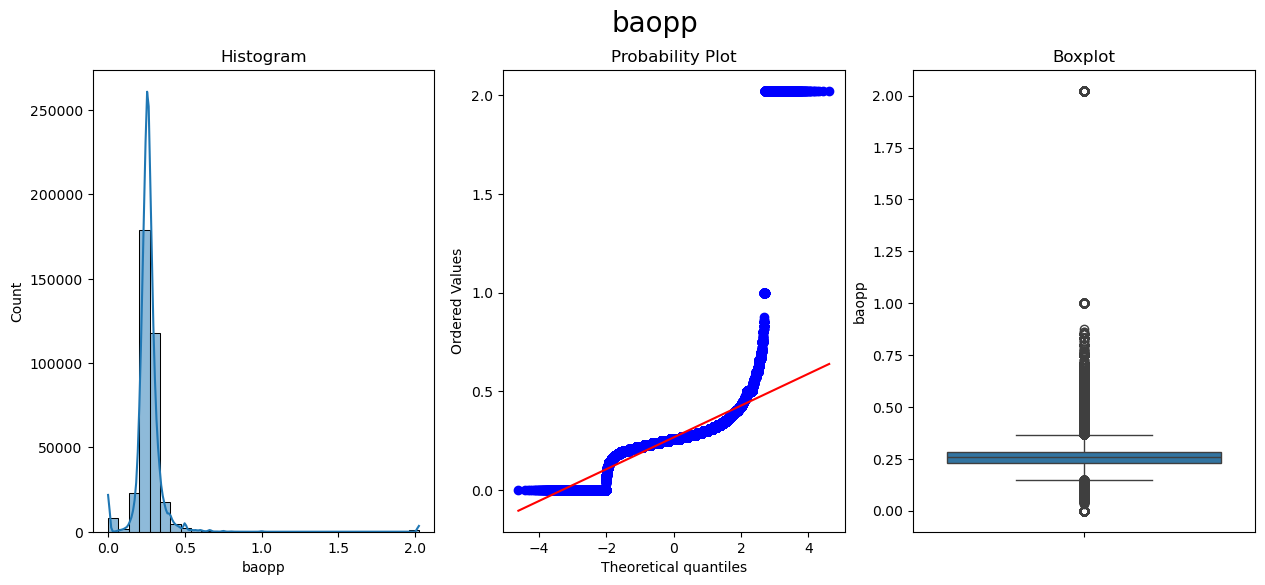

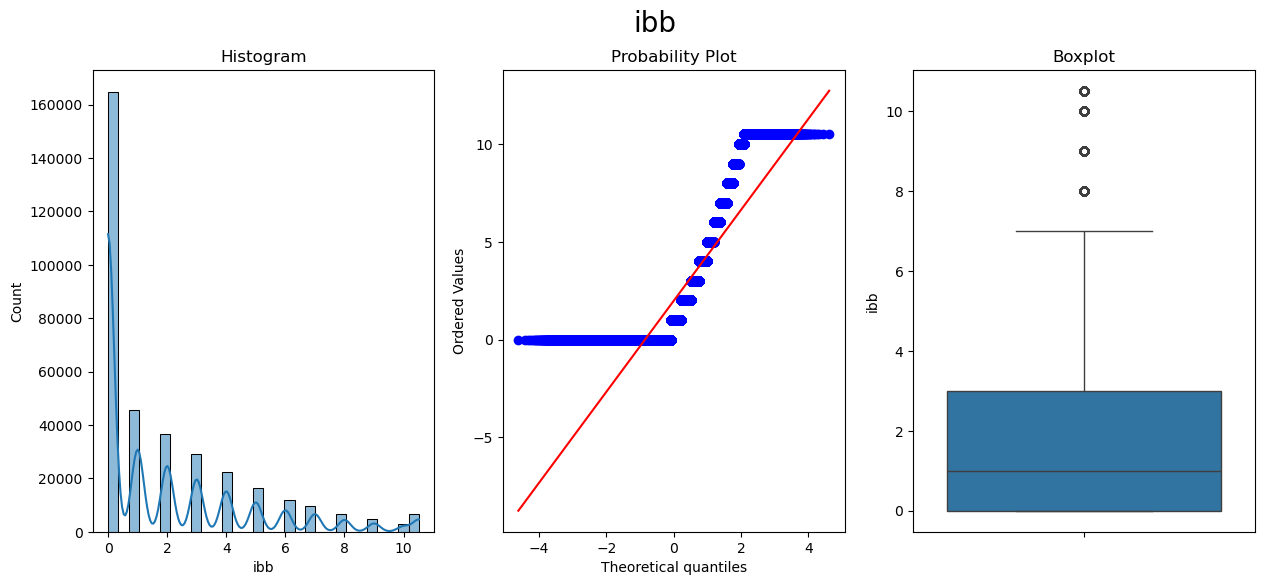

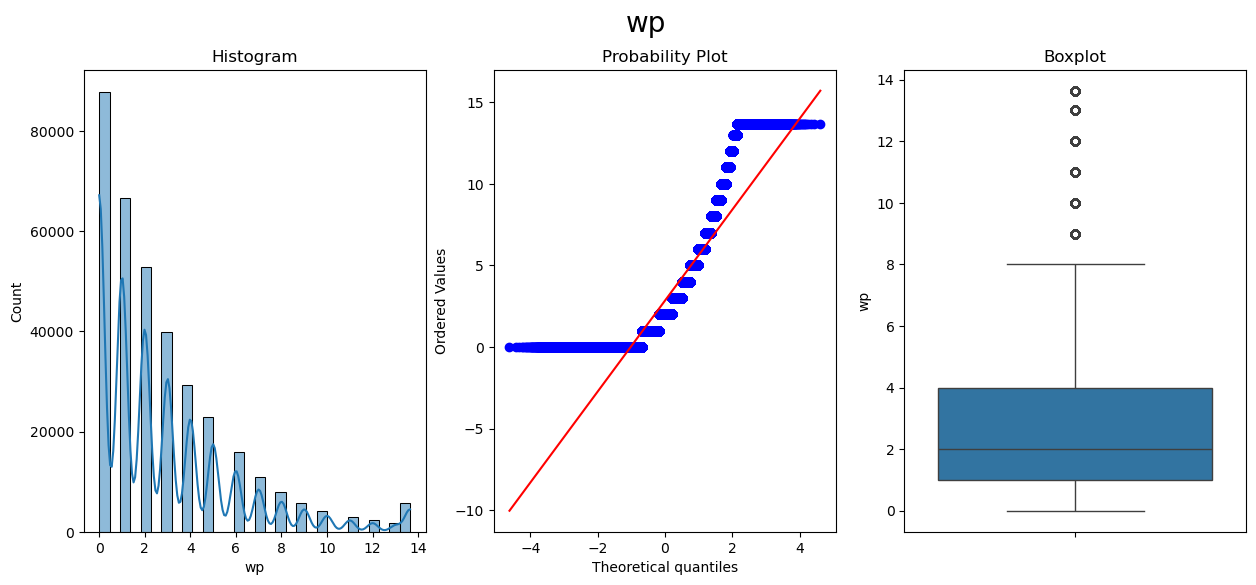

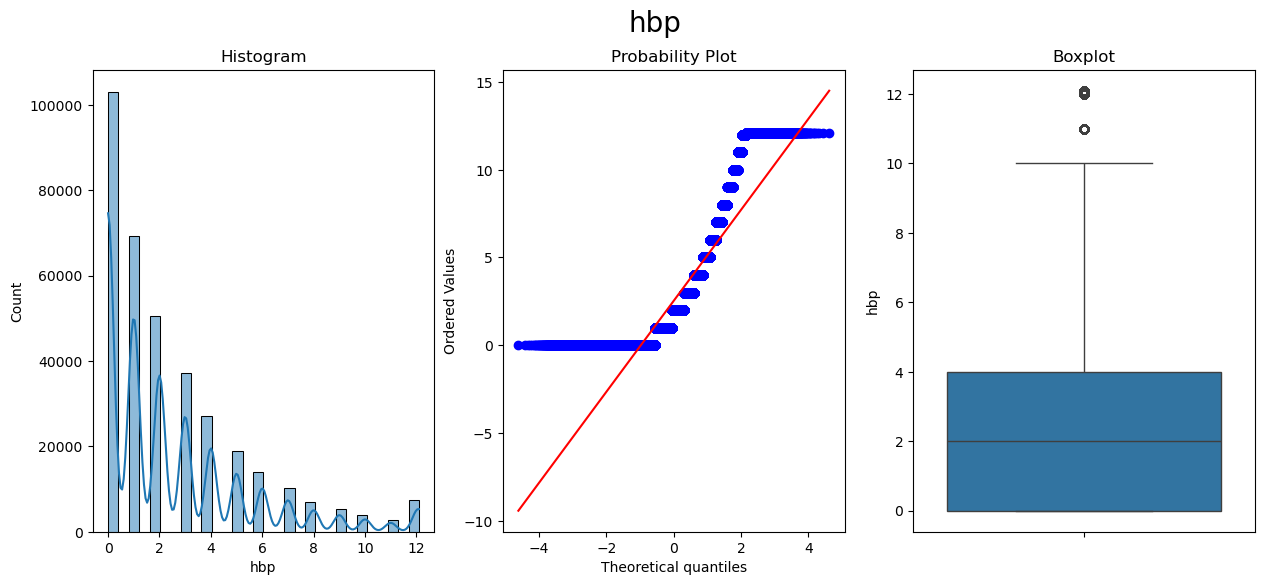

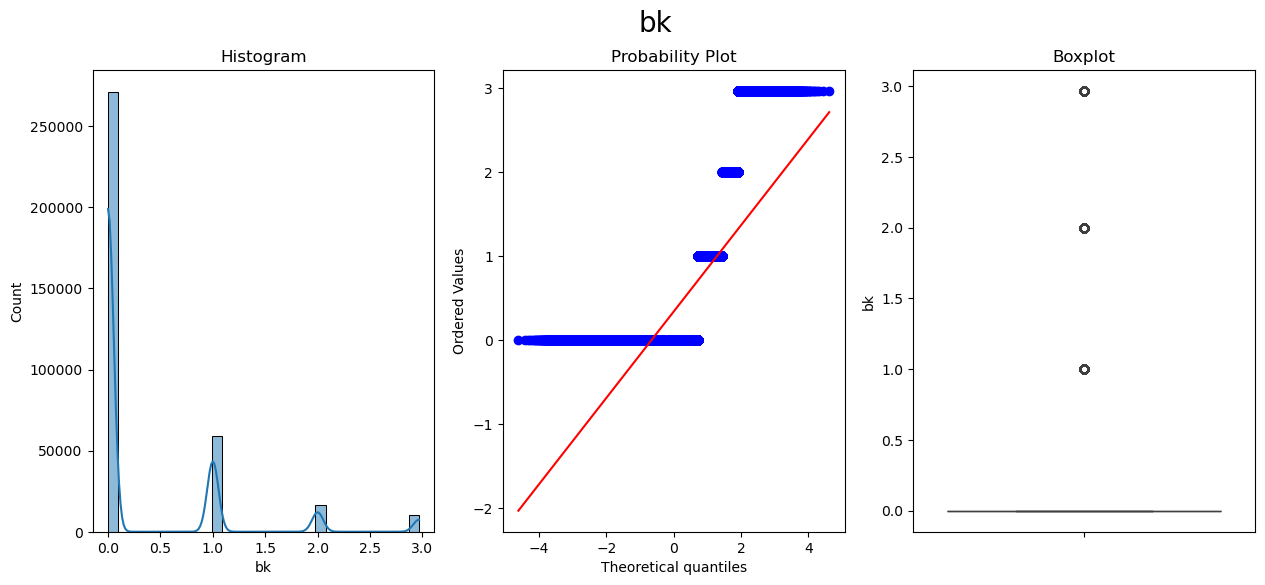

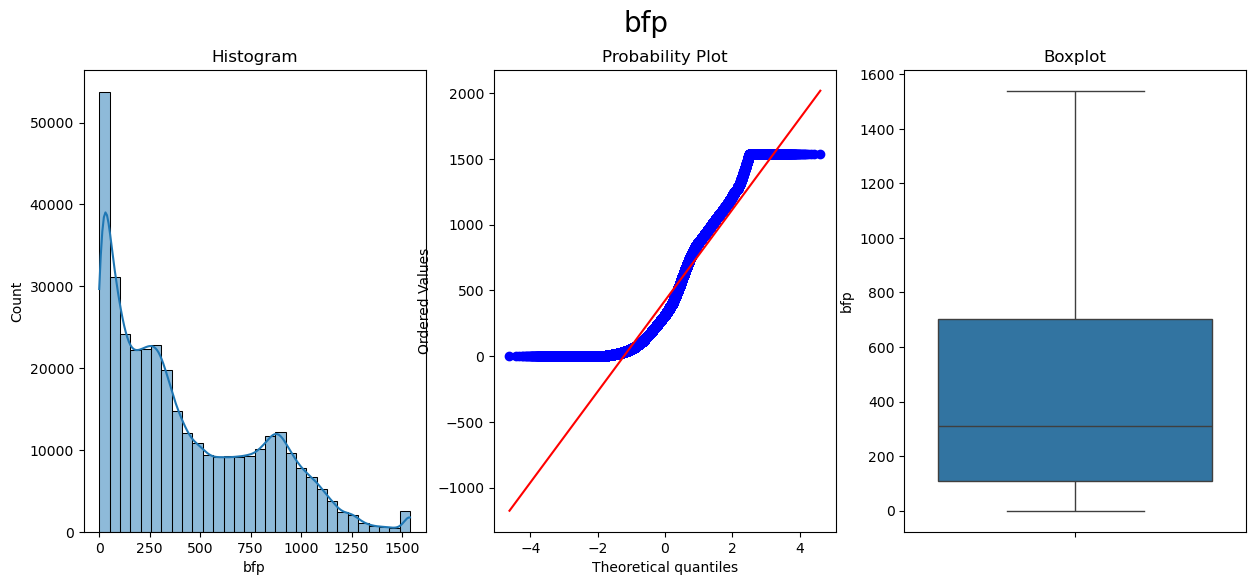

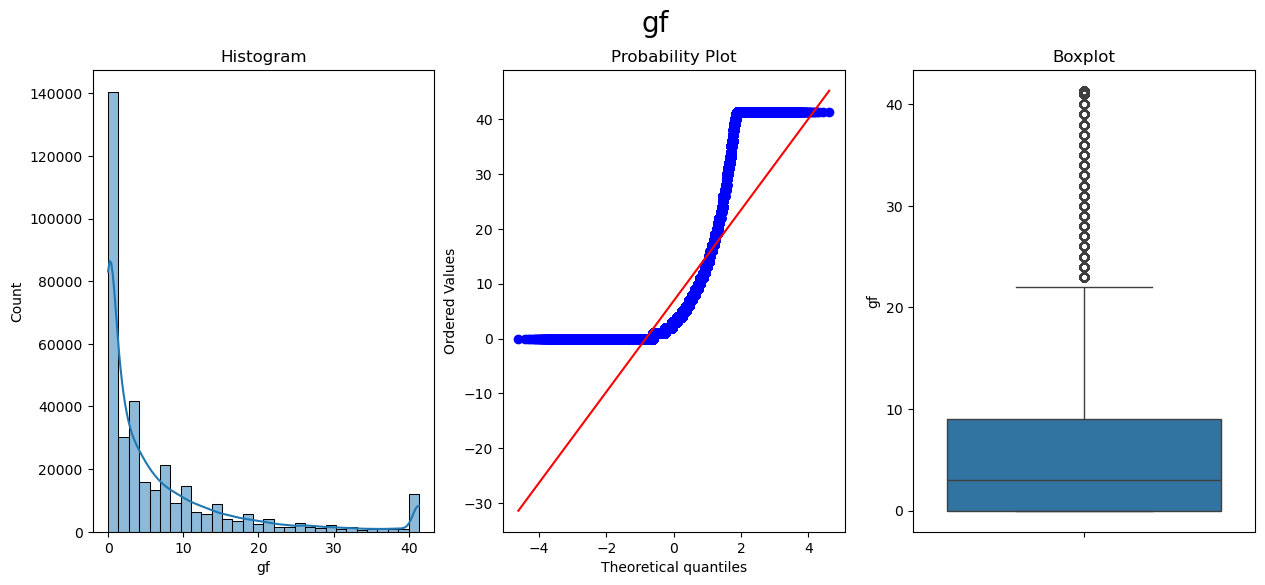

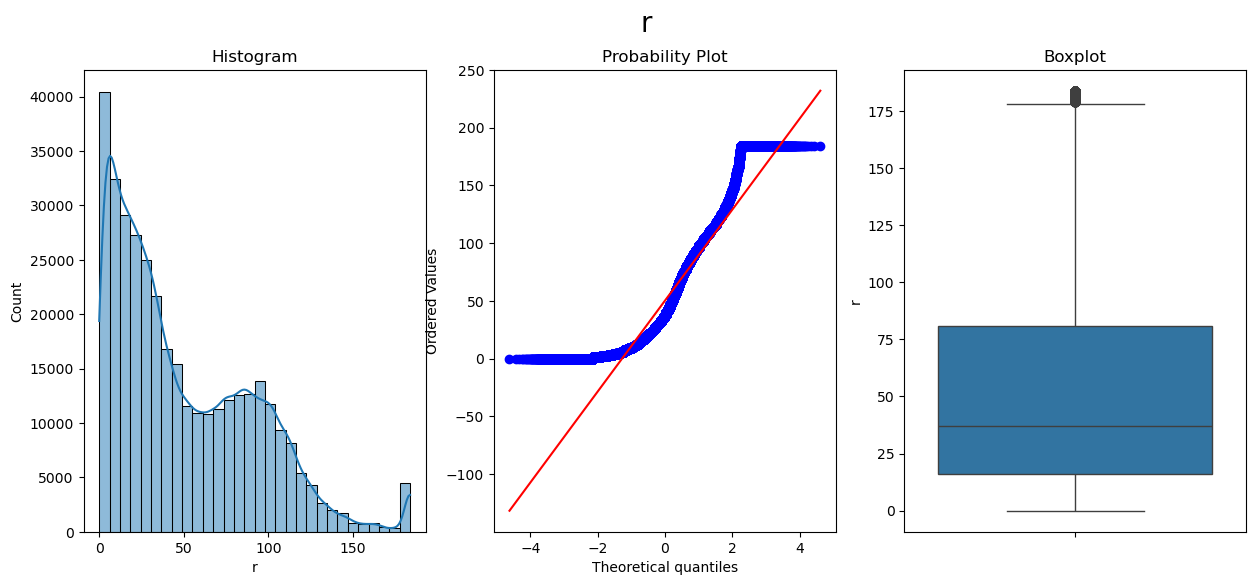

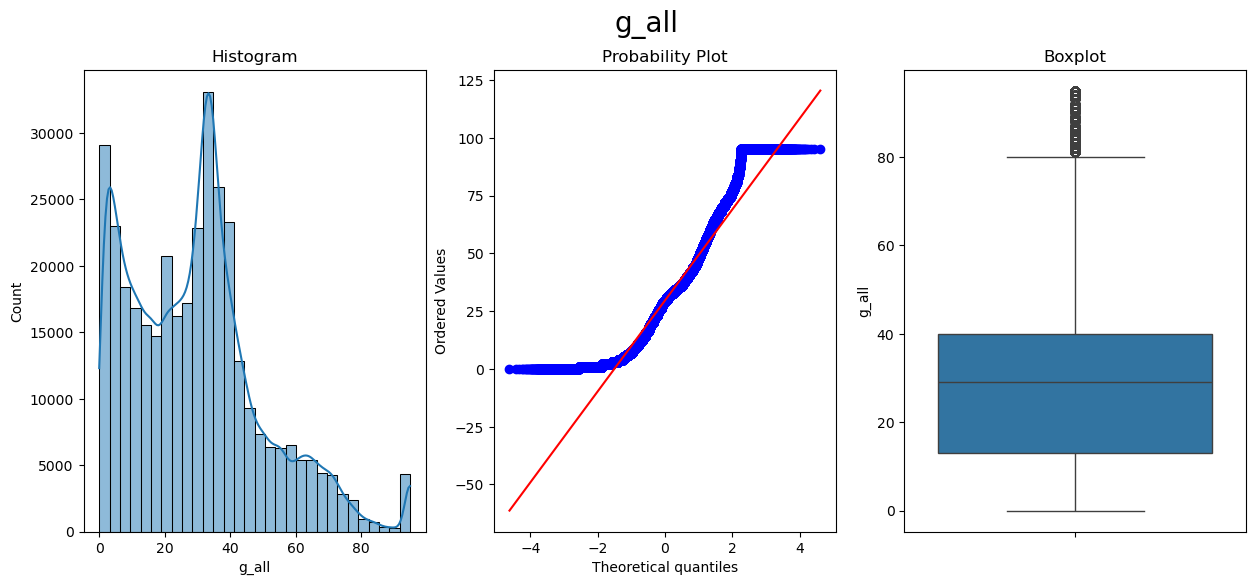

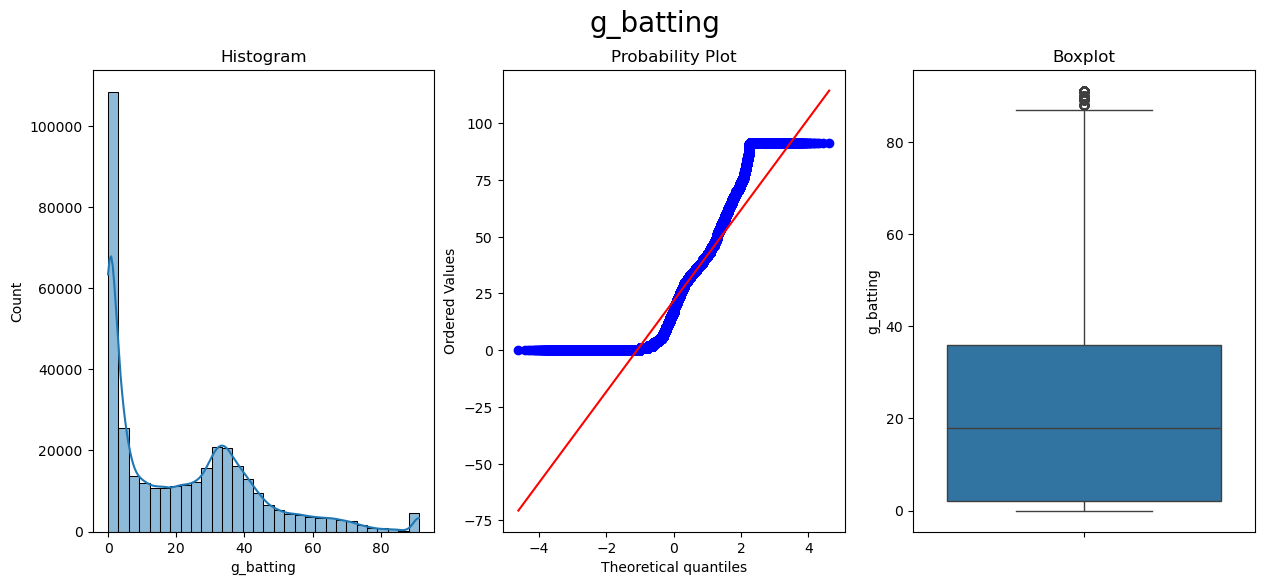

In [77]:
for var in X_train1[num_cols]:
    diagnostic_plots(X_train1, var)

As seen in the before and after, the second set of boxplots evidently had more outliers removed. The the outlier removal was a success.

### 4.2 Numerical Data Transformation

This section will go over the transformations done to numerical data.

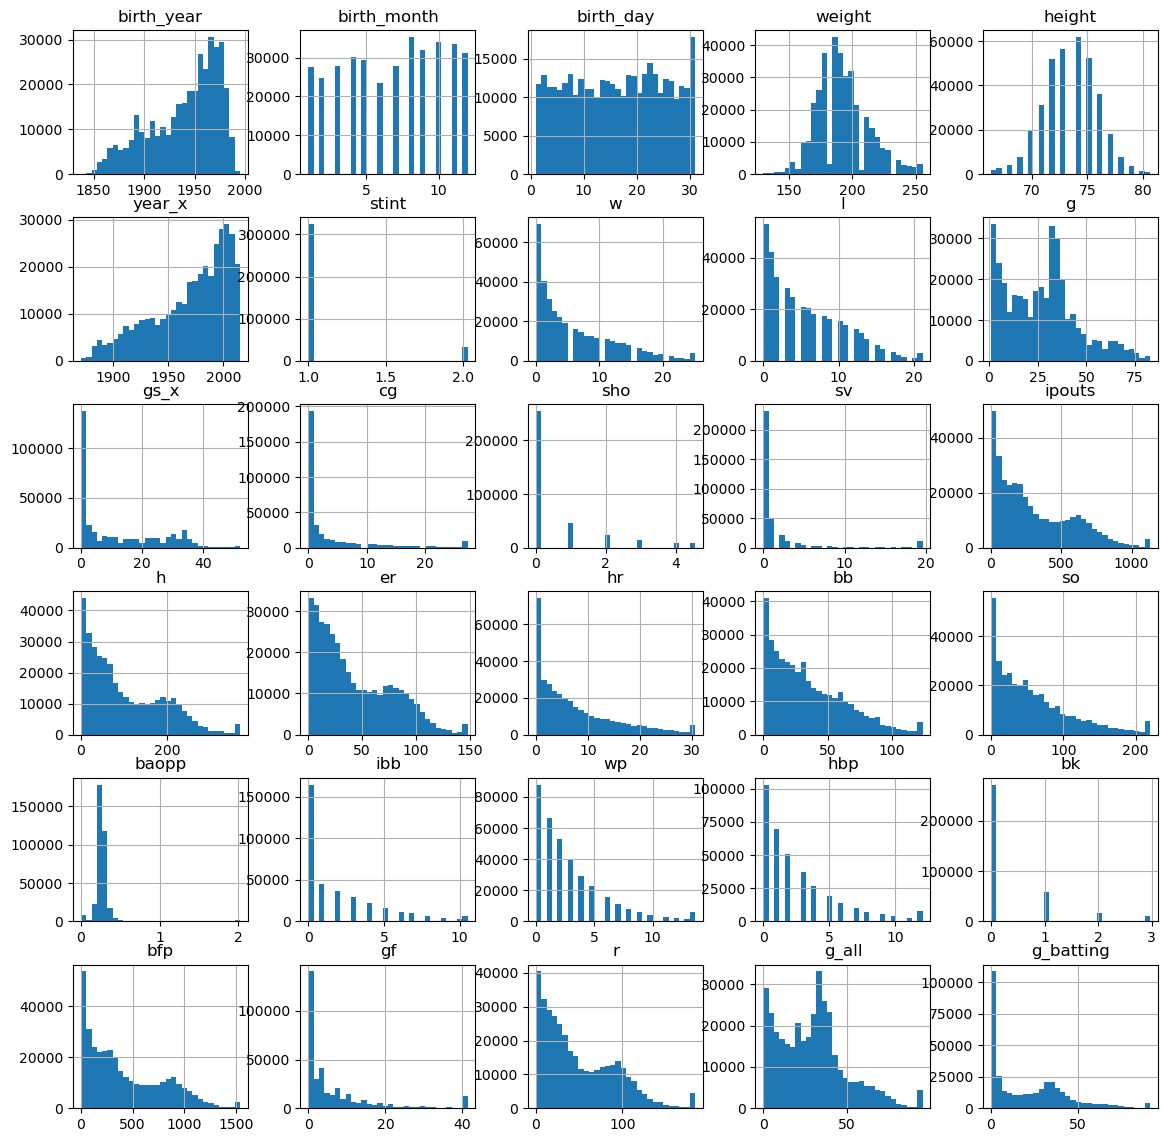

In [78]:
X_train1[num_cols].hist(bins=30, figsize=(14,14))
plt.show()

As seen in the chart above, there is still skew in most of the numerical variables. In order to to attempt to counteract this, I will transform the numeric variables using the Yeo-Johnson Transformer. This will reduce skew for most variables.

In [79]:
skewed = ['w','l','g','h','er','hr','bb','so','baopp','ibb','wp','hbp','bk','bfp','gf','r','g_all','g_batting']
yjt1 = YeoJohnsonTransformer(variables = skewed)

yjt1.fit(X_train1)

X_train1 = yjt.transform(X_train1)
X_test1 = yjt.transform(X_test1)

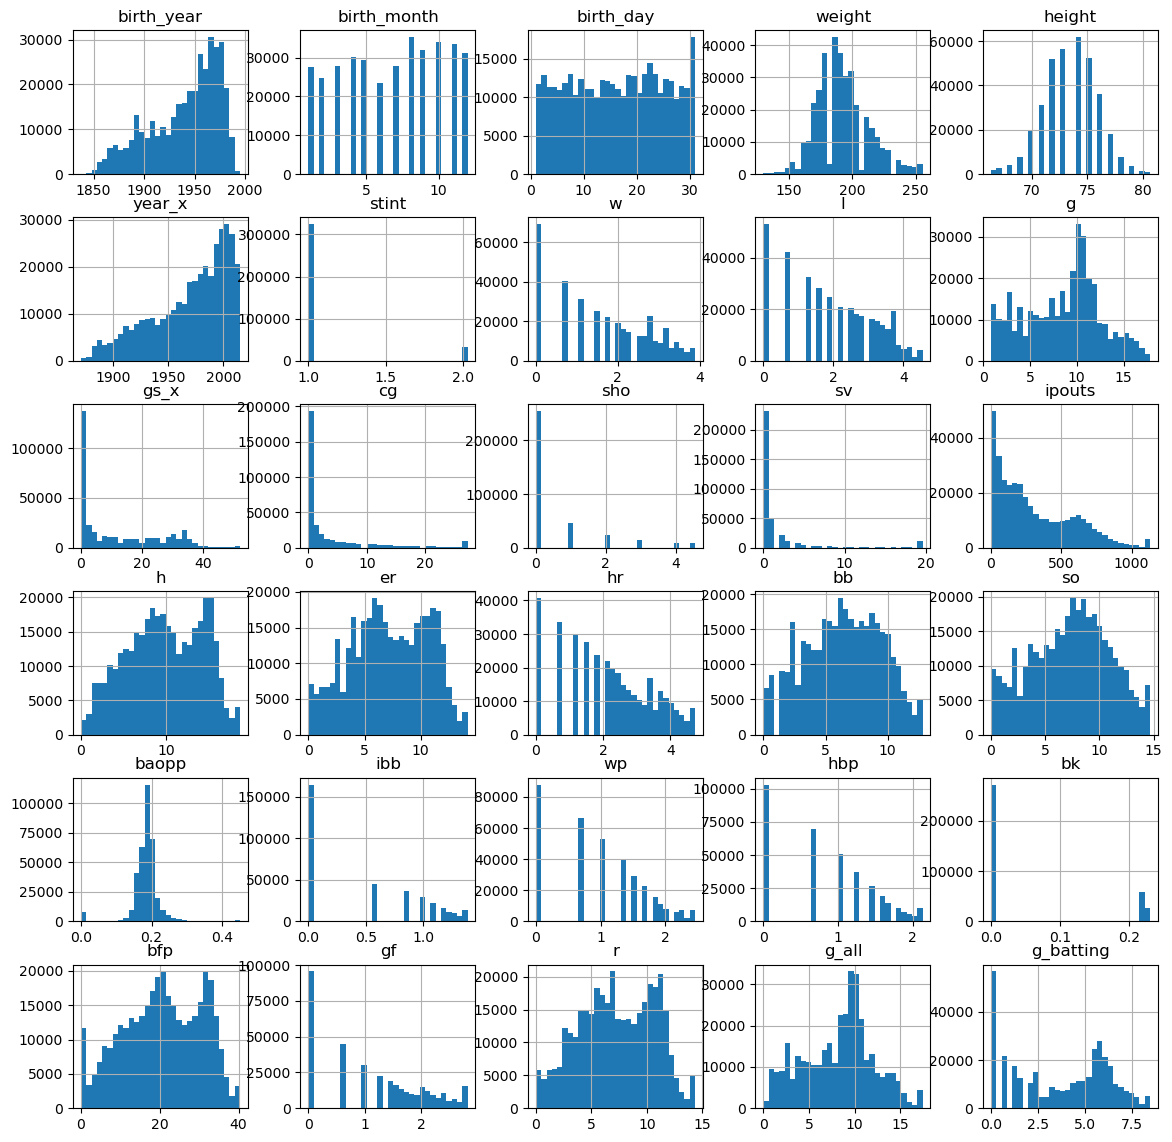

In [80]:
X_train1[num_cols].hist(bins=30, figsize=(14,14))
plt.show()

As seen in the chart above, this transformation has managed to reduce skew in the numerical columns of the dataset. This means that the transformation has worked.

In [81]:
disc = EqualFrequencyDiscretiser(q=10, variables = ['bb', 'so'], return_object=True)

disc.fit(X_train1)

EqualFrequencyDiscretiser(return_object=True, variables=['bb', 'so'])

Discretization, or binning, is the process of transforming continuous variables into discrete variables by creating a set of contiguous intervals, also called bins, that span the range of the variable values. Discretization is used to change the distribution of skewed variables and to minimize the influence of outliers, and hence improve the performance of our linear regression model. Using discretization, outlier are placed into the higher of lower intervals, maing them unable to be differentiated from the rest of the data. This massively increases the models performance. Discretized data is also easier to interpret and analyze, as it transforms continuous variables into a finite number of categories, making it simpler to understand. 

We will be using equal-frequency discretization. Equal-frequency discretization divides the values of the variable into intervals that carry the same amount of observations. This is useful for skewed data, and it allows the user to sort the data into any number of groups. As seen above, I chose 'bb' and 'so' to be discretized as they are continous variables. 

In [82]:
X_train1 = disc.transform(X_train1)
X_test1 = disc.transform(X_test1)

We then transform the data using the discretiser.

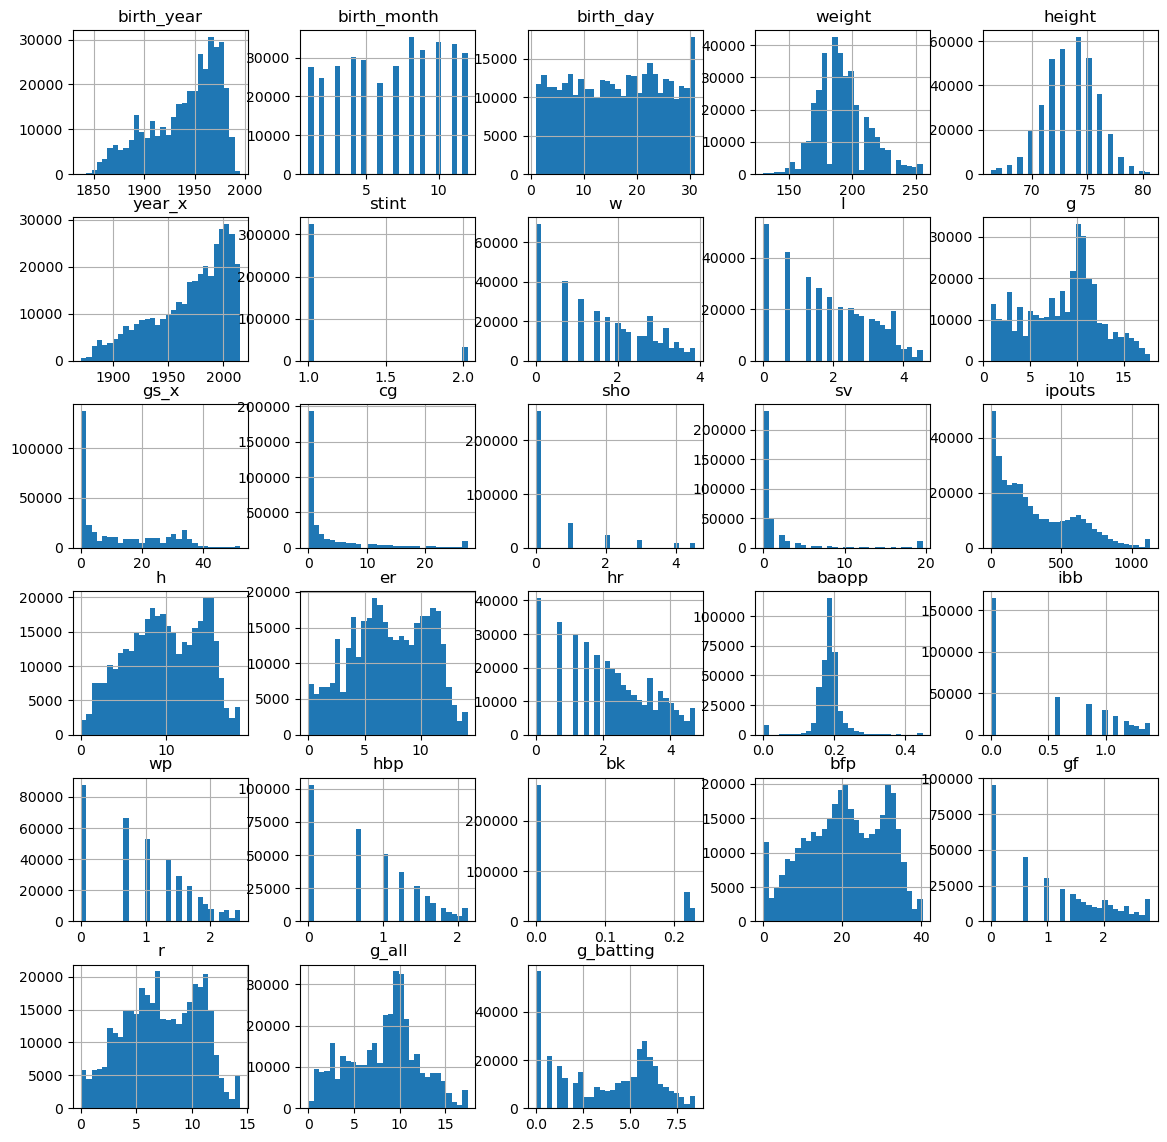

In [83]:
X_train1[num_cols].hist(bins=30, figsize=(14,14))
plt.show()

### 4.3 Categorical Data Transformation

This section will go over the transformations done to categorical data.

The values of categorical variables are often encoded as strings. Scikit-learn, which is the python library will be using to create the linear regression model, does not support strings as values, therefore, we need to transform those strings into numbers. The act of replacing strings with numbers is called categorical data encoding. I will be performing categorical data encoding on the categorical values in the dataset

To perform categorical data encoding, I have chosen to use the ordinal data encoder as the cardinality of two variables a toore high tm eng one-hot encoding. Ordinal data encoding is a form of data encoding where the data is encoded using numbers from 0 to k, where k is the number of categories in the variable. The numbers are assigned using the by determining the categories performance against the the target variable, and then assigning numbers from the worst to the best. I chose this method as linear models have a hard time using the data from regular ordinal encoding where data is randomly assigned a number. In the following section, I will walk you through the processes I took to do this step.

In [84]:
cat_cols = [c for c in X_train1.columns if X_train1[c].dtypes == 'O']
ordinal_enc = OrdinalEncoder(
    encoding_method='ordered',
    variables=cat_cols)

ordinal_enc.fit(X_train1, y_train1)

OrdinalEncoder(variables=['player_id', 'birth_country', 'birth_state',
                          'birth_city', 'name_first', 'name_last', 'name_given',
                          'bats', 'throws', 'debut', 'final_game', 'team_id_x',
                          'league_id_x', 'bb', 'so'])

Firstly, we will set up the data encoder and fit it to train set and the target set.

In [85]:
X_train1 = ordinal_enc.transform(X_train1)
X_test1 = ordinal_enc.transform(X_test1)

C:\Users\tejsk\anaconda3\Lib\site-packages\feature_engine\encoding\base_encoder.py:260: UserWarning: During the encoding, NaN values were introduced in the feature(s) player_id, birth_state, birth_city, name_first, name_last, name_given, debut, final_game.
  warnings.warn(


Next, we transform the data using the ordinal encoder.

In [86]:
X_test1 = X_test1.replace({np.nan : 0}) 

When null values are slotted into X_test due to rare categories being encoded, we will simply replace these null values with 0.

In [87]:
X_train1[cat_cols].head(5)

player_id  birth_country  birth_state  birth_city  name_first  \
367950       5168             19          101        1282         747   
181223       3921             19           44        1431         770   
393449        819             19          120        1980          95   
261168       3486             19           64        1250         803   
142951       6832             19           81        1248        1120   

        name_last  name_given  bats  throws  debut  final_game  team_id_x  \
367950       3675        2693     2       0   3730        3139         53   
181223       2197        2962     1       0   2774        2373         52   
393449       2520         573     1       0    625         363         31   
261168       2148        2622     2       1   2445        2101         80   
142951       4389        5250     1       0   3371        2495         62   

        league_id_x  bb  so  
367950            1   8   8  
181223            1   4   3  
393449            0   5   6  
261168            1   3   5  
142951            1   9   9

In [88]:
X_test1[cat_cols].head(5)

player_id  birth_country  birth_state  birth_city  name_first  \
32687      8392.0             19         65.0      1820.0       554.0   
201347     2429.0             19         65.0       863.0       640.0   
118297     4840.0             19         65.0      1308.0       570.0   
375291     7377.0             19        101.0      2713.0      1280.0   
25448      4219.0             11         87.0      1564.0       778.0   

        name_last  name_given  bats  throws   debut  final_game  team_id_x  \
32687      5285.0      6346.0     0       0  4110.0      3780.0         62   
201347     1412.0      1763.0     1       1   944.0      1377.0         55   
118297     1293.0      2919.0     1       0  3997.0      3812.0         60   
375291     3877.0      5249.0     1       0  5204.0      4695.0        100   
25448      2648.0      3754.0     1       0  3005.0      1493.0         92   

        league_id_x  bb  so  
32687             1   9   9  
201347            3   5   6  
118297            3   9   9  
375291            1   0   0  
25448             3   3   2

As seen above, the categorical columns have been converted to numbers. therefore, the encoding has succeeded.

### 4.4 Feature Scaling

Feature scaling is the act of converting large value ranges of different features to a common scale. This is to ensure that each feature contributes equally to the analysis, thereby improving the performance and convergence speed of various algorithms. In machine learning models, features with larger ranges can disproportionately influence the model's predictions. By scaling features to a common range, we can prevent this imbalance. Therefore, we will scale all the variables in this dataset to the same range for greater model performance. To do this, I will be using standardisation. Standardisation is the process of centering the variable at zero and standardising the variance to 1. To standardize features, we subtract the mean from each observation and then divide the result by the standard deviation.

In [89]:
x_trainc = X_train1
x_testc = X_test1

In [90]:
scaler1 = StandardScaler()

scaler1.fit(X_train1)

StandardScaler()

Set up the Scaler and fit the scaler with the training dataset

In [91]:
X_train_scaled1 = scaler.transform(X_train1)
X_test_scaled1 = scaler.transform(X_test1)

In [92]:
X_train1 = pd.DataFrame(X_train_scaled1, columns=X_train1.columns)
X_test1 = pd.DataFrame(X_test_scaled1, columns=X_test1.columns)

Transform the datasets. This will return a numPy array, so we will convert it back to a pandas dataframe in the next cell for accessibility.

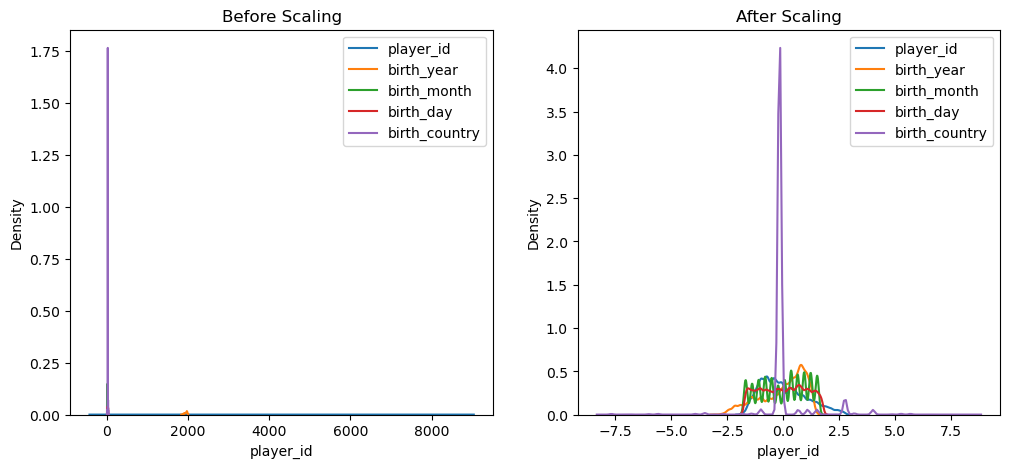

In [93]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
for column in x_trainc.iloc[:, :5]:
    sns.kdeplot(x_trainc[column], ax=ax1, label = column)
ax1.legend()

# after scaling
ax2.set_title('After Scaling')
for column in X_train1.iloc[:, :5]:
    sns.kdeplot(X_train1[column], ax=ax2, label = column)
ax2.legend()
plt.show()

Now we will compare the variable distributions before and after scaling.

Note how all the distributions are now centred around 0.

## 5. Machine Learning Model<a name="5"></a>

Now, we will build the linear regression model. Linear regression is a machine learning model designed to identify the best-fit linear line between independent and dependent variables. The objective is to determine the optimal values for the intercept and coefficients, ensuring that errors are minimized. In this analysis, the goal is to use the X variables (i.e., columns other than item outlet sales) to predict the item outlet sales, which serves as the y variable or target variable. In this case, we are using the X variables (song attributes) to predict the popularity of the songs. We will be using 2 metrics to grade our model. Mean Square Error (MSE) and R-Square. The lower MSE, the better the model performance and the closer the r-square value to 1, the better the model performance.

In [94]:
X_train_final1 = X_train1
X_test_final1 = X_test1

y_train_final1 = y_train1
y_test_final1 = y_test1

In [95]:
# Build Linear Regression Model
model_linear_regression = LinearRegression()
model_linear_regression.fit(X_train_final1, y_train_final1)

# Evaluate the Linear Regression Model using Mean Square Error (MSE)
# The lower MSE, the better the model performance
print('train_mse:', mean_squared_error(y_train_final1, model_linear_regression.predict(X_train_final1)), 
      '\n test_mse:', mean_squared_error(y_test_final1, model_linear_regression.predict(X_test_final1)))

# Evaluate the Linear Regression Model using R-Square
# The closer the r-square value to 1, the better the model performance
print('train_r-sq:', r2_score(y_train_final1, model_linear_regression.predict(X_train_final1)), 
      '\n test_r-sq:', r2_score(y_test_final1, model_linear_regression.predict(X_test_final1)))

train_mse: 11.378686943731973 
 test_mse: 11.350148905900944
train_r-sq: 0.3834307898329591 
 test_r-sq: 0.3852499307541848


In addition to the regression model, I also have come up with a baseline model to compare it to. This is because baseline models are the starting point of analysis. They enable you to evaluate the performance of more complex models and the impact of different features.

In [97]:
mean_target_value = y_train1.mean()
y_train_preds_naive1 = [round(mean_target_value,2) for row in X_train1.iloc[:,0]]
y_test_preds_naive1 = [round(mean_target_value,2) for row in X_test1.iloc[:,0]]

# Mean Squared Error (the lower the better, 0 is best possible score)

# train MSE score
y_true = y_train1
y_pred = y_train_preds_naive1

train_mse_naive = mean_squared_error(y_true, y_pred)
print(f"The Naive Baseline Model's MSE on train data is {train_mse_naive:.2f}.")

# test MSE score
y_true = y_test1
y_pred = y_test_preds_naive1

test_mse_naive = mean_squared_error(y_true, y_pred)
print(f"The Naive Baseline Model's MSE on test data is {test_mse_naive:.2f}.")

print()

# R2 Value (Coefficient of Determination, which measures how well the X cols account for y's variance, 1.0 is best score)

# train R2 score
y_true = y_train1
y_pred = y_train_preds_naive1

train_r2_naive = r2_score(y_true, y_pred)
print(f"The Naive Baseline Model's R2 on train data is {train_r2_naive:.2f}.")

# test R2 score
y_true = y_test1
y_pred = y_test_preds_naive1

test_r2_naive = r2_score(y_true, y_pred)
print(f"The Naive Baseline Model's R2 on test data is {test_r2_naive:.2f}.")

The Naive Baseline Model's MSE on train data is 18.45.
The Naive Baseline Model's MSE on test data is 18.46.

The Naive Baseline Model's R2 on train data is -0.00.
The Naive Baseline Model's R2 on test data is -0.00.


## 6. Summary and Further Improvements<a name="6"></a>

As seen in the results in the previous section, our linear regression model has a train_mse of 11.38, and a test_mse of 11.33. It also has a 
train_r- ofq: 0.38 and 
 test_r-sq: 0.3. This shows that our r-squared value is lower than it could be, which could be better after some improvements. One of the strengths of the model is its relatively low MSE value, which means that it performs less errors. Another strength of the linear regression model is its relative consistency when predicting unseen data. As both our train and test scores are similar, the model will not perform worse when introduced to new data.

Some improvements that could be made is to attempt to pair ordinal encoding with one-hot encoding. This would allow for a greater number of features for the model to interpret. Another improvement would be create more mathematical features for the model to interpret. This would decrease the probability of the model making errors. The last improvement would be to experiment with different methods of data modification to find the best one. For example choosing a different encoding method or different variables to bin would change the scoring of the model. Performing this trial and error could help me achieve a greater score.453

## 7. Reflection<a name="7"></a>

After reflecting on the module learning objectives, I have rreralised that I have gained substantial knowledge, skills, and abilities that have significantly enhanced my capabilities in data wrangling and machine learning that I would not have otherwise. In this section, I will go over some of the knowledge I have acquired over the module. 

One thing I have learnt is how to effectively design data pipelines for missing data imputation. I can now create automated workflows that efficiently handle these tasks, ensuring consistency and reliability in data preprocessing. The second thing I have learnt is the skill of utilizing python packages. The module provided hands-on experience with cutting-edge Python packages such as Pandas, NumPy, Scikit-learn, and more. These tools have been instrumental in allowing me to efficiently manipulate data, perform feature engineering, and optimize machine learning models. I’ve learned how to leverage these packages to streamline the development process and improve model performance. Lastly, I have learnt how to apply data wrangling techniques to real-world problems. Applying the data wrangling techniques to solve real-world problems was an invaluable experience. It allowed me to understand the practical implications of the concepts learned and how they can be utilized to address actual business challenges. In this assignment, I have had to think the impact of my model creation on baseball teams.

Even though I have learnt a solid fundamentals through this course, there are still improvements to my skills and learning process. Firstly, I could have deepened my understanding for advanced data wrangling techniques. I could have spent more time exploring advanced data wrangling techniques and their applications. For instance, delving deeper into feature selection methods or advanced time series transformations could further enhance my skill set. Finally, I could have engaged more with peers and instructors to discuss challenges and insights that could have enriched my learning experience. Collaborative learning often provides diverse perspectives that can lead to a deeper comprehension of complex topics.

All in all, the module has equipped me with essential skills and knowledge in data wrangling, which are crucial for building robust machine learning models. While I have made significant progress, there are still areas for growth such as enhanced collaboration and learning more advanced techniques. In the future, I am sure the lessons learnt this module will carry over to my professional work in the future.

### 7.1 Citations
ChatGPT. (2021, April 13). ChatGPT: Online AI Chatbot. https://chatgpt.org/
Markdown to create pages and table of contents? (n.d.). Stack Overflow. https://stackoverflow.com/questions/11948245/markdown-to-create-pages-and-table-of-contents/33433098#33433098
Why establish baseline models | A detailed guide. (n.d.). https://www.markovml.com/blog/baseline-models#:~:text=A%20baseline%20model%20in%20machine,the%20impact%20of%20different%20features.